# Information Retrieval

Bag of Words and TF-IDF

## Library Imports

In [5]:
# Import Os to get to the root directory
import os
import sys


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

# Import packages

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import string # for punctuation
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project\\libraries\\corpus.py'>

## Data Preprocessing

In [6]:
dataset = pdf2text.get_dataset()

2019-06-12 16:45:04,087 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [7]:
dataset.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Alluva', 'Ample!', 'ArkIO', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'BitStash', 'Budbo', 'Bytecoin', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'Decentraland', 'Digix', 'Enjin', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'Golem', 'GuaranteedEntranceToken', 'GXChain', 'ICON', 'IOTA', 'KwattCoin', 'Latoken', 'MoneroV', 'Neox', 'oxcert', 'RippleProtocol', 'SDUSD', 'SnipCoin', 'Solve', 'Steem', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

In [8]:
len(dataset.keys())

62

In [9]:
makeSentences = True
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True, stops = ["bitcoin"])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning: 0chain
Cleaning: 1World
Cleaning: 1x2Coin
Cleaning: AB-CHAIN
Cleaning: ABCC
Cleaning: ABLE
Cleaning: Absolute
Cleaning: ACE
Cleaning: Achain
Cleaning: AcreCoin
Cleaning: Actinium
Cleaning: AcuteAngle
Cleaning: Adamant
Cleaning: AdBank
Cleaning: AdChainRegistry
Cleaning: AdCoin
Cleaning: Adhive
Cleaning: Aditus
Cleaning: Adshares
Cleaning: Alluva
Cleaning: Ample!
Cleaning: ArkIO
Cleaning: BasicAttentionToken
Cleaning: Binance
Cleaning: bitcoin
Cleaning: BitcoinGold
Cleaning: BitStash
Cleaning: Budbo
Cleaning: Bytecoin
Cleaning: Cosmos
Cleaning: CryptoNote
Cleaning: DaiStableCoinSystem
Cleaning: dash
Cleaning: Decentraland
Cleaning: Digix
Cleaning: Enjin
Cleaning: EtherAce
Cleaning: ethereum
Cleaning: EthereumClassic
Cleaning: Giant
Cleaning: GiveCoin
Cleaning: Golem
Cleaning: GuaranteedEntranceToken
Cleaning: GXChain
Cleaning: ICON
Cleaning: IOTA
Cleaning: KwattCoin
Cleaning: Latoken
Cleaning: MoneroV
Cleaning: Neox
Cleaning: oxcert
Cleaning: RippleProtocol
Cleaning: SDUSD
Cle

In [304]:
corpora.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Alluva', 'Ample!', 'ArkIO', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'BitStash', 'Budbo', 'Bytecoin', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'Decentraland', 'Digix', 'Enjin', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'Golem', 'GuaranteedEntranceToken', 'GXChain', 'ICON', 'IOTA', 'KwattCoin', 'Latoken', 'MoneroV', 'Neox', 'oxcert', 'RippleProtocol', 'SDUSD', 'SnipCoin', 'Solve', 'Steem', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

# 0chain

In [11]:
corpora["0chain"]

['chain whitepaper v pdf chain fast secure scalable free blockchain tailor highperformance zerotrust decentralize storage whitepaper v last update mar ',
 'subject far review update saswata basu thomas austin siva dirisala chain team table content introduction motivation executive summary ',
 'introduction chain ',
 'product ',
 'chainnet ',
 'box ',
 'wallet ',
 'chain architecture ',
 'consensus protocol ',
 'storage protocol ',
 'split key protocol ',
 'token reward protocol ',
 'governance protocol ',
 'protocol ',
 'appendix appendix team appendix understand chain finality appendix consensus protocol appendix storage token reward protocol appendix split key protocol motivation start develop chain july driven idea redefine cloud context privacy transparency user control data ',
 'dove deeper development process identify number critical unresolved issue cryptocurrency space token security token valuation metric governance token inflation ',
 'address aforementioned issue chose condu

In [12]:
# Start tokenizing your dataset
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

if makeSentences:
    #############################################
    # Tokenization on sentences
    tokens = [tokenizer.tokenize(s) for s in corpora["0chain"]]
    # Flatten the list
    tokens = np.reshape(np.concatenate(tokens), -1)
    #############################################
else:
    #############################################
    # Tokenization on whole corpus (no sentences)
    tokens = tokenizer.tokenize(corpora["0chain"])
    #############################################



print('We have', len(tokens), 'words in total. \n')
print(tokens[5:10])


We have 3947 words in total. 

['fast' 'secure' 'scalable' 'free' 'blockchain']


In [13]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
 # numpy can handle text as well

fdist = FreqDist(tokens)

fdist.most_common(5)

[('time', 85),
 ('block', 74),
 ('protocol', 66),
 ('chain', 62),
 ('finality', 62)]

In [14]:
import matplotlib.pyplot as plt


fdist.plot(30,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

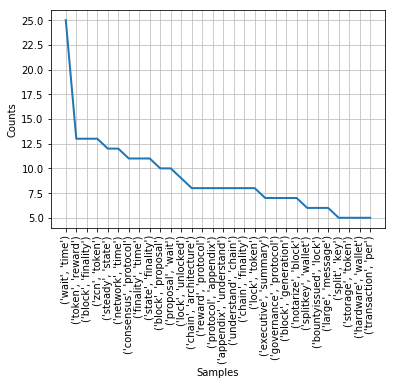

In [15]:
from nltk import bigrams, ngrams
bigrams_tokens = bigrams(tokens)
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

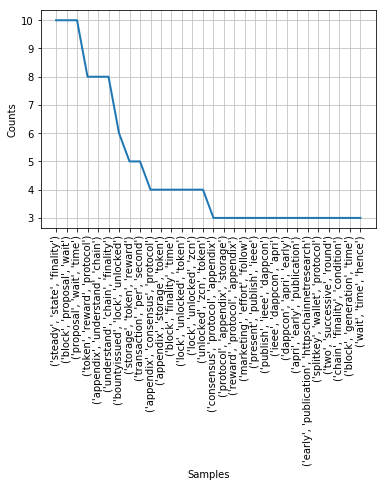

In [16]:
# n=3
trigrams_tokens = ngrams(tokens, 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

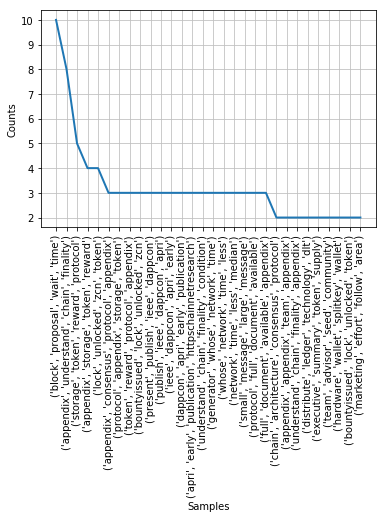

In [17]:
# n=4
grams4_tokens = ngrams(tokens, 4)
fdist_grams4 = FreqDist(list(grams4_tokens))
fdist_grams4.plot(30,cumulative=False)
plt.show()

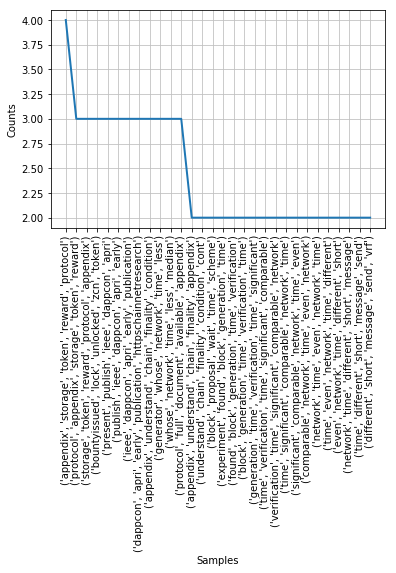

In [18]:
# n=5
grams5_tokens = ngrams(tokens, 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x00000120613DC240>>,
        vocabulary=None)

In [21]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(tokens)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)

(3947, 1206)


In [22]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(corpora["0chain"])
bag_of_words = count_vec.transform(corpora["0chain"])

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['ability', 'able', 'absorbed', 'abstract', 'accelerator', 'accepted', 'access', 'accommodate', 'accomplish', 'accordingly', 'account', 'accountability', 'accumulate', 'accurate', 'achieve', 'acquisition', 'act', 'activate', 'actor', 'ad', 'addition', 'additional', 'additionally', 'additionremoval', 'address', 'adequately', 'administration', 'adoption', 'advanced', 'advantage', 'advisor', 'aforementioned', 'agree', 'agrees', 'aim', 'algorithmic', 'alienate', 'allocate', 'allocation', 'allow', 'allows', 'amiss', 'anonymous', 'api', 'app', 'appendix', 'apple', 'application', 'approach', 'apri', 'arbitrarily', 'architect', 'architecture', 'area', 'argue', 'arrive', 'art', 'article', 'artist', 'aspect', 'asset', 'assetbacked', 'assetbased', 'assigns', 'associate', 'assume', 'assumes', 'assumption', 'assure', 'ata', 'atoz', 'attack', 'attestation', 'austin', 'authentic', 'authentication', 'authenticator', 'availability', 'available', 'average', 'aws', 'baa', 'background', 'ba

In [23]:
#Vocabulary and vocabulary ID

print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 1130
Vocabulary content:
 {'chain': 146, 'whitepaper': 1111, 'pdf': 706, 'fast': 390, 'secure': 878, 'scalable': 867, 'free': 416, 'blockchain': 101, 'tailor': 983, 'highperformance': 455, 'zerotrust': 1128, 'decentralize': 258, 'storage': 956, 'update': 1061, 'mar': 589, 'subject': 963, 'far': 388, 'review': 840, 'saswata': 865, 'basu': 92, 'thomas': 998, 'austin': 73, 'siva': 919, 'dirisala': 293, 'team': 987, 'table': 981, 'content': 212, 'introduction': 520, 'motivation': 632, 'executive': 365, 'summary': 973, 'product': 751, 'chainnet': 147, 'box': 113, 'wallet': 1103, 'architecture': 52, 'consensus': 206, 'protocol': 767, 'split': 937, 'key': 534, 'token': 1009, 'reward': 841, 'governance': 433, 'appendix': 45, 'understand': 1042, 'finality': 398, 'start': 946, 'develop': 281, 'july': 533, 'driven': 312, 'idea': 465, 'redefine': 803, 'cloud': 170, 'context': 214, 'privacy': 743, 'transparency': 1024, 'user': 1068, 'control': 218, 'data': 254, 'dove': 308, 'deeper

# BAG OF WORDS

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

# 0chain Document

In [24]:
import collections, re
text_1 = corpora["0chain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_1]
bagsofwords[0]

Counter({'chain': 2,
         'whitepaper': 2,
         'v': 2,
         'pdf': 1,
         'fast': 1,
         'secure': 1,
         'scalable': 1,
         'free': 1,
         'blockchain': 1,
         'tailor': 1,
         'highperformance': 1,
         'zerotrust': 1,
         'decentralize': 1,
         'storage': 1,
         'last': 1,
         'update': 1,
         'mar': 1})

In [25]:
bagsofwords[1]

Counter({'subject': 1,
         'far': 1,
         'review': 1,
         'update': 1,
         'saswata': 1,
         'basu': 1,
         'thomas': 1,
         'austin': 1,
         'siva': 1,
         'dirisala': 1,
         'chain': 1,
         'team': 1,
         'table': 1,
         'content': 1,
         'introduction': 1,
         'motivation': 1,
         'executive': 1,
         'summary': 1})

In [26]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'time': 85, 'block': 74, 'protocol': 66, 'chain': 62, 'finality': 62, 'token': 61, 'transaction': 39, 'wait': 39, 'network': 37, 'blockchain': 35, 'data': 35, 'box': 33, 'use': 29, 'appendix': 28, 'service': 27, 'storage': 26, 'zcn': 25, 'wallet': 24, 'lock': 22, 'product': 21, 'chainnet': 21, 'miner': 21, 'round': 21, 'proposal': 21, 'key': 20, 'user': 19, 'client': 18, 'increase': 18, 'platform': 17, 'content': 16, 'reward': 16, 'process': 16, 'store': 16, 'message': 16, 'state': 15, 'solution': 15, 'issue': 14, 'blobbers': 14, 'value': 14, 'provide': 14, 'need': 14, 'one': 14, 'market': 13, 'device': 13, 'base': 13, 'follow': 13, 'secure': 12, 'architecture': 12, 'consensus': 12, 'governance': 12, 'address': 12, 'result': 12, 'node': 12, 'two': 12, 'send': 12, 'work': 12, 'blobber': 12, 'steady': 12, 'team': 11, 'start': 11, 'security': 11, 'today': 11, 'per': 11, 'public': 11, 'share': 11, 'expect': 11, 'large': 11, 'small': 11, 'tr': 11, 'verification': 10, 'via': 10, 'en

In [305]:
count = CountVectorizer()
docs = np.array(corpora["0chain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 624)	1
  (0, 1125)	1
  (0, 574)	1
  (0, 1012)	1
  (0, 270)	1
  (0, 1204)	1
  (0, 482)	1
  (0, 1040)	1
  (0, 111)	1
  (0, 438)	1
  (0, 916)	1
  (0, 927)	1
  (0, 409)	1
  (0, 754)	1
  (0, 1181)	2
  (0, 157)	2
  (1, 1029)	1
  (1, 384)	1
  (1, 670)	1
  (1, 549)	1
  (1, 223)	1
  (1, 1038)	1
  (1, 1045)	1
  (1, 306)	1
  (1, 973)	1
  :	:
  (323, 687)	1
  (324, 943)	1
  (324, 393)	1
  (324, 1067)	1
  (324, 1090)	1
  (324, 644)	1
  (324, 976)	1
  (324, 573)	1
  (324, 218)	1
  (324, 1064)	1
  (324, 504)	1
  (324, 42)	1
  (324, 797)	1
  (324, 816)	1
  (324, 157)	1
  (325, 86)	3
  (325, 320)	3
  (325, 442)	3
  (325, 993)	3
  (325, 52)	9
  (325, 890)	3
  (325, 1069)	3
  (325, 816)	9
  (325, 217)	3
  (325, 1012)	3


# 1World Document

In [29]:
text_2 = corpora["1World"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_2]
bagsofwords[0]

Counter({'legal': 1,
         'disclaimer': 1,
         'purpose': 1,
         'white': 1,
         'paper': 1,
         'present': 1,
         'world': 1,
         'online': 1,
         'wo': 1,
         'token': 2,
         'potential': 1,
         'holder': 1,
         'connection': 1,
         'propose': 1,
         'ico': 1})

In [30]:
bagsofwords[1]

Counter({'information': 1,
         'set': 1,
         'forth': 1,
         'may': 1,
         'exhaustive': 1,
         'imply': 1,
         'element': 1,
         'contractual': 1,
         'relationship': 1})

In [31]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'world': 180, 'token': 137, 'wo': 98, 'blockchain': 49, 'use': 48, 'tokens': 39, 'publisher': 38, 'ethereum': 38, 'online': 32, 'may': 30, 'content': 30, 'business': 30, 'engagement': 29, 'user': 29, 'information': 28, 'network': 28, 'transaction': 28, 'team': 27, 'reader': 26, 'advertising': 25, 'via': 24, 'us': 24, 'ico': 22, 'data': 22, 'time': 21, 'smart': 21, 'site': 20, 'system': 20, 'state': 19, 'research': 19, 'earn': 19, 'new': 19, 'make': 19, 'solution': 19, 'service': 17, 'many': 17, 'public': 17, 'include': 16, 'support': 16, 'also': 16, 'patent': 16, 'exchange': 16, 'provide': 15, 'interactive': 15, 'platform': 15, 'transactions': 15, 'publishers': 15, 'partners': 15, 'web': 15, 'point': 15, 'law': 14, 'etc': 14, 'analytics': 14, 'contract': 14, 'cases': 14, 'industry': 14, 'price': 14, 'one': 14, 'issue': 14, 'purchase': 14, 'sale': 14, 'holder': 13, 'ad': 13, 'wallet': 13, 'raiden': 13, 'microtransactions': 13, 'technology': 13, 'value': 13, 'transfer': 13, 'par

In [32]:
count = CountVectorizer()
docs = np.array(corpora["1World"])
bag = count.fit_transform(docs)
print(bag)

  (0, 831)	1
  (0, 1400)	1
  (0, 375)	1
  (0, 820)	1
  (0, 1335)	1
  (0, 1805)	2
  (0, 1973)	1
  (0, 1221)	1
  (0, 1977)	1
  (0, 1348)	1
  (0, 1254)	1
  (0, 1957)	1
  (0, 1424)	1
  (0, 522)	1
  (0, 1000)	1
  (1, 1491)	1
  (1, 397)	1
  (1, 577)	1
  (1, 845)	1
  (1, 660)	1
  (1, 1084)	1
  (1, 736)	1
  (1, 1617)	1
  (1, 877)	1
  (2, 1808)	1
  :	:
  (285, 877)	1
  (286, 1897)	1
  (286, 1421)	1
  (286, 1193)	1
  (286, 684)	1
  (286, 1602)	1
  (286, 1420)	1
  (286, 1445)	1
  (286, 485)	1
  (286, 514)	1
  (286, 654)	1
  (286, 1819)	1
  (286, 525)	1
  (286, 1355)	1
  (286, 794)	1
  (286, 1084)	1
  (286, 1805)	2
  (286, 1973)	2
  (287, 160)	1
  (287, 655)	1
  (287, 1388)	1
  (287, 1723)	1
  (287, 1808)	1
  (287, 1805)	1
  (287, 1973)	1


# 1x2Coin Document

In [33]:
text_3 = corpora["1x2Coin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_3]
bagsofwords[0]

Counter({'powerpoint': 1,
         'presentation': 1,
         'whitepaper': 1,
         'table': 3,
         'content': 1,
         'introduction': 3,
         'masternodes': 2,
         'coinholders': 2,
         'proofofstake': 2,
         'coin': 2,
         'specification': 2,
         'premine': 2,
         'project': 2,
         'funding': 2,
         'reward': 2,
         'roadmap': 2,
         'total': 1,
         'value': 1,
         'global': 1,
         'sport': 1,
         'bet': 1,
         'market': 1,
         'difficult': 1,
         'estimate': 1,
         'lack': 1,
         'consistency': 1,
         'regulate': 1,
         'part': 1,
         'world': 1})

In [34]:
bagsofwords[1]

Counter({'sport': 1,
         'bet': 1,
         'make': 1,
         'percent': 1,
         'global': 1,
         'gamble': 1,
         'market': 1})

In [35]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'coin': 38, 'reward': 24, 'network': 13, 'crypto': 10, 'use': 10, 'wallet': 10, 'stake': 9, 'block': 9, 'listing': 9, 'transaction': 8, 'proofofstake': 7, 'base': 7, 'user': 7, 'exchange': 7, 'launch': 7, 'masternodes': 6, 'one': 6, 'phase': 6, 'blockchain': 6, 'miner': 6, 'mn': 6, 'table': 5, 'coinholders': 5, 'premine': 5, 'project': 5, 'bet': 5, 'sportsbooks': 5, 'masternode': 5, 'digital': 5, 'global': 4, 'sport': 4, 'market': 4, 'gamble': 4, 'sportsbook': 4, 'payment': 4, 'affiliate': 4, 'fund': 4, 'owner': 4, 'verify': 4, 'presale': 4, 'whitepaper': 3, 'introduction': 3, 'specification': 3, 'funding': 3, 'roadmap': 3, 'total': 3, 'part': 3, 'option': 3, 'site': 3, 'accept': 3, 'currency': 3, 'time': 3, 'purpose': 3, 'system': 3, 'platform': 3, 'secure': 3, 'cryptocurrency': 3, 'transfer': 3, 'coinholder': 3, 'individual': 3, 'type': 3, 'stakeholder': 3, 'website': 3, 'purchase': 3, 'earn': 3, 'concept': 3, 'initial': 3, 'setting': 3, 'tip': 3, 'estimate': 2, 'online': 2,

In [36]:
count = CountVectorizer()
docs = np.array(corpora["1x2Coin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 358)	1
  (0, 218)	1
  (0, 264)	1
  (0, 60)	1
  (0, 157)	1
  (0, 108)	1
  (0, 87)	1
  (0, 179)	1
  (0, 28)	1
  (0, 297)	1
  (0, 133)	1
  (0, 344)	1
  (0, 327)	1
  (0, 268)	2
  (0, 266)	2
  (0, 126)	2
  (0, 250)	2
  (0, 243)	2
  (0, 296)	2
  (0, 44)	2
  (0, 252)	2
  (0, 47)	2
  (0, 183)	2
  (0, 154)	3
  (0, 64)	1
  :	:
  (50, 244)	1
  (50, 191)	1
  (50, 111)	3
  (50, 353)	1
  (50, 198)	1
  (50, 25)	1
  (50, 155)	1
  (50, 181)	1
  (50, 8)	1
  (50, 229)	5
  (50, 224)	1
  (50, 301)	1
  (50, 35)	1
  (50, 2)	1
  (50, 286)	1
  (50, 300)	1
  (50, 71)	4
  (50, 213)	1
  (50, 209)	1
  (50, 28)	1
  (50, 268)	1
  (50, 266)	1
  (50, 250)	1
  (50, 44)	1
  (50, 354)	1


# AB-CHAIN Document

In [37]:
text_4 = corpora["AB-CHAIN"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_4]
bagsofwords[0]

Counter({'abchain': 1,
         'blockchain': 1,
         'effect': 1,
         'ive': 1,
         'advert': 1,
         'ing': 1,
         'drive': 1,
         'traffic': 1,
         'ico': 1,
         'company': 1,
         'cryptocurrency': 1,
         'budget': 1,
         'table': 1,
         'content': 1,
         'term': 1,
         'definition': 1,
         'mission': 1,
         'vision': 1})

In [38]:
bagsofwords[1]

Counter({'business': 1,
         'overview': 1,
         'problem': 1,
         'solve': 1,
         'solution': 1,
         'value': 1,
         'proposal': 1})

In [39]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'advertising': 77, 'token': 74, 'network': 54, 'abchain': 53, 'cryptocurrency': 46, 'market': 46, 'rtb': 43, 'advertiser': 42, 'webmaster': 36, 'payment': 34, 'company': 32, 'ad': 29, 'crowdfunding': 25, 'year': 22, 'platform': 21, 'investor': 21, 'ai': 20, 'fund': 20, 'ico': 19, 'growth': 18, 'placement': 18, 'marketing': 18, 'service': 17, 'rate': 16, 'investment': 15, 'development': 15, 'blockchain': 14, 'advantage': 14, 'campaign': 14, 'technology': 14, 'traditional': 14, 'time': 14, 'product': 13, 'commission': 13, 'exchange': 13, 'website': 13, 'allow': 13, 'use': 13, 'make': 13, 'business': 12, 'solution': 12, 'accept': 12, 'ml': 12, 'fiat': 12, 'number': 12, 'target': 12, 'goal': 11, 'work': 11, 'burning': 11, 'display': 11, 'raise': 11, 'allows': 11, 'introduce': 11, 'amount': 11, 'result': 11, 'wallet': 10, 'function': 10, 'new': 10, 'project': 10, 'icos': 10, 'also': 10, 'sale': 10, 'low': 9, 'order': 9, 'system': 9, 'run': 9, 'expect': 9, 'online': 9, 'provide': 9,

In [40]:
count = CountVectorizer()
docs = np.array(corpora["AB-CHAIN"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1008)	1
  (0, 621)	1
  (0, 271)	1
  (0, 944)	1
  (0, 229)	1
  (0, 935)	1
  (0, 141)	1
  (0, 255)	1
  (0, 203)	1
  (0, 471)	1
  (0, 964)	1
  (0, 308)	1
  (0, 494)	1
  (0, 36)	1
  (0, 527)	1
  (0, 324)	1
  (0, 132)	1
  (0, 0)	1
  (1, 762)	1
  (1, 994)	1
  (1, 890)	1
  (1, 891)	1
  (1, 749)	1
  (1, 690)	1
  (1, 147)	1
  :	:
  (266, 250)	1
  (266, 669)	1
  (266, 404)	2
  (266, 95)	2
  (266, 640)	2
  (266, 407)	2
  (266, 842)	1
  (266, 982)	1
  (266, 264)	1
  (266, 906)	1
  (267, 483)	1
  (267, 794)	1
  (267, 711)	1
  (268, 542)	1
  (268, 460)	1
  (268, 696)	1
  (268, 340)	1
  (268, 47)	1
  (268, 823)	1
  (268, 779)	1
  (268, 357)	1
  (268, 951)	1
  (268, 359)	1
  (268, 911)	1
  (268, 574)	1


# ABCC Document

In [41]:
text_5 = corpora["ABCC"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_5]
bagsofwords[0]

Counter({'abcc': 1,
         'digital': 1,
         'asset': 1,
         'exchange': 1,
         'vpages': 1,
         'index': 1,
         'vision': 1})

In [42]:
bagsofwords[1]

Counter({'background': 1})

In [43]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'asset': 83, 'digital': 75, 'trading': 42, 'exchange': 28, 'blockchain': 28, 'security': 26, 'user': 23, 'service': 23, 'technology': 21, 'investment': 20, 'investor': 17, 'system': 14, 'u': 13, 'industry': 13, 'base': 13, 'provide': 13, 'evaluation': 12, 'framework': 12, 'project': 12, 'financial': 12, 'platform': 12, 'fee': 12, 'abcc': 11, 'architecture': 11, 'business': 9, 'value': 9, 'enable': 9, 'safety': 8, 'help': 8, 'team': 8, 'high': 8, 'obtain': 8, 'variety': 7, 'risk': 7, 'top': 7, 'experience': 7, 'offering': 7, 'build': 7, 'information': 7, 'include': 7, 'cryptocurrencies': 7, 'million': 7, 'vision': 6, 'issue': 6, 'model': 6, 'technical': 6, 'capital': 6, 'management': 6, 'launch': 6, 'contract': 6, 'portfolio': 6, 'achieve': 6, 'secure': 6, 'growth': 6, 'one': 6, 'ecosystem': 6, 'listing': 6, 'ensure': 6, 'margin': 6, 'roll': 6, 'meanwhile': 6, 'leverage': 6, 'relevant': 6, 'license': 6, 'permission': 6, 'clearing': 6, 'applicable': 6, 'opportunity': 5, 'point':

In [44]:
count = CountVectorizer()
docs = np.array(corpora["ABCC"])
bag = count.fit_transform(docs)
print(bag)

  (0, 679)	1
  (0, 335)	1
  (0, 684)	1
  (0, 234)	1
  (0, 43)	1
  (0, 183)	1
  (0, 0)	1
  (1, 53)	1
  (2, 462)	1
  (3, 361)	1
  (3, 575)	1
  (3, 673)	1
  (3, 589)	1
  (3, 281)	1
  (3, 229)	1
  (3, 522)	1
  (3, 376)	1
  (3, 14)	1
  (3, 493)	1
  (3, 474)	1
  (3, 43)	2
  (3, 183)	2
  (4, 85)	1
  (5, 403)	1
  (5, 560)	1
  :	:
  (147, 195)	1
  (147, 344)	1
  (147, 429)	1
  (147, 85)	1
  (147, 281)	1
  (147, 229)	1
  (147, 43)	2
  (147, 183)	2
  (148, 556)	1
  (148, 429)	1
  (149, 563)	1
  (151, 671)	1
  (152, 238)	1
  (152, 296)	1
  (152, 346)	1
  (152, 261)	1
  (152, 644)	1
  (152, 677)	1
  (152, 260)	1
  (152, 633)	1
  (152, 380)	1
  (152, 337)	1
  (152, 17)	1
  (152, 118)	1
  (152, 679)	1


# ABLE Document

In [45]:
text_6 = corpora["ABLE"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_6]
bagsofwords[0]

Counter({'le': 2,
         'ly': 1,
         'lo': 1,
         'fin': 1,
         'ld': 1,
         'white': 1,
         'paper': 1,
         'state': 1,
         'current': 1,
         'view': 1,
         'able': 2,
         'token': 1,
         'issuer': 1,
         'service': 1,
         'provider': 1,
         'chain': 1,
         'holding': 1,
         'o': 1,
         'registration': 2,
         'code': 2,
         'korean': 1,
         'agency': 1,
         'kblockchain': 1,
         'concern': 1,
         'platform': 1,
         'related': 1,
         'matter': 1})

In [46]:
bagsofwords[1]

Counter({'chain': 1,
         'holding': 1,
         'o': 1,
         'kblockchain': 1,
         'may': 1,
         'time': 2,
         'revise': 1,
         'white': 1,
         'paper': 1,
         'respect': 1,
         'without': 1,
         'notice': 1})

In [47]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'able': 184, 'cryptocurrency': 76, 'service': 69, 'user': 62, 'smart': 59, 'contract': 59, 'system': 57, 'product': 53, 'account': 51, 'financial': 49, 'use': 40, 'base': 34, 'loan': 33, 'project': 32, 'coin': 32, 'provide': 29, 'address': 28, 'investment': 25, 'payment': 23, 'credit': 22, 'create': 22, 'make': 22, 'bank': 21, 'blockchain': 21, 'finance': 21, 'rate': 20, 'deposit': 20, 'layer': 20, 'fig': 19, 'type': 19, 'investinglending': 18, 'match': 18, 'solution': 18, 'apis': 16, 'banking': 15, 'interest': 15, 'intermediary': 15, 'invest': 15, 'various': 15, 'amount': 15, 'framework': 15, 'whitepaper': 14, 'market': 14, 'spread': 14, 'include': 14, 'lending': 14, 'borrower': 14, 'engine': 13, 'remittance': 13, 'decentralize': 13, 'exchange': 13, 'money': 13, 'salary': 13, 'data': 13, 'access': 13, 'structure': 12, 'business': 12, 'application': 12, 'dex': 11, 'model': 11, 'wealth': 11, 'management': 11, 'investor': 11, 'transfer': 11, 'platform': 10, 'ecosystem': 10, 'dev

In [48]:
count = CountVectorizer()
docs = np.array(corpora["ABLE"])
bag = count.fit_transform(docs)
print(bag)

  (0, 459)	1
  (0, 604)	1
  (0, 539)	1
  (0, 128)	1
  (0, 394)	1
  (0, 26)	1
  (0, 397)	1
  (0, 112)	2
  (0, 603)	2
  (0, 334)	1
  (0, 107)	1
  (0, 581)	1
  (0, 661)	1
  (0, 389)	1
  (0, 734)	1
  (0, 0)	2
  (0, 771)	1
  (0, 171)	1
  (0, 698)	1
  (0, 518)	1
  (0, 788)	1
  (0, 410)	1
  (0, 278)	1
  (0, 433)	1
  (0, 441)	1
  :	:
  (276, 89)	1
  (276, 800)	1
  (276, 408)	1
  (276, 252)	1
  (276, 108)	2
  (276, 421)	2
  (276, 309)	1
  (276, 716)	1
  (276, 60)	1
  (276, 83)	2
  (276, 642)	1
  (276, 313)	1
  (276, 528)	1
  (276, 543)	1
  (276, 173)	1
  (276, 641)	1
  (276, 478)	1
  (276, 93)	1
  (276, 20)	2
  (276, 166)	1
  (276, 691)	1
  (276, 419)	1
  (276, 70)	1
  (276, 789)	1
  (276, 661)	1


# Absolute Document

In [49]:
text_7 = corpora["Absolute"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_7]
bagsofwords[0]

Counter({'absolute': 1})

In [50]:
bagsofwords[1]

Counter({'proof': 1,
         'view': 1,
         'litepaper': 2,
         'v': 1,
         'june': 1,
         'cut': 1,
         'version': 1,
         'whitepaper': 1,
         'still': 1,
         'development': 1})

In [51]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'reward': 43, 'network': 40, 'pov': 38, 'contract': 33, 'base': 28, 'ab': 24, 'collateral': 19, 'interaction': 17, 'via': 16, 'node': 16, 'agent': 15, 'buffer': 13, 'masternodes': 12, 'tier': 12, 'receive': 12, 'block': 12, 'fund': 12, 'sb': 11, 'structure': 10, 'subsidy': 10, 'proof': 9, 'medium': 9, 'view': 8, 'transaction': 8, 'user': 8, 'high': 8, 'coin': 7, 'smart': 7, 'enablers': 7, 'use': 7, 'percentage': 7, 'absolute': 6, 'process': 6, 'per': 6, 'governance': 6, 'lead': 6, 'wallet': 6, 'website': 6, 'load': 6, 'max': 6, 'allow': 5, 'mainnet': 5, 'hold': 5, 'masternode': 5, 'form': 5, 'type': 5, 'algorithm': 5, 'day': 5, 'location': 5, 'qualify': 5, 'level': 5, 'condition': 5, 'development': 4, 'escrow': 4, 'set': 4, 'certain': 4, 'va': 4, 'minimum': 4, 'increase': 4, 'require': 4, 'standard': 4, 'advert': 4, 'allows': 4, 'phy': 4, 'capture': 4, 'system': 4, 'demand': 4, 'full': 4, 'allocation': 4, 'funding': 4, 'always': 4, 'version': 3, 'cryptocurrency': 3, 'provide':

In [52]:
count = CountVectorizer()
docs = np.array(corpora["Absolute"])
bag = count.fit_transform(docs)
print(bag)

  (0, 2)	1
  (1, 109)	1
  (1, 356)	1
  (1, 419)	1
  (1, 408)	1
  (1, 93)	1
  (1, 201)	1
  (1, 212)	2
  (1, 410)	1
  (1, 296)	1
  (2, 131)	1
  (2, 90)	1
  (2, 398)	1
  (2, 53)	1
  (2, 31)	1
  (2, 42)	1
  (2, 266)	1
  (3, 127)	1
  (3, 245)	1
  (3, 305)	1
  (3, 163)	1
  (3, 83)	1
  (3, 341)	1
  (3, 280)	1
  (3, 135)	1
  :	:
  (101, 375)	1
  (101, 34)	1
  (101, 402)	1
  (101, 109)	1
  (101, 2)	2
  (102, 310)	1
  (103, 95)	1
  (103, 267)	1
  (103, 89)	1
  (103, 298)	1
  (103, 375)	1
  (103, 370)	1
  (103, 87)	1
  (103, 0)	1
  (103, 69)	1
  (103, 109)	1
  (103, 410)	1
  (103, 296)	1
  (103, 2)	1
  (104, 154)	1
  (104, 57)	1
  (105, 222)	1
  (105, 98)	1
  (105, 177)	1
  (105, 383)	1


# ACE Document

In [54]:
text_8 = corpora["ACE"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_8]
bagsofwords[0]

Counter({'tokenstars': 1,
         'company': 1,
         'white': 1,
         'paper': 1,
         'tokenizing': 1,
         'celebrity': 1})

In [55]:
bagsofwords[1]

Counter({'september': 1,
         'verison': 1,
         'preliminary': 1,
         'draft': 1,
         'may': 1,
         'amend': 1,
         'content': 1})

In [56]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'token': 243, 'ace': 242, 'player': 185, 'may': 82, 'company': 78, 'tennis': 72, 'agency': 71, 'platform': 65, 'scout': 64, 'contract': 52, 'million': 48, 'risk': 46, 'party': 43, 'business': 40, 'include': 39, 'holder': 38, 'year': 38, 'promoter': 37, 'paper': 35, 'sale': 35, 'money': 35, 'market': 35, 'sport': 34, 'white': 33, 'team': 32, 'use': 31, 'cost': 30, 'top': 30, 'talent': 29, 'sign': 29, 'tournament': 29, 'model': 28, 'compensation': 28, 'management': 28, 'prize': 27, 'earn': 26, 'sponsorship': 26, 'star': 26, 'first': 25, 'per': 25, 'community': 24, 'buyer': 24, 'network': 23, 'sponsor': 23, 'case': 22, 'deal': 22, 'pro': 22, 'age': 22, 'project': 21, 'advertising': 21, 'blockchain': 21, 'fan': 21, 'junior': 21, 'value': 21, 'process': 20, 'subject': 20, 'high': 19, 'result': 19, 'paid': 19, 'athlete': 18, 'coach': 18, 'regulation': 18, 'transaction': 18, 'professional': 17, 'marketing': 17, 'start': 17, 'new': 17, 'group': 17, 'get': 17, 'time': 17, 'number': 17,

In [57]:
count = CountVectorizer()
docs = np.array(corpora["ACE"])
bag = count.fit_transform(docs)
print(bag)

  (0, 282)	1
  (0, 1890)	1
  (0, 1327)	1
  (0, 2037)	1
  (0, 347)	1
  (0, 1892)	1
  (1, 386)	1
  (1, 94)	1
  (1, 1126)	1
  (1, 543)	1
  (1, 1410)	1
  (1, 1988)	1
  (1, 1681)	1
  (2, 4)	1
  (2, 1318)	1
  (2, 1454)	1
  (2, 18)	1
  (3, 1829)	1
  (3, 1529)	1
  (3, 708)	1
  (4, 1446)	1
  (4, 1769)	1
  (4, 948)	1
  (4, 1639)	1
  (4, 1888)	1
  :	:
  (597, 931)	1
  (597, 716)	1
  (597, 1171)	2
  (597, 1968)	1
  (598, 1241)	1
  (598, 1115)	1
  (598, 2058)	1
  (598, 688)	1
  (598, 27)	1
  (598, 1894)	1
  (598, 2057)	1
  (598, 215)	1
  (598, 1311)	1
  (598, 162)	2
  (598, 1373)	1
  (598, 158)	1
  (598, 1401)	1
  (598, 1155)	1
  (598, 1377)	1
  (599, 1791)	1
  (599, 1230)	1
  (600, 116)	1
  (600, 516)	1
  (601, 681)	1
  (601, 1617)	1


# Achain Document

In [59]:
text_9 = corpora["Achain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_9]
bagsofwords[0]

Counter({'achain': 1,
         'blockchain': 1,
         'whitepaper': 1,
         'build': 1,
         'boundless': 1,
         'table': 1,
         'content': 1,
         'abstract': 1})

In [60]:
bagsofwords[1]

Counter({'background': 1, 'commitment': 1})

In [61]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'blockchain': 79, 'network': 69, 'achain': 59, 'contract': 35, 'fork': 33, 'smart': 27, 'data': 27, 'value': 26, 'consensus': 25, 'information': 23, 'technology': 21, 'exchange': 20, 'different': 20, 'chain': 18, 'vep': 18, 'account': 16, 'also': 16, 'node': 16, 'need': 15, 'application': 15, 'first': 15, 'transaction': 15, 'development': 14, 'system': 13, 'world': 12, 'production': 12, 'community': 12, 'service': 12, 'mechanism': 12, 'protocol': 11, 'structure': 11, 'design': 11, 'security': 11, 'new': 11, 'lua': 11, 'create': 10, 'base': 10, 'communication': 10, 'lvm': 9, 'foundation': 9, 'connect': 9, 'use': 9, 'credit': 9, 'two': 9, 'support': 9, 'center': 9, 'one': 8, 'key': 8, 'second': 8, 'however': 8, 'get': 8, 'ensure': 8, 'trust': 8, 'sandbox': 8, 'execution': 8, 'dpos': 8, 'rdpos': 8, 'performance': 8, 'change': 8, 'bitcoin': 8, 'main': 8, 'crosschain': 8, 'stability': 7, 'supply': 7, 'finance': 7, 'program': 7, 'technical': 7, 'innovation': 7, 'business': 7, 'crypt

In [62]:
count = CountVectorizer()
docs = np.array(corpora["Achain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1)	1
  (0, 219)	1
  (0, 1000)	1
  (0, 123)	1
  (0, 128)	1
  (0, 1104)	1
  (0, 119)	1
  (0, 9)	1
  (1, 180)	1
  (1, 97)	1
  (2, 298)	1
  (2, 686)	1
  (2, 486)	1
  (3, 685)	1
  (3, 119)	1
  (4, 780)	1
  (4, 1065)	1
  (4, 1033)	1
  (5, 775)	1
  (5, 685)	1
  (5, 9)	1
  (6, 964)	1
  (7, 888)	1
  (8, 896)	1
  (9, 502)	1
  :	:
  (293, 1123)	1
  (293, 71)	1
  (293, 164)	1
  (293, 657)	1
  (293, 575)	1
  (293, 825)	1
  (293, 812)	1
  (293, 75)	1
  (293, 1116)	1
  (293, 1119)	1
  (293, 727)	1
  (293, 589)	1
  (293, 567)	1
  (293, 609)	1
  (293, 457)	1
  (293, 596)	1
  (293, 1111)	1
  (293, 370)	1
  (293, 1124)	1
  (293, 70)	1
  (293, 254)	1
  (293, 1030)	1
  (293, 232)	1
  (293, 433)	1
  (293, 297)	1


# AcreCoin Document

In [63]:
text_10 = corpora["AcreCoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_10]
bagsofwords[0]

Counter({'brief': 1,
         'note': 1,
         'acre': 1,
         'coin': 1,
         'team': 1,
         'seek': 1,
         'revolutionary': 1,
         'project': 1})

In [64]:
bagsofwords[1]

Counter({'introduction': 1,
         'general': 1,
         'market': 1,
         'observation': 1,
         'occurrence': 1,
         'acre': 1,
         'coin': 1,
         'intent': 1,
         'disrupt': 1})

In [65]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'acre': 45, 'coin': 34, 'property': 23, 'estate': 9, 'website': 9, 'market': 8, 'week': 8, 'masternode': 7, 'rental': 7, 'airbnb': 7, 'transaction': 7, 'platform': 7, 'host': 7, 'plank': 7, 'reward': 7, 'real': 6, 'via': 6, 'network': 6, 'holder': 6, 'mobile': 5, 'connect': 5, 'block': 5, 'team': 4, 'provide': 4, 'blockchain': 4, 'service': 4, 'getaway': 4, 'wallet': 4, 'consumer': 4, 'listing': 4, 'fee': 4, 'rent': 4, 'conventional': 4, 'experience': 4, 'user': 4, 'ad': 4, 'official': 4, 'validators': 4, 'bonus': 4, 'project': 3, 'achieve': 3, 'stake': 3, 'design': 3, 'ecosystem': 3, 'set': 3, 'payment': 3, 'agent': 3, 'developer': 3, 'world': 3, 'people': 3, 'create': 3, 'review': 3, 'manage': 3, 'two': 3, 'stakeholder': 3, 'sale': 3, 'supply': 3, 'launch': 3, 'seek': 2, 'introduction': 2, 'disrupt': 2, 'way': 2, 'roadmap': 2, 'strategy': 2, 'realistic': 2, 'unique': 2, 'incentive': 2, 'hodler': 2, 'joint': 2, 'consensus': 2, 'aim': 2, 'comprehensive': 2, 'related': 2, 'mark

In [66]:
count = CountVectorizer()
docs = np.array(corpora["AcreCoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 316)	1
  (0, 351)	1
  (0, 365)	1
  (0, 403)	1
  (0, 77)	1
  (0, 8)	1
  (0, 268)	1
  (0, 64)	1
  (1, 121)	1
  (1, 212)	1
  (1, 271)	1
  (1, 270)	1
  (1, 243)	1
  (1, 168)	1
  (1, 216)	1
  (1, 77)	1
  (1, 8)	1
  (2, 205)	1
  (2, 343)	1
  (2, 320)	1
  (2, 282)	1
  (2, 373)	1
  (2, 432)	1
  (2, 130)	1
  (2, 321)	1
  :	:
  (56, 116)	2
  (56, 191)	2
  (56, 15)	1
  (56, 336)	1
  (56, 226)	1
  (56, 224)	2
  (56, 43)	1
  (56, 143)	1
  (56, 236)	1
  (56, 407)	1
  (56, 443)	1
  (56, 240)	1
  (56, 207)	1
  (56, 196)	1
  (56, 306)	1
  (56, 219)	1
  (56, 111)	1
  (56, 195)	1
  (56, 248)	1
  (56, 227)	1
  (56, 411)	1
  (56, 144)	1
  (56, 331)	1
  (56, 320)	2
  (56, 220)	1


# Actinium Document

In [67]:
text_11 = corpora["Actinium"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_11]
bagsofwords[0]

Counter({'actinium': 2,
         'building': 1,
         'support': 2,
         'lightning': 3,
         'network': 3,
         'bluepaper': 1,
         'content': 1,
         'goal': 1,
         'technology': 1,
         'specification': 1,
         'mining': 1,
         'mobile': 2,
         'application': 1,
         'hardware': 1,
         'wallet': 2,
         'electrum': 1,
         'tor': 1,
         'integration': 1,
         'zerocash': 1,
         'zerocoin': 1,
         'stealth': 1,
         'address': 1,
         'link': 1,
         'begin': 1,
         'hobby': 1,
         'project': 1,
         'design': 1,
         'write': 1,
         'single': 1,
         'developer': 1})

In [68]:
bagsofwords[1]

Counter({'project': 1,
         'create': 1,
         'mainly': 1,
         'provide': 1,
         'direct': 1,
         'competition': 1,
         'overwhelm': 1,
         'influx': 1,
         'scam': 1,
         'shady': 1,
         'developer': 1,
         'blatant': 1,
         'abuse': 1,
         'opensource': 1,
         'technology': 1})

In [69]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'actinium': 25, 'network': 14, 'wallet': 12, 'lightning': 11, 'support': 10, 'block': 10, 'tor': 9, 'address': 9, 'algorithm': 8, 'mobile': 7, 'development': 7, 'user': 7, 'technology': 6, 'integration': 6, 'ledger': 6, 'transaction': 6, 'electrum': 5, 'zerocash': 5, 'since': 5, 'hardware': 4, 'zerocoin': 4, 'stealth': 4, 'team': 4, 'use': 4, 'every': 4, 'lyraz': 4, 'lwma': 4, 'difficulty': 4, 'mining': 3, 'application': 3, 'single': 3, 'create': 3, 'launch': 3, 'reward': 3, 'acm': 3, 'coin': 3, 'bitcoin': 3, 'litecoin': 3, 'cryptocurrency': 3, 'android': 3, 'io': 3, 'segwit': 3, 'bech': 3, 'blockchain': 3, 'available': 3, 'nvidia': 3, 'amd': 3, 'activate': 3, 'currently': 3, 'protocol': 3, 'goal': 2, 'specification': 2, 'link': 2, 'project': 2, 'developer': 2, 'provide': 2, 'april': 2, 'th': 2, 'premine': 2, 'founder': 2, 'always': 2, 'late': 2, 'everyone': 2, 'believe': 2, 'value': 2, 'therefore': 2, 'must': 2, 'work': 2, 'take': 2, 'server': 2, 'security': 2, 'code': 2, 'ad

In [70]:
count = CountVectorizer()
docs = np.array(corpora["Actinium"])
bag = count.fit_transform(docs)
print(bag)

  (0, 90)	1
  (0, 256)	1
  (0, 312)	1
  (0, 84)	1
  (0, 223)	1
  (0, 140)	1
  (0, 41)	1
  (0, 170)	1
  (0, 10)	1
  (0, 270)	1
  (0, 315)	1
  (0, 314)	1
  (0, 155)	1
  (0, 288)	1
  (0, 102)	1
  (0, 306)	2
  (0, 134)	1
  (0, 28)	1
  (0, 185)	2
  (0, 183)	1
  (0, 263)	1
  (0, 279)	1
  (0, 129)	1
  (0, 77)	1
  (0, 50)	1
  :	:
  (38, 147)	1
  (38, 51)	1
  (38, 61)	1
  (38, 38)	1
  (38, 19)	1
  (38, 5)	1
  (38, 192)	1
  (38, 168)	1
  (39, 307)	1
  (39, 260)	1
  (39, 36)	1
  (39, 157)	1
  (39, 24)	1
  (39, 306)	2
  (39, 185)	2
  (39, 192)	1
  (39, 168)	1
  (39, 273)	1
  (40, 92)	1
  (40, 152)	1
  (40, 87)	1
  (40, 308)	1
  (40, 304)	1
  (40, 151)	1
  (41, 170)	1


# AcuteAngle Document

In [71]:
text_12 = corpora["AcuteAngle"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_12]
bagsofwords[0]

Counter({'microsoft': 1,
         'word': 1,
         'acute': 3,
         'angle': 3,
         'cloud': 3,
         'wpluidocx': 1,
         'white': 1,
         'paper': 1,
         'team': 1,
         'versionv': 1})

In [72]:
bagsofwords[1]

Counter({'date': 1})

In [73]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'acute': 218, 'angle': 218, 'cloud': 180, 'network': 139, 'user': 90, 'aac': 88, 'blockchain': 85, 'service': 82, 'chain': 81, 'compute': 71, 'storage': 71, 'reward': 63, 'node': 62, 'use': 62, 'pc': 59, 'technology': 58, 'sn': 56, 'application': 52, 'hardware': 47, 'data': 47, 'development': 45, 'ecosystem': 45, 'platform': 42, 'system': 41, 'token': 40, 'value': 39, 'contract': 39, 'distribute': 39, 'information': 38, 'exchange': 38, 'resource': 38, 'share': 38, 'new': 37, 'foundation': 34, 'team': 33, 'factor': 33, 'device': 33, 'provide': 32, 'project': 30, 'management': 30, 'base': 30, 'internet': 29, 'super': 28, 'need': 27, 'online': 27, 'global': 26, 'time': 26, 'also': 26, 'smart': 26, 'year': 25, 'bandwidth': 25, 'v': 25, 'plan': 24, 'content': 24, 'amount': 23, 'experience': 23, 'distribution': 22, 'algorithm': 22, 'issue': 22, 'work': 21, 'space': 21, 'operation': 21, 'security': 20, 'mechanism': 20, 'effective': 20, 'make': 19, 'file': 19, 'support': 19, 'include'

In [74]:
count = CountVectorizer()
docs = np.array(corpora["AcuteAngle"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1827)	1
  (0, 1697)	1
  (0, 1238)	1
  (0, 1870)	1
  (0, 1889)	1
  (0, 270)	3
  (0, 89)	3
  (0, 31)	3
  (0, 1883)	1
  (0, 1113)	1
  (1, 434)	1
  (2, 820)	1
  (2, 334)	1
  (2, 29)	1
  (2, 583)	1
  (2, 51)	1
  (2, 1333)	1
  (2, 350)	1
  (2, 50)	1
  (2, 1696)	2
  (2, 209)	1
  (2, 695)	2
  (2, 1006)	2
  (2, 346)	1
  (2, 1871)	1
  :	:
  (586, 31)	1
  (587, 1238)	1
  (587, 1870)	1
  (587, 270)	1
  (587, 89)	1
  (587, 31)	1
  (588, 1238)	1
  (588, 1870)	1
  (588, 270)	1
  (588, 89)	1
  (588, 31)	1
  (589, 1238)	1
  (589, 1870)	1
  (589, 270)	1
  (589, 89)	1
  (589, 31)	1
  (590, 1892)	1
  (590, 1284)	1
  (590, 777)	1
  (590, 1859)	1
  (590, 1238)	1
  (590, 1870)	1
  (590, 270)	1
  (590, 89)	1
  (590, 31)	1


# Adamant Document

In [75]:
text_13 = corpora["Adamant"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_13]
bagsofwords[0]

Counter({'adamant': 13,
         'future': 2,
         'message': 3,
         'whitepaper': 3,
         'v': 3,
         'eng': 3,
         'summary': 2,
         'conception': 1,
         'data': 3,
         'protection': 1,
         'anonymity': 1,
         'legal': 1,
         'aspect': 2,
         'guarantee': 1,
         'correspondence': 1,
         'privacy': 1,
         'store': 2,
         'token': 7,
         'transfer': 2,
         'system': 4,
         'interest': 1,
         'longterm': 1,
         'holder': 1,
         'business': 1,
         'alternative': 1,
         'solution': 2,
         'review': 1,
         'comparison': 1,
         'technical': 1,
         'architecture': 1,
         'specification': 1,
         'independent': 1,
         'blockchain': 2,
         'transaction': 1,
         'infrastructure': 1,
         'maintain': 1,
         'adm': 2,
         'forge': 1,
         'mining': 1,
         'security': 1,
         'reliability': 1,
         'amount':

In [76]:
bagsofwords[1]

Counter({'adamant': 1,
         'individual': 1,
         'blockchain': 1,
         'messenger': 1,
         'available': 1,
         'device': 1})

In [77]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'adamant': 136, 'adm': 83, 'token': 67, 'message': 56, 'user': 55, 'blockchain': 54, 'system': 48, 'messenger': 47, 'use': 47, 'transfer': 46, 'block': 42, 'transaction': 36, 'whitepaper': 34, 'v': 32, 'eng': 32, 'amount': 31, 'p': 31, 'network': 30, 'wallet': 29, 'data': 28, 'delegate': 28, 'year': 27, 'make': 25, 'campaign': 23, 'infrastructure': 21, 'ico': 20, 'information': 20, 'node': 20, 'store': 19, 'within': 19, 'forge': 18, 'document': 18, 'new': 17, 'fee': 17, 'support': 17, 'security': 15, 'device': 15, 'one': 15, 'process': 15, 'project': 14, 'way': 14, 'number': 14, 'private': 14, 'right': 14, 'include': 13, 'full': 13, 'chat': 13, 'reward': 13, 'maintain': 12, 'initial': 12, 'payment': 12, 'company': 12, 'also': 12, 'receive': 12, 'feature': 12, 'distribution': 12, 'business': 11, 'development': 11, 'whole': 11, 'every': 11, 'base': 11, 'need': 11, 'follow': 11, 'create': 11, 'eth': 11, 'anonymity': 10, 'available': 10, 'cost': 10, 'modern': 10, 'work': 10, 'key'

In [78]:
count = CountVectorizer()
docs = np.array(corpora["Adamant"])
bag = count.fit_transform(docs)
print(bag)

  (0, 182)	1
  (0, 134)	1
  (0, 44)	1
  (0, 107)	1
  (0, 441)	1
  (0, 1023)	1
  (0, 804)	1
  (0, 728)	1
  (0, 527)	1
  (0, 46)	1
  (0, 117)	1
  (0, 770)	1
  (0, 1083)	1
  (0, 565)	1
  (0, 986)	1
  (0, 875)	1
  (0, 124)	1
  (0, 1077)	1
  (0, 1053)	1
  (0, 10)	1
  (0, 521)	1
  (0, 792)	1
  (0, 22)	1
  (0, 623)	1
  (0, 379)	1
  :	:
  (281, 987)	1
  (282, 756)	1
  (282, 939)	1
  (282, 789)	1
  (282, 534)	1
  (283, 490)	2
  (283, 933)	1
  (283, 1069)	1
  (283, 1027)	1
  (283, 454)	1
  (283, 1003)	1
  (283, 112)	1
  (283, 1085)	1
  (283, 989)	1
  (283, 115)	1
  (283, 172)	1
  (283, 946)	1
  (283, 397)	1
  (283, 770)	1
  (283, 1083)	1
  (283, 391)	1
  (283, 638)	2
  (283, 344)	2
  (283, 1088)	2
  (283, 20)	4


# AdBank Document

In [306]:
text_14 = corpora["AdBank"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_14]
bagsofwords[0]

Counter({'microsoft': 1,
         'word': 1,
         'adbankwhitepaperjandocx': 1,
         'table': 2,
         'content': 1,
         'front': 1,
         'page': 1,
         'masthead': 1,
         'contents': 1,
         'disclosure': 1})

In [307]:
bagsofwords[1]

Counter({'abstract': 1,
         'technical': 1,
         'overview': 1,
         'opportunity': 1,
         'ad': 1,
         'fraud': 1,
         'problem': 1,
         'size': 1,
         'digital': 1,
         'advertising': 1,
         'market': 1})

In [308]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'advertising': 128, 'fraud': 96, 'adbank': 83, 'digital': 76, 'ad': 70, 'advertiser': 64, 'token': 57, 'publisher': 50, 'network': 41, 'system': 40, 'blockchain': 33, 'billion': 28, 'technology': 27, 'medium': 26, 'use': 25, 'make': 23, 'include': 23, 'middleman': 22, 'adb': 22, 'report': 22, 'security': 20, 'white': 20, 'marketing': 20, 'service': 19, 'high': 19, 'bot': 18, 'industry': 18, 'antifraud': 18, 'company': 18, 'ops': 18, 'product': 18, 'work': 17, 'team': 17, 'provide': 17, 'also': 17, 'large': 17, 'solution': 17, 'market': 16, 'like': 16, 'sale': 16, 'transaction': 16, 'facebook': 16, 'eth': 16, 'problem': 15, 'development': 15, 'platform': 15, 'business': 15, 'estimate': 15, 'transparency': 14, 'user': 14, 'traffic': 14, 'one': 14, 'ecosystem': 13, 'ai': 13, 'intelligence': 13, 'ana': 13, 'new': 13, 'fraudulent': 13, 'view': 13, 'money': 13, 'available': 12, 'artificial': 12, 'source': 12, 'data': 12, 'million': 12, 'world': 12, 'able': 12, 'content': 11, 'websit

In [309]:
count = CountVectorizer()
docs = np.array(corpora["AdBank"])
bag = count.fit_transform(docs)
print(bag)

  (0, 446)	1
  (0, 337)	1
  (0, 905)	1
  (0, 1061)	1
  (0, 633)	1
  (0, 336)	1
  (0, 1429)	2
  (0, 31)	1
  (0, 1606)	1
  (0, 932)	1
  (1, 899)	1
  (1, 53)	1
  (1, 440)	1
  (1, 1341)	1
  (1, 1153)	1
  (1, 626)	1
  (1, 27)	1
  (1, 1033)	1
  (1, 1054)	1
  (1, 1436)	1
  (1, 5)	1
  (2, 489)	1
  (2, 380)	1
  (2, 852)	1
  (2, 1497)	1
  :	:
  (422, 54)	1
  (422, 534)	1
  (422, 787)	2
  (422, 831)	1
  (422, 1167)	1
  (422, 84)	1
  (422, 1363)	1
  (422, 183)	1
  (423, 343)	1
  (423, 877)	1
  (423, 1024)	1
  (423, 294)	1
  (423, 1415)	1
  (423, 690)	1
  (423, 1482)	1
  (423, 345)	1
  (423, 798)	1
  (423, 720)	1
  (423, 507)	1
  (423, 1404)	1
  (423, 651)	1
  (423, 602)	1
  (423, 229)	1
  (423, 335)	1
  (423, 29)	1


# AdChainRegistry Document

In [310]:
text_15 = corpora["AdChainRegistry"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_15]
bagsofwords[0]

Counter({'adchain': 2,
         'token': 1,
         'mechanism': 1,
         'technical': 1,
         'white': 1,
         'paper': 1,
         'registry': 1,
         'may': 1,
         'st': 1,
         'mike': 1,
         'goldin': 1,
         'consensys': 2,
         'ameen': 1,
         'soleimani': 1,
         'james': 1,
         'young': 1,
         'metax': 1,
         'copyright': 1,
         'metaxchain': 1,
         'inc': 1,
         'contact': 1,
         'hellometaxio': 1,
         'pg': 1})

In [311]:
bagsofwords[1]

Counter({'unwitting': 1,
         'purchase': 1,
         'bot': 1,
         'traffic': 1,
         'digital': 1,
         'advertising': 1,
         'market': 1,
         'defrauds': 1,
         'advertiser': 1,
         'billion': 1,
         'annually': 1})

In [312]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'adchain': 63, 'registry': 59, 'token': 47, 'publisher': 35, 'ad': 29, 'consensys': 28, 'industry': 28, 'use': 28, 'advertising': 27, 'advertiser': 27, 'challenge': 27, 'holder': 26, 'listing': 26, 'supply': 23, 'impression': 23, 'metax': 22, 'data': 22, 'application': 22, 'adtoken': 21, 'applicant': 21, 'vote': 19, 'domain': 18, 'marketing': 18, 'voting': 17, 'deposit': 17, 'authentication': 17, 'header': 17, 'web': 16, 'dma': 16, 'technology': 16, 'work': 16, 'pg': 15, 'bid': 15, 'tl': 15, 'whether': 14, 'member': 14, 'system': 14, 'bidding': 14, 'provide': 13, 'service': 13, 'request': 13, 'user': 13, 'platform': 13, 'may': 12, 'bot': 12, 'digital': 12, 'chain': 12, 'blockchain': 12, 'authenticate': 12, 'protocol': 12, 'company': 12, 'association': 11, 'time': 11, 'open': 11, 'registrant': 10, 'contract': 10, 'one': 10, 'fraud': 10, 'like': 10, 'could': 10, 'signing': 10, 'market': 9, 'value': 9, 'desire': 9, 'smart': 9, 'period': 9, 'make': 9, 'win': 9, 'governance': 9, 'k

In [313]:
count = CountVectorizer()
docs = np.array(corpora["AdChainRegistry"])
bag = count.fit_transform(docs)
print(bag)

  (0, 909)	1
  (0, 579)	1
  (0, 278)	1
  (0, 609)	1
  (0, 765)	1
  (0, 290)	1
  (0, 764)	1
  (0, 1375)	1
  (0, 664)	1
  (0, 1137)	1
  (0, 66)	1
  (0, 269)	2
  (0, 547)	1
  (0, 777)	1
  (0, 1160)	1
  (0, 748)	1
  (0, 1023)	1
  (0, 876)	1
  (0, 1349)	1
  (0, 1213)	1
  (0, 753)	1
  (0, 1235)	1
  (0, 25)	2
  (1, 73)	1
  (1, 149)	1
  :	:
  (290, 1096)	1
  (290, 979)	1
  (290, 317)	1
  (290, 42)	1
  (291, 1050)	1
  (291, 1057)	1
  (291, 706)	1
  (291, 471)	1
  (291, 1337)	1
  (291, 71)	1
  (291, 596)	1
  (291, 1178)	1
  (291, 194)	1
  (291, 178)	1
  (291, 975)	1
  (291, 223)	1
  (291, 1304)	1
  (291, 112)	1
  (291, 294)	1
  (291, 1096)	1
  (291, 1175)	1
  (291, 443)	1
  (291, 317)	2
  (291, 187)	1
  (291, 43)	1


# AdCoin Document

In [314]:
text_16 = corpora["AdCoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_16]
bagsofwords[0]

Counter({'adcoin': 2, 'whitepaper': 1, 'version': 1})

In [315]:
bagsofwords[1]

Counter({'blockchain': 1,
         'offer': 1,
         'lot': 1,
         'great': 1,
         'opportunity': 1,
         'technological': 1,
         'advancement': 1})

In [316]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'adcoin': 117, 'advertising': 62, 'payment': 37, 'whitepaper': 28, 'online': 26, 'version': 24, 'wallet': 22, 'market': 21, 'publisher': 20, 'use': 18, 'blockchain': 17, 'team': 17, 'transaction': 15, 'lot': 14, 'cryptocurrency': 14, 'create': 14, 'fee': 13, 'get': 13, 'web': 11, 'company': 11, 'api': 10, 'network': 10, 'u': 10, 'integration': 9, 'currency': 9, 'image': 9, 'woocommerce': 8, 'work': 8, 'want': 8, 'big': 8, 'business': 8, 'pay': 8, 'money': 7, 'marketing': 7, 'advertiser': 7, 'ad': 7, 'increase': 7, 'one': 7, 'make': 7, 'order': 7, 'offer': 6, 'great': 6, 'first': 6, 'perform': 6, 'address': 6, 'cost': 6, 'exchange': 6, 'plugin': 6, 'integrate': 6, 'content': 6, 'need': 6, 'year': 6, 'see': 6, 'focus': 6, 'people': 6, 'fiat': 6, 'feature': 6, 'improve': 5, 'platform': 5, 'wordpress': 5, 'start': 5, 'way': 5, 'value': 5, 'new': 5, 'magna': 5, 'global': 5, 'show': 5, 'come': 5, 'product': 5, 'could': 5, 'option': 5, 'found': 5, 'gateway': 5, 'bitcoin': 4, 'micro':

In [317]:
count = CountVectorizer()
docs = np.array(corpora["AdCoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 714)	1
  (0, 737)	1
  (0, 10)	2
  (1, 21)	1
  (1, 666)	1
  (1, 465)	1
  (1, 302)	1
  (1, 395)	1
  (1, 456)	1
  (1, 84)	1
  (2, 428)	1
  (2, 362)	1
  (2, 101)	1
  (2, 392)	1
  (2, 82)	1
  (2, 18)	1
  (2, 740)	1
  (2, 264)	1
  (2, 84)	1
  (3, 486)	1
  (3, 420)	1
  (3, 497)	1
  (3, 704)	1
  (3, 8)	1
  (3, 527)	1
  :	:
  (179, 14)	1
  (179, 480)	1
  (179, 135)	1
  (179, 26)	1
  (180, 473)	1
  (180, 692)	1
  (180, 293)	2
  (180, 247)	1
  (180, 11)	1
  (180, 755)	1
  (180, 133)	1
  (180, 257)	1
  (180, 668)	1
  (180, 277)	1
  (180, 460)	1
  (180, 109)	1
  (180, 142)	2
  (180, 542)	1
  (180, 665)	1
  (180, 714)	1
  (180, 737)	1
  (180, 10)	2
  (181, 714)	1
  (181, 737)	1
  (181, 10)	1


# Adhive Document

In [318]:
text_17 = corpora["Adhive"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_17]
bagsofwords[0]

Counter({'first': 1,
         'aicontrolled': 1,
         'platform': 1,
         'influencer': 1,
         'marketing': 1,
         'add': 1,
         'passion': 1,
         'version': 1})

In [319]:
bagsofwords[1]

Counter({'table': 1, 'content': 1, 'disclaimer': 1, 'abstract': 1})

In [320]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'token': 262, 'video': 178, 'platform': 177, 'influencers': 166, 'adhive': 161, 'campaign': 130, 'advertiser': 127, 'ad': 121, 'advertising': 117, 'adh': 110, 'community': 106, 'influencer': 103, 'use': 74, 'task': 73, 'module': 69, 'user': 68, 'development': 64, 'reward': 63, 'member': 62, 'market': 61, 'channel': 55, 'native': 53, 'ai': 53, 'sale': 52, 'make': 51, 'number': 51, 'audience': 51, 'work': 48, 'placement': 48, 'marketing': 43, 'content': 43, 'project': 43, 'payment': 43, 'view': 43, 'business': 42, 'exchange': 41, 'digital': 40, 'service': 39, 'day': 38, 'base': 38, 'assessment': 37, 'medium': 37, 'available': 36, 'wallet': 36, 'target': 35, 'recognition': 35, 'smart': 35, 'increase': 34, 'participant': 34, 'provide': 33, 'security': 33, 'amount': 33, 'brand': 33, 'create': 33, 'deposit': 33, 'quality': 32, 'get': 32, 'account': 31, 'currency': 31, 'budget': 30, 'time': 30, 'first': 29, 'year': 29, 'execution': 28, 'country': 28, 'blogger': 28, 'data': 27, 'socia

In [321]:
count = CountVectorizer()
docs = np.array(corpora["Adhive"])
bag = count.fit_transform(docs)
print(bag)

  (0, 2218)	1
  (0, 1495)	1
  (0, 42)	1
  (0, 1234)	1
  (0, 1033)	1
  (0, 1537)	1
  (0, 87)	1
  (0, 836)	1
  (1, 4)	1
  (1, 610)	1
  (1, 447)	1
  (1, 2033)	1
  (2, 1466)	1
  (2, 1232)	1
  (3, 1630)	1
  (4, 1925)	1
  (4, 1610)	1
  (4, 1630)	1
  (4, 1466)	1
  (5, 62)	1
  (5, 50)	1
  (6, 71)	1
  (6, 2050)	1
  (7, 1035)	1
  (7, 67)	1
  :	:
  (875, 1299)	2
  (875, 1261)	1
  (875, 1696)	1
  (875, 748)	2
  (875, 667)	1
  (875, 1484)	1
  (875, 880)	1
  (875, 2189)	3
  (875, 106)	1
  (875, 1802)	1
  (875, 2036)	1
  (875, 318)	1
  (876, 758)	1
  (876, 821)	1
  (876, 880)	1
  (876, 1851)	1
  (876, 2189)	1
  (876, 1802)	1
  (876, 1559)	1
  (877, 52)	1
  (877, 721)	1
  (877, 739)	1
  (877, 2075)	1
  (877, 1734)	1
  (877, 50)	1


# Aditus Document

In [322]:
text_18 = corpora["Aditus"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_18]
bagsofwords[0]

Counter({'aditus': 2,
         'whitepaper': 1,
         'feb': 2,
         'world': 1,
         'first': 1,
         'luxury': 1,
         'access': 1,
         'platform': 1,
         'cryptoaffluents': 1,
         'white': 1,
         'paper': 1,
         'table': 1,
         'content': 1})

In [323]:
bagsofwords[1]

Counter({'grow': 1,
         'number': 1,
         'cryptoaffluents': 1,
         'neglect': 1,
         'luxury': 1,
         'industry': 1})

In [324]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'aditus': 319, 'luxury': 162, 'user': 113, 'token': 102, 'merchant': 98, 'platform': 65, 'data': 62, 'paper': 56, 'white': 55, 'invitation': 47, 'reward': 42, 'use': 40, 'smart': 40, 'marketing': 38, 'also': 35, 'show': 35, 'event': 34, 'first': 31, 'information': 31, 'payment': 31, 'cryptoaffluents': 30, 'include': 30, 'access': 29, 'business': 29, 'cryptocurrency': 29, 'offer': 29, 'company': 29, 'fiat': 29, 'purchase': 28, 'membership': 28, 'rendezvous': 28, 'wallet': 27, 'may': 26, 'blockchain': 25, 'statement': 25, 'many': 24, 'program': 24, 'currency': 23, 'transaction': 23, 'person': 23, 'singapore': 23, 'form': 22, 'industry': 21, 'cryptocurrencies': 21, 'target': 21, 'product': 21, 'bank': 21, 'advisor': 20, 'part': 20, 'brand': 20, 'card': 20, 'investment': 20, 'new': 19, 'make': 19, 'rollout': 18, 'affluent': 18, 'preference': 18, 'contract': 18, 'foreign': 18, 'lifestyle': 17, 'value': 17, 'sale': 17, 'year': 17, 'receive': 17, 'party': 17, 'action': 17, 'community

In [325]:
count = CountVectorizer()
docs = np.array(corpora["Aditus"])
bag = count.fit_transform(docs)
print(bag)

  (0, 333)	1
  (0, 1498)	1
  (0, 1113)	1
  (0, 1655)	1
  (0, 374)	1
  (0, 1156)	1
  (0, 9)	1
  (0, 932)	1
  (0, 637)	1
  (0, 1668)	1
  (0, 615)	2
  (0, 1656)	1
  (0, 33)	2
  (1, 795)	1
  (1, 1027)	1
  (1, 1050)	1
  (1, 713)	1
  (1, 374)	1
  (1, 932)	1
  (2, 1088)	1
  (2, 481)	1
  (2, 1560)	1
  (3, 700)	1
  (3, 1393)	1
  (3, 904)	1
  :	:
  (374, 1156)	1
  (374, 33)	5
  (375, 51)	1
  (375, 41)	1
  (375, 448)	1
  (375, 964)	1
  (375, 1232)	1
  (375, 354)	1
  (375, 1578)	1
  (375, 1344)	1
  (375, 1084)	1
  (375, 29)	1
  (375, 630)	1
  (375, 1330)	1
  (375, 565)	1
  (375, 303)	1
  (375, 207)	1
  (375, 33)	1
  (376, 922)	1
  (376, 219)	1
  (376, 969)	1
  (376, 1117)	1
  (376, 1535)	1
  (376, 1607)	1
  (376, 33)	1


# Adshares Document

In [326]:
text_19 = corpora["Adshares"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_19]
bagsofwords[0]

Counter({'adshares': 1,
         'whitepaper': 1,
         'june': 1,
         'jacek': 1,
         'zemo': 1,
         'bioinfobank': 2,
         'institute': 2,
         'leszek': 1,
         'rychlewski': 1,
         'table': 1,
         'content': 1,
         'value': 1,
         'proposition': 1,
         'overview': 1,
         'exist': 1,
         'market': 2,
         'new': 1,
         'peertopeer': 1,
         'solution': 1,
         'decentralize': 1,
         'disintermediation': 1,
         'reduce': 1,
         'fraud': 1})

In [327]:
bagsofwords[1]

Counter({'decrease': 1,
         'effectiveness': 1,
         'ad': 1,
         'blocker': 1,
         'user': 1,
         'ecosystem': 1,
         'business': 1,
         'model': 1})

In [328]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'ad': 41, 'advertiser': 37, 'adshares': 24, 'market': 23, 'publisher': 22, 'network': 18, 'payment': 17, 'user': 14, 'fee': 13, 'blockchain': 12, 'impression': 12, 'reduce': 11, 'inventory': 11, 'token': 11, 'pay': 11, 'use': 11, 'display': 10, 'service': 10, 'need': 10, 'fraud': 9, 'data': 9, 'make': 9, 'advertising': 8, 'well': 8, 'revenue': 8, 'even': 8, 'domain': 8, 'exist': 7, 'improve': 7, 'run': 7, 'exchange': 7, 'model': 6, 'advantage': 6, 'programmatic': 6, 'example': 6, 'get': 6, 'one': 6, 'every': 6, 'time': 6, 'price': 6, 'dollar': 6, 'content': 5, 'send': 5, 'receive': 5, 'transaction': 5, 'greatly': 5, 'small': 5, 'ability': 5, 'serve': 5, 'far': 5, 'take': 5, 'standard': 5, 'platform': 5, 'banner': 5, 'classification': 5, 'provider': 5, 'quality': 5, 'share': 5, 'start': 5, 'digital': 5, 'new': 4, 'solution': 4, 'business': 4, 'competition': 4, 'growth': 4, 'register': 4, 'cost': 4, 'collect': 4, 'per': 4, 'player': 4, 'problem': 4, 'gamble': 4, 'account': 4, 'a

In [329]:
count = CountVectorizer()
docs = np.array(corpora["Adshares"])
bag = count.fit_transform(docs)
print(bag)

  (0, 270)	1
  (0, 487)	1
  (0, 187)	1
  (0, 164)	1
  (0, 543)	1
  (0, 431)	1
  (0, 401)	1
  (0, 377)	2
  (0, 249)	1
  (0, 420)	1
  (0, 469)	1
  (0, 610)	1
  (0, 138)	1
  (0, 568)	1
  (0, 513)	1
  (0, 362)	1
  (0, 331)	2
  (0, 83)	2
  (0, 639)	1
  (0, 344)	1
  (0, 346)	1
  (0, 624)	1
  (0, 26)	1
  (1, 390)	1
  (1, 98)	1
  :	:
  (155, 15)	1
  (156, 359)	1
  (156, 458)	1
  (156, 579)	1
  (156, 507)	1
  (156, 622)	1
  (157, 612)	1
  (157, 633)	1
  (157, 555)	1
  (157, 634)	1
  (157, 311)	1
  (157, 91)	1
  (157, 349)	1
  (157, 307)	1
  (157, 347)	1
  (157, 572)	1
  (157, 544)	1
  (157, 343)	1
  (157, 547)	1
  (157, 181)	1
  (157, 310)	1
  (157, 247)	1
  (157, 161)	1
  (157, 36)	1
  (157, 400)	1


# Alluva Document*-->Problematic,so I havent made BOW for this doc for now

In [330]:
text_20 = corpora["Alluva"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in text_20]
bagsofwords[0]

IndexError: list index out of range

In [114]:
bagsofwords[1]

In [115]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

In [331]:
count = CountVectorizer()
docs = np.array(corpora["Alluva"])
bag = count.fit_transform(docs)
print(bag)

ValueError: empty vocabulary; perhaps the documents only contain stop words

# Ample! Document

In [332]:
text_21 = corpora["Ample!"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_21]
bagsofwords[0]

Counter({'amplewpen': 1,
         'ico': 1,
         'process': 1,
         'white': 1,
         'paper': 1,
         'ample': 1,
         'group': 1,
         'promote': 1,
         'cosplayer': 1,
         'professionalism': 1,
         'last': 1,
         'update': 1,
         'whitepaper': 1,
         'version': 1})

In [333]:
bagsofwords[1]

Counter({'background': 1,
         'animation': 1,
         'market': 1,
         'japan': 1,
         'exceed': 1})

In [334]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'ample': 69, 'cosplayers': 56, 'aco': 56, 'cosplay': 26, 'market': 24, 'world': 23, 'support': 23, 'sale': 21, 'service': 21, 'content': 17, 'around': 16, 'platform': 16, 'provide': 16, 'token': 15, 'fan': 15, 'cosplayer': 14, 'event': 14, 'ico': 13, 'process': 13, 'stage': 13, 'economy': 13, 'animation': 12, 'development': 12, 'company': 12, 'presale': 11, 'enable': 11, 'work': 11, 'eth': 11, 'cryptocurrency': 10, 'become': 10, 'engine': 10, 'engage': 10, 'production': 10, 'japan': 9, 'project': 9, 'anime': 9, 'rate': 9, 'group': 8, 'year': 8, 'post': 8, 'country': 8, 'buyer': 8, 'bonus': 8, 'use': 8, 'site': 8, 'create': 8, 'system': 8, 'design': 8, 'charge': 8, 'version': 7, 'distribution': 7, 'activity': 7, 'subscriber': 7, 'global': 7, 'coin': 7, 'currently': 7, 'expression': 7, 'professional': 7, 'industry': 7, 'live': 7, 'video': 7, 'business': 7, 'new': 7, 'inc': 7, 'yen': 6, 'within': 6, 'launch': 6, 'funding': 6, 'time': 6, 'overview': 6, 'number': 6, 'image': 6, 'en

In [335]:
count = CountVectorizer()
docs = np.array(corpora["Ample!"])
bag = count.fit_transform(docs)
print(bag)

  (0, 918)	1
  (0, 943)	1
  (0, 904)	1
  (0, 474)	1
  (0, 674)	1
  (0, 187)	1
  (0, 680)	1
  (0, 364)	1
  (0, 46)	1
  (0, 609)	1
  (0, 942)	1
  (0, 666)	1
  (0, 391)	1
  (0, 47)	1
  (1, 292)	1
  (1, 452)	1
  (1, 524)	1
  (1, 51)	1
  (1, 86)	1
  (2, 954)	1
  (2, 164)	1
  (2, 858)	1
  (2, 748)	1
  (2, 607)	1
  (2, 714)	1
  :	:
  (173, 869)	1
  (173, 129)	1
  (173, 212)	1
  (173, 657)	1
  (173, 918)	1
  (174, 528)	1
  (174, 216)	1
  (174, 833)	1
  (174, 657)	1
  (174, 7)	1
  (174, 918)	1
  (175, 695)	1
  (175, 216)	1
  (175, 869)	1
  (175, 544)	1
  (175, 689)	1
  (175, 657)	1
  (175, 7)	1
  (175, 918)	1
  (176, 9)	1
  (176, 282)	1
  (176, 918)	1
  (177, 891)	1
  (177, 328)	1
  (177, 918)	1


# ArkIO Document

In [336]:
text_22 = corpora["ArkIO"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_22]
bagsofwords[0]

Counter({'ark': 5,
         'ecosystem': 4,
         'whitepaper': 4,
         'google': 2,
         'doc': 2,
         'version': 1,
         'april': 1,
         'abstract': 1,
         'empowers': 1,
         'everyone': 1,
         'regardless': 1,
         'aim': 1,
         'technical': 1,
         'background': 1,
         'quickly': 1,
         'easily': 1,
         'leverage': 1,
         'blockchain': 1,
         'technology': 1})

In [337]:
bagsofwords[1]

Counter({'whitepaper': 1,
         'identify': 1,
         'well': 1,
         'know': 1,
         'problem': 1,
         'within': 1,
         'blockchain': 1,
         'industry': 1,
         'illustrate': 1,
         'ark': 1,
         'technology': 1,
         'solves': 1})

In [338]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'ark': 608, 'ecosystem': 130, 'blockchain': 105, 'whitepaper': 102, 'network': 102, 'use': 92, 'technology': 88, 'delegate': 87, 'transaction': 83, 'business': 69, 'core': 60, 'also': 54, 'google': 53, 'version': 53, 'need': 53, 'new': 53, 'doc': 50, 'developer': 50, 'wallet': 46, 'community': 45, 'mainnet': 44, 'node': 43, 'public': 41, 'type': 39, 'user': 39, 'blockchains': 38, 'bridgechain': 38, 'contract': 35, 'logic': 34, 'plugins': 34, 'entity': 34, 'create': 32, 'smart': 32, 'value': 30, 'data': 30, 'application': 30, 'service': 29, 'exchange': 29, 'address': 29, 'run': 29, 'via': 29, 'support': 28, 'solution': 28, 'chain': 28, 'within': 27, 'one': 27, 'allow': 26, 'block': 26, 'provide': 26, 'industry': 25, 'custom': 25, 'source': 25, 'deployer': 25, 'bitcoin': 25, 'project': 24, 'power': 24, 'smartbridge': 23, 'include': 23, 'decentralize': 23, 'approach': 23, 'security': 23, 'organization': 23, 'code': 23, 'tool': 22, 'open': 22, 'development': 22, 'protocol': 21, 'e

In [339]:
count = CountVectorizer()
docs = np.array(corpora["ArkIO"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1750)	1
  (0, 196)	1
  (0, 990)	1
  (0, 521)	1
  (0, 1384)	1
  (0, 160)	1
  (0, 1748)	1
  (0, 50)	1
  (0, 1432)	1
  (0, 600)	1
  (0, 549)	1
  (0, 2)	1
  (0, 93)	1
  (0, 1889)	1
  (0, 501)	2
  (0, 757)	2
  (0, 1937)	4
  (0, 525)	4
  (0, 99)	5
  (1, 1626)	1
  (1, 834)	1
  (1, 874)	1
  (1, 1950)	1
  (1, 1329)	1
  (1, 960)	1
  :	:
  (791, 1471)	7
  (791, 190)	1
  (791, 1098)	2
  (791, 1909)	3
  (791, 458)	1
  (791, 630)	1
  (791, 468)	1
  (791, 1359)	1
  (791, 1070)	1
  (791, 438)	1
  (791, 1144)	3
  (791, 1367)	3
  (791, 1545)	1
  (791, 503)	1
  (791, 467)	1
  (791, 1865)	1
  (791, 315)	3
  (791, 196)	1
  (791, 1748)	1
  (791, 1889)	4
  (791, 501)	3
  (791, 757)	3
  (791, 1937)	6
  (791, 525)	6
  (791, 99)	21


# BasicAttentionToken Document

In [340]:
text_23 = corpora["BasicAttentionToken"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_23]
bagsofwords[0]

Counter({'basic': 1,
         'attention': 1,
         'token': 1,
         'bat': 1,
         'blockchain': 1,
         'base': 1,
         'digital': 2,
         'advertising': 2,
         'brave': 1,
         'software': 1,
         'march': 1,
         'abstract': 1,
         'broken': 1})

In [341]:
bagsofwords[1]

Counter({'marketplace': 1,
         'online': 1,
         'advertising': 1,
         'domi': 1,
         'nated': 1,
         'advertiser': 1,
         'publisher': 1,
         'user': 2,
         'become': 1,
         'overrun': 1,
         'middleman': 1,
         'ad': 1,
         'exchange': 1,
         'audience': 1,
         'segmentation': 1,
         'complicate': 1,
         'behavioral': 1,
         'crossdevice': 1,
         'track': 1,
         'opaque': 1,
         'crossparty': 1,
         'share': 1,
         'data': 1,
         'management': 1,
         'platform': 1})

In [342]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'user': 195, 'bat': 153, 'publisher': 144, 'ad': 118, 'attention': 117, 'token': 88, 'use': 79, 'advertiser': 75, 'cost': 67, 'advertising': 58, 'brave': 46, 'system': 44, 'value': 44, 'data': 43, 'may': 43, 'content': 42, 'exchange': 38, 'transaction': 35, 'privacy': 34, 'also': 33, 'browser': 32, 'revenue': 31, 'new': 29, 'payment': 28, 'give': 28, 'ecosystem': 28, 'time': 28, 'digital': 26, 'information': 25, 'platform': 23, 'social': 22, 'well': 22, 'make': 22, 'base': 21, 'rate': 21, 'currency': 20, 'block': 18, 'technology': 18, 'view': 18, 'interest': 18, 'present': 18, 'ethereum': 18, 'eth': 18, 'url': 18, 'market': 17, 'metric': 17, 'pay': 17, 'figure': 17, 'since': 17, 'future': 16, 'efficient': 16, 'receive': 16, 'large': 16, 'service': 16, 'number': 15, 'source': 15, 'measure': 15, 'coase': 15, 'would': 15, 'basic': 14, 'online': 14, 'mobile': 14, 'launch': 14, 'many': 14, 'one': 14, 'news': 14, 'contract': 14, 'score': 14, 'marketplace': 13, 'ledger': 13, 'reward'

In [343]:
count = CountVectorizer()
docs = np.array(corpora["BasicAttentionToken"])
bag = count.fit_transform(docs)
print(bag)

  (0, 243)	1
  (0, 3)	1
  (0, 1065)	1
  (0, 1634)	1
  (0, 238)	1
  (0, 59)	2
  (0, 521)	2
  (0, 185)	1
  (0, 217)	1
  (0, 188)	1
  (0, 1771)	1
  (0, 155)	1
  (0, 186)	1
  (1, 1314)	1
  (1, 1060)	1
  (1, 456)	1
  (1, 1587)	1
  (1, 433)	1
  (1, 1216)	1
  (1, 1782)	1
  (1, 432)	1
  (1, 199)	1
  (1, 363)	1
  (1, 1564)	1
  (1, 160)	1
  :	:
  (652, 1527)	1
  (652, 121)	1
  (652, 1840)	1
  (652, 178)	1
  (652, 1107)	1
  (652, 573)	1
  (652, 156)	1
  (652, 463)	1
  (652, 1179)	1
  (652, 1069)	2
  (652, 1804)	1
  (652, 896)	1
  (652, 934)	1
  (652, 1403)	1
  (652, 1850)	1
  (652, 1730)	1
  (652, 1281)	1
  (652, 1843)	2
  (652, 1417)	1
  (652, 1072)	1
  (652, 217)	1
  (652, 188)	4
  (652, 1771)	6
  (652, 155)	2
  (652, 186)	1


# Binance Document

In [349]:
text_24 = corpora["Binance"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_24]
bagsofwords[0]

Counter({'binance': 3,
         'exchange': 3,
         'wwwbinancecom': 1,
         'whitepaper': 1,
         'v': 1,
         'intro': 2,
         'problem': 1,
         'match': 1,
         'engine': 1,
         'feature': 1,
         'rollout': 1,
         'coin': 2,
         'device': 1,
         'coverage': 1,
         'multilingual': 1,
         'support': 1,
         'ui': 1,
         'preview': 1,
         'revenue': 1,
         'model': 1,
         'bnb': 3,
         'allocation': 1,
         'ico': 2,
         'schedule': 1,
         'value': 1,
         'burn': 1,
         'vest': 1,
         'plan': 1,
         'team': 2,
         'fund': 1,
         'usage': 1,
         'changpeng': 1,
         'zhao': 1,
         'ceo': 1,
         'roger': 1,
         'wang': 1,
         'cto': 1,
         'james': 1,
         'hofbauer': 1,
         'chief': 1,
         'architect': 1,
         'paul': 1,
         'jankunas': 1,
         'vp': 1,
         'engineering': 1,
         'al

In [350]:
bagsofwords[1]

Counter({'latter': 1, 'one': 1, 'focus': 1})

In [351]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'exchange': 44, 'system': 32, 'binance': 30, 'bnb': 22, 'team': 22, 'trading': 19, 'year': 19, 'work': 18, 'fee': 17, 'cz': 17, 'bijietech': 17, 'ico': 15, 'investor': 14, 'security': 14, 'coin': 13, 'experience': 12, 'platform': 12, 'client': 12, 'cofounder': 12, 'data': 11, 'support': 10, 'ceo': 10, 'one': 10, 'crypto': 10, 'many': 10, 'company': 10, 'mm': 10, 'user': 9, 'blockchain': 9, 'engine': 8, 'james': 8, 'product': 8, 'market': 8, 'new': 8, 'financial': 8, 'trader': 8, 'th': 8, 'match': 7, 'roger': 7, 'paul': 7, 'director': 7, 'time': 7, 'future': 7, 'finance': 7, 'industry': 7, 'service': 7, 'include': 7, 'china': 7, 'july': 7, 'use': 7, 'lead': 7, 'responsible': 7, 'revenue': 6, 'big': 6, 'base': 6, 'run': 6, 'may': 6, 'development': 6, 'built': 6, 'high': 6, 'large': 6, 'angel': 6, 'linkedin': 6, 'profile': 6, 'founder': 6, 'fusion': 6, 'problem': 5, 'plan': 5, 'allan': 5, 'risk': 5, 'focus': 5, 'number': 5, 'poor': 5, 'tech': 5, 'order': 5, 'follow': 5, 'usd': 5,

In [352]:
count = CountVectorizer()
docs = np.array(corpora["Binance"])
bag = count.fit_transform(docs)
print(bag)

  (0, 189)	1
  (0, 581)	1
  (0, 197)	1
  (0, 281)	1
  (0, 208)	2
  (0, 504)	2
  (0, 751)	1
  (0, 227)	1
  (0, 750)	1
  (0, 306)	1
  (0, 772)	1
  (0, 160)	1
  (0, 454)	1
  (0, 528)	1
  (0, 636)	1
  (0, 614)	1
  (0, 13)	1
  (0, 377)	1
  (0, 508)	1
  (0, 421)	1
  (0, 710)	1
  (0, 229)	2
  (0, 570)	1
  (0, 809)	1
  (0, 20)	1
  :	:
  (174, 166)	1
  (174, 210)	1
  (174, 157)	1
  (174, 15)	1
  (174, 159)	1
  (174, 614)	1
  (175, 550)	1
  (175, 812)	1
  (175, 521)	1
  (175, 126)	1
  (175, 684)	1
  (175, 316)	1
  (175, 587)	1
  (175, 392)	1
  (175, 596)	1
  (175, 738)	1
  (175, 610)	1
  (175, 607)	1
  (175, 356)	1
  (175, 788)	1
  (175, 273)	1
  (175, 71)	1
  (175, 570)	1
  (175, 720)	1
  (175, 346)	1


# bitcoin Document

In [353]:
text_25 = corpora["bitcoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_25]
bagsofwords[0]

Counter({'bitcoin': 1,
         'peertopeer': 1,
         'electronic': 1,
         'cash': 1,
         'system': 1,
         'satoshi': 1,
         'nakamoto': 1,
         'satoshingmxcom': 1,
         'wwwbitcoinorg': 1,
         'abstract': 1})

In [354]:
bagsofwords[1]

Counter({'purely': 1,
         'peertopeer': 1,
         'version': 1,
         'electronic': 1,
         'cash': 1,
         'would': 1,
         'allow': 1,
         'online': 1,
         'payment': 1,
         'sent': 1,
         'directly': 1,
         'one': 1,
         'party': 1,
         'another': 1,
         'without': 1,
         'go': 1,
         'financial': 1,
         'institution': 1})

In [355]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 69, 'block': 65, 'hash': 47, 'node': 38, 'chain': 27, 'p': 24, 'attacker': 23, 'network': 21, 'proofofwork': 18, 'owner': 17, 'one': 16, 'work': 16, 'need': 16, 'coin': 16, 'long': 15, 'honest': 15, 'trust': 13, 'key': 13, 'payment': 12, 'without': 12, 'public': 12, 'new': 12, 'tx': 12, 'q': 12, 'system': 11, 'party': 11, 'make': 11, 'timestamp': 11, 'probability': 11, 'would': 10, 'use': 9, 'proof': 9, 'cpu': 9, 'value': 9, 'problem': 8, 'change': 8, 'next': 8, 'verify': 8, 'time': 8, 'nonce': 8, 'catch': 8, 'merkle': 8, 'header': 8, 'signature': 7, 'power': 7, 'majority': 7, 'add': 7, 'prev': 7, 'incentive': 7, 'link': 7, 'sender': 7, 'peertopeer': 6, 'electronic': 6, 'solution': 6, 'still': 6, 'control': 6, 'generate': 6, 'broadcast': 6, 'accept': 6, 'information': 6, 'could': 6, 'mint': 6, 'double': 6, 'run': 6, 'receive': 6, 'back': 6, 'number': 6, 'branch': 6, 'root': 6, 'privacy': 6, 'go': 5, 'digital': 5, 'require': 5, 'propose': 5, 'model': 5, 'increase

In [356]:
count = CountVectorizer()
docs = np.array(corpora["bitcoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 3)	1
  (0, 685)	1
  (0, 538)	1
  (0, 380)	1
  (0, 537)	1
  (0, 615)	1
  (0, 86)	1
  (0, 198)	1
  (0, 430)	1
  (0, 66)	1
  (1, 308)	1
  (1, 240)	1
  (1, 263)	1
  (1, 680)	1
  (1, 31)	1
  (1, 424)	1
  (1, 402)	1
  (1, 175)	1
  (1, 551)	1
  (1, 429)	1
  (1, 406)	1
  (1, 20)	1
  (1, 683)	1
  (1, 666)	1
  (1, 481)	1
  :	:
  (145, 139)	1
  (145, 161)	1
  (145, 277)	1
  (145, 49)	1
  (145, 557)	1
  (146, 493)	1
  (147, 464)	1
  (147, 148)	1
  (147, 475)	1
  (147, 361)	1
  (147, 326)	1
  (147, 478)	1
  (148, 575)	1
  (148, 287)	1
  (148, 34)	1
  (148, 416)	1
  (148, 614)	1
  (148, 459)	1
  (148, 545)	1
  (148, 118)	1
  (149, 33)	1
  (149, 239)	1
  (149, 622)	1
  (149, 461)	1
  (149, 314)	1


# BitcoinGold Document

In [357]:
text_26 = corpora["BitcoinGold"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_26]
bagsofwords[0]

Counter({'microsoft': 1,
         'word': 1,
         'bitcoin': 2,
         'gold': 2,
         'roadmapdocx': 1,
         'btg': 1,
         'wwwbtcgpuorg': 1,
         'pressbtcgpuorg': 1,
         'supportbtcgpuorg': 1,
         'abstract': 1})

In [358]:
bagsofwords[1]

Counter({'bitcoin': 2,
         'gold': 1,
         'communityled': 1,
         'project': 1,
         'create': 1,
         'experimental': 1,
         'hard': 1,
         'fork': 1,
         'new': 1,
         'proofofwork': 1,
         'algorithm': 1})

In [359]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'bitcoin': 114, 'gold': 48, 'block': 45, 'fork': 33, 'mining': 26, 'new': 23, 'btg': 19, 'network': 19, 'hard': 18, 'blockchain': 17, 'algorithm': 16, 'miner': 16, 'one': 14, 'mine': 14, 'consensus': 13, 'btc': 13, 'address': 13, 'time': 12, 'node': 11, 'development': 11, 'change': 10, 'difficulty': 10, 'rule': 9, 'proofofwork': 8, 'sha': 8, 'equihash': 8, 'cash': 8, 'implement': 8, 'fund': 8, 'exchange': 8, 'bounty': 8, 'create': 7, 'make': 7, 'satoshi': 7, 'people': 7, 'hardware': 7, 'day': 7, 'every': 7, 'transaction': 7, 'full': 7, 'cryptocurrency': 7, 'hold': 7, 'private': 7, 'key': 7, 'future': 7, 'manufacture': 6, 'computer': 6, 'minute': 6, 'begin': 6, 'amount': 6, 'design': 6, 'replay': 6, 'coin': 6, 'project': 5, 'decentralize': 5, 'vision': 5, 'participate': 5, 'order': 5, 'effect': 5, 'branch': 5, 'developer': 5, 'equal': 5, 'asics': 5, 'adjustment': 5, 'protection': 5, 'launch': 5, 'format': 5, 'wallet': 5, 'service': 5, 'support': 5, 'nakamoto': 4, 'opportunity':

In [360]:
count = CountVectorizer()
docs = np.array(corpora["BitcoinGold"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1)	1
  (0, 608)	1
  (0, 489)	1
  (0, 685)	1
  (0, 90)	1
  (0, 545)	1
  (0, 293)	2
  (0, 77)	2
  (0, 681)	1
  (0, 402)	1
  (1, 22)	1
  (1, 503)	1
  (1, 422)	1
  (1, 273)	1
  (1, 302)	1
  (1, 253)	1
  (1, 163)	1
  (1, 499)	1
  (1, 125)	1
  (1, 293)	1
  (1, 77)	2
  (2, 177)	1
  (2, 407)	1
  (2, 383)	1
  (2, 513)	1
  :	:
  (125, 420)	1
  (125, 367)	1
  (125, 179)	1
  (125, 602)	1
  (125, 546)	1
  (125, 366)	1
  (125, 204)	1
  (125, 476)	1
  (125, 381)	1
  (125, 184)	1
  (125, 41)	1
  (125, 28)	1
  (125, 315)	1
  (125, 671)	1
  (125, 213)	1
  (125, 451)	1
  (125, 231)	1
  (125, 146)	1
  (125, 505)	1
  (125, 167)	1
  (125, 82)	1
  (125, 299)	1
  (125, 205)	1
  (125, 293)	1
  (125, 77)	2


# BitStash Document

In [361]:
text_27 = corpora["BitStash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_27]
bagsofwords[0]

Counter({'bitstash': 2, 'marketplace': 2, 'whitepaper': 1, 'disrupt': 1})

In [362]:
bagsofwords[1]

Counter({'trillion': 1,
         'dollar': 1,
         'commerce': 1,
         'industry': 1,
         'one': 1,
         'transaction': 1,
         'time': 1})

In [363]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'stash': 120, 'bitstash': 110, 'marketplace': 81, 'solution': 50, 'use': 49, 'payment': 42, 'token': 42, 'transaction': 41, 'ecommerce': 39, 'whitepaper': 29, 'commerce': 27, 'platform': 27, 'product': 26, 'right': 24, 'cryptocurrency': 22, 'create': 22, 'version': 22, 'copyright': 22, 'reserve': 22, 'page': 22, 'provide': 19, 'service': 19, 'business': 19, 'information': 19, 'vendor': 18, 'instore': 18, 'supply': 17, 'development': 17, 'within': 16, 'currency': 15, 'traditional': 15, 'demand': 14, 'world': 14, 'user': 14, 'purchase': 14, 'consumer': 13, 'time': 12, 'progress': 12, 'mobile': 12, 'pay': 12, 'complete': 11, 'good': 11, 'start': 11, 'new': 11, 'communication': 11, 'currently': 11, 'also': 10, 'require': 10, 'well': 10, 'tap': 10, 'wallet': 10, 'industry': 9, 'accept': 9, 'overview': 9, 'develop': 9, 'blockchain': 9, 'way': 9, 'change': 9, 'store': 9, 'application': 9, 'current': 8, 'fiat': 8, 'form': 8, 'various': 8, 'sell': 8, 'year': 8, 'see': 8, 'price': 8, 'v

In [364]:
count = CountVectorizer()
docs = np.array(corpora["BitStash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 230)	1
  (0, 896)	1
  (0, 495)	2
  (0, 95)	2
  (1, 831)	1
  (1, 841)	1
  (1, 563)	1
  (1, 399)	1
  (1, 148)	1
  (1, 231)	1
  (1, 846)	1
  (2, 743)	1
  (2, 111)	1
  (2, 191)	1
  (2, 206)	1
  (2, 650)	1
  (2, 495)	1
  (3, 900)	1
  (3, 635)	1
  (3, 402)	1
  (3, 193)	1
  (3, 774)	1
  (3, 30)	1
  (3, 789)	1
  (3, 650)	1
  :	:
  (252, 896)	1
  (253, 107)	1
  (253, 133)	1
  (253, 140)	1
  (253, 440)	1
  (253, 478)	1
  (253, 264)	1
  (253, 209)	1
  (253, 187)	1
  (253, 223)	1
  (253, 493)	1
  (253, 839)	1
  (253, 584)	1
  (253, 705)	1
  (253, 718)	1
  (253, 180)	1
  (253, 884)	1
  (253, 240)	2
  (253, 681)	1
  (253, 212)	1
  (253, 806)	1
  (253, 148)	2
  (253, 896)	1
  (253, 495)	2
  (253, 95)	2


# Budbo Document

In [366]:
text_28 = corpora["Budbo"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_28]
bagsofwords[0]

Counter({'budbo': 1,
         'global': 1,
         'cannabis': 2,
         'blockchain': 2,
         'comprehensive': 1,
         'solution': 1,
         'industry': 1,
         'whitepaper': 1,
         'version': 1})

In [367]:
bagsofwords[1]

Counter({'ry': 1,
         'web': 1,
         'wwwbudboio': 1,
         'content': 1,
         'forward': 1,
         'look': 1,
         'statement': 1,
         'security': 1,
         'law': 1,
         'disclaimer': 1,
         'founder': 1,
         'letter': 1,
         'key': 1,
         'definition': 1})

In [368]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'budbo': 407, 'cannabis': 213, 'token': 170, 'blockchain': 136, 'business': 94, 'platform': 79, 'may': 74, 'global': 73, 'industry': 69, 'inc': 67, 'sale': 63, 'user': 61, 'web': 58, 'wwwbudboio': 58, 'product': 56, 'dispensary': 52, 'company': 48, 'use': 47, 'market': 46, 'law': 38, 'federal': 38, 'future': 38, 'include': 38, 'technology': 38, 'risk': 33, 'data': 33, 'service': 32, 'marijuana': 31, 'state': 29, 'event': 29, 'result': 26, 'network': 26, 'make': 26, 'transaction': 26, 'security': 25, 'provide': 25, 'operation': 25, 'time': 24, 'could': 23, 'trading': 23, 'line': 23, 'grow': 22, 'year': 22, 'price': 22, 'model': 21, 'also': 21, 'application': 21, 'work': 21, 'andor': 21, 'management': 20, 'legal': 20, 'experience': 20, 'contract': 19, 'create': 19, 'cryptocurrency': 19, 'consumer': 19, 'party': 19, 'control': 18, 'regulation': 18, 'value': 18, 'financial': 18, 'assurance': 18, 'solution': 17, 'base': 17, 'new': 17, 'exchange': 17, 'track': 17, 'smart': 17, 'adve

In [369]:
count = CountVectorizer()
docs = np.array(corpora["Budbo"])
bag = count.fit_transform(docs)
print(bag)

  (0, 2009)	1
  (0, 2056)	1
  (0, 964)	1
  (0, 1725)	1
  (0, 373)	1
  (0, 225)	2
  (0, 270)	2
  (0, 838)	1
  (0, 251)	1
  (1, 511)	1
  (1, 1060)	1
  (1, 1101)	1
  (1, 788)	1
  (1, 559)	1
  (1, 1080)	1
  (1, 1662)	1
  (1, 1766)	1
  (1, 1140)	1
  (1, 784)	1
  (1, 411)	1
  (1, 2078)	1
  (1, 2041)	1
  (1, 1636)	1
  (2, 3)	1
  (3, 1230)	1
  :	:
  (533, 393)	1
  (533, 192)	1
  (533, 8)	1
  (533, 2064)	1
  (533, 757)	1
  (533, 1029)	1
  (533, 259)	2
  (533, 964)	1
  (533, 270)	1
  (534, 946)	1
  (534, 192)	1
  (534, 1312)	1
  (534, 16)	1
  (534, 1310)	1
  (534, 548)	1
  (534, 323)	1
  (534, 1155)	1
  (534, 1988)	1
  (534, 1183)	1
  (534, 2078)	1
  (534, 2041)	1
  (534, 225)	1
  (534, 270)	1
  (534, 838)	1
  (534, 251)	2


# Bytecoin Document

In [370]:
text_29 = corpora["Bytecoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_29]
bagsofwords[0]

Counter({'cryptonote': 1})

In [371]:
bagsofwords[1]

Counter({'nicolas': 1,
         'van': 1,
         'saberhagen': 1,
         'october': 1,
         'introduction': 1,
         'bitcoin': 1,
         'successful': 1,
         'implementation': 1,
         'concept': 1,
         'pp': 1,
         'electronic': 1,
         'cash': 1})

In [372]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'key': 93, 'signature': 79, 'transaction': 64, 'bitcoin': 52, 'public': 50, 'user': 33, 'block': 31, 'bob': 31, 'onetime': 30, 'ring': 29, 'use': 27, 'private': 27, 'output': 26, 'address': 24, 'function': 24, 'two': 23, 'size': 22, 'set': 20, 'time': 20, 'algorithm': 19, 'cryptonote': 17, 'base': 17, 'produce': 17, 'signer': 17, 'n': 17, 'electronic': 16, 'cash': 16, 'scheme': 16, 'every': 16, 'also': 15, 'sender': 15, 'proof': 15, 'one': 15, 'group': 15, 'recipient': 14, 'require': 14, 'limit': 14, 'protocol': 14, 'secret': 14, 'random': 14, 'proofofwork': 13, 'value': 13, 'system': 13, 'new': 13, 'propose': 13, 'solution': 13, 'standard': 13, 'model': 12, 'work': 12, 'different': 12, 'check': 12, 'valid': 12, 'correspond': 12, 'alice': 12, 'image': 12, 'page': 12, 'anonymity': 11, 'possible': 11, 'participant': 11, 'case': 11, 'give': 11, 'destination': 11, 'memory': 11, 'take': 10, 'payment': 10, 'anonymous': 10, 'may': 10, 'make': 10, 'create': 10, 'script': 10, 'hash': 1

In [373]:
count = CountVectorizer()
docs = np.array(corpora["Bytecoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 282)	1
  (1, 154)	1
  (1, 396)	1
  (1, 968)	1
  (1, 222)	1
  (1, 620)	1
  (1, 1249)	1
  (1, 120)	1
  (1, 666)	1
  (1, 867)	1
  (1, 1122)	1
  (1, 1358)	1
  (1, 847)	1
  (2, 809)	1
  (2, 1310)	1
  (2, 1004)	1
  (2, 1306)	1
  (2, 199)	1
  (2, 248)	1
  (2, 65)	1
  (2, 201)	1
  (2, 1020)	2
  (2, 525)	1
  (2, 998)	1
  (3, 400)	1
  :	:
  (437, 32)	1
  (437, 1143)	1
  (437, 41)	1
  (437, 516)	1
  (437, 721)	1
  (437, 1190)	2
  (437, 238)	1
  (437, 1174)	1
  (437, 1344)	1
  (437, 928)	1
  (437, 1299)	1
  (437, 965)	1
  (437, 368)	1
  (437, 1202)	1
  (437, 1009)	1
  (437, 1398)	1
  (437, 400)	2
  (437, 1004)	2
  (437, 1306)	4
  (437, 120)	1
  (437, 666)	1
  (437, 1122)	2
  (437, 1358)	2
  (437, 847)	2
  (437, 282)	2


# Cosmos Document

In [374]:
text_30 = corpora["Cosmos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_30]
bagsofwords[0]

Counter({'whitepaper': 1,
         'cosmos': 1,
         'internet': 1,
         'blockchains': 1,
         'network': 1,
         'distribute': 1,
         'ledger': 1,
         'jae': 1,
         'kwon': 1,
         'jaetendermintcom': 1,
         'ethan': 1,
         'buchman': 1,
         'ethantendermintcom': 1,
         'discussion': 1,
         'join': 1,
         'community': 1,
         'chat': 1,
         'note': 1,
         'read': 1,
         'github': 1,
         'still': 1,
         'actively': 1,
         'develop': 1,
         'document': 1})

In [375]:
bagsofwords[1]

Counter({'please': 1,
         'check': 1,
         'regularly': 1,
         'update': 1,
         'combine': 1,
         'success': 1,
         'opensource': 1,
         'ecosystem': 1,
         'decentralize': 2,
         'lesharing': 1,
         'public': 1,
         'cryptocurrencies': 1,
         'inspire': 1,
         'understand': 1,
         'internet': 1,
         'protocol': 1,
         'use': 1,
         'radically': 1,
         'improve': 1,
         'socioeconomic': 1,
         'infrastructure': 1})

In [376]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'zone': 111, 'hub': 92, 'transaction': 89, 'cosmos': 88, 'blockchain': 74, 'block': 74, 'validators': 64, 'tendermint': 56, 'consensus': 56, 'network': 55, 'token': 53, 'packet': 43, 'application': 42, 'validator': 40, 'bitcoin': 39, 'commit': 39, 'may': 34, 'power': 34, 'state': 34, 'atom': 34, 'one': 32, 'must': 32, 'use': 31, 'ethereum': 31, 'exchange': 31, 'voting': 31, 'protocol': 30, 'node': 30, 'set': 30, 'byte': 28, 'allow': 27, 'order': 25, 'vote': 25, 'client': 25, 'provide': 24, 'blockchains': 23, 'fork': 23, 'transfer': 23, 'value': 23, 'type': 23, 'call': 22, 'algorithm': 22, 'make': 22, 'system': 22, 'proposal': 21, 'new': 21, 'also': 21, 'distribute': 20, 'chain': 20, 'ibc': 20, 'two': 20, 'mechanism': 19, 'attack': 19, 'many': 19, 'number': 18, 'need': 18, 'require': 18, 'light': 18, 'message': 18, 'tree': 18, 'include': 17, 'well': 17, 'allows': 17, 'security': 17, 'keep': 17, 'blockhash': 17, 'merkle': 17, 'height': 17, 'ledger': 16, 'hash': 16, 'via': 16, 'c

In [377]:
count = CountVectorizer()
docs = np.array(corpora["Cosmos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 467)	1
  (0, 437)	1
  (0, 25)	1
  (0, 1472)	1
  (0, 635)	1
  (0, 1248)	1
  (0, 1016)	1
  (0, 241)	1
  (0, 289)	1
  (0, 807)	1
  (0, 456)	1
  (0, 536)	1
  (0, 203)	1
  (0, 535)	1
  (0, 805)	1
  (0, 818)	1
  (0, 804)	1
  (0, 837)	1
  (0, 463)	1
  (0, 989)	1
  (0, 175)	1
  (0, 781)	1
  (0, 353)	1
  (0, 1695)	1
  (1, 758)	1
  :	:
  (497, 344)	1
  (497, 1106)	1
  (497, 967)	1
  (497, 1060)	1
  (497, 1387)	1
  (497, 1380)	1
  (497, 170)	1
  (497, 1)	1
  (497, 258)	1
  (497, 466)	1
  (497, 1520)	1
  (497, 90)	1
  (497, 1357)	1
  (497, 854)	1
  (497, 167)	1
  (497, 1527)	1
  (497, 538)	3
  (497, 1723)	1
  (497, 163)	1
  (497, 989)	1
  (498, 67)	1
  (498, 1132)	1
  (498, 843)	1
  (498, 902)	1
  (498, 1078)	1


# CryptoNote Document

In [378]:
text_31 = corpora["CryptoNote"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_31]
bagsofwords[0]

Counter({'cryptonote': 1})

In [379]:
bagsofwords[1]

Counter({'nicolas': 1,
         'van': 1,
         'saberhagen': 1,
         'october': 1,
         'introduction': 1,
         'bitcoin': 1,
         'successful': 1,
         'implementation': 1,
         'concept': 1,
         'pp': 1,
         'electronic': 1,
         'cash': 1})

In [380]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'key': 93, 'signature': 79, 'transaction': 64, 'bitcoin': 52, 'public': 50, 'user': 33, 'block': 31, 'bob': 31, 'onetime': 30, 'ring': 29, 'use': 27, 'private': 27, 'output': 26, 'address': 24, 'function': 24, 'two': 23, 'size': 22, 'set': 20, 'time': 20, 'algorithm': 19, 'cryptonote': 17, 'base': 17, 'produce': 17, 'signer': 17, 'n': 17, 'electronic': 16, 'cash': 16, 'scheme': 16, 'every': 16, 'also': 15, 'sender': 15, 'proof': 15, 'one': 15, 'group': 15, 'recipient': 14, 'require': 14, 'limit': 14, 'protocol': 14, 'secret': 14, 'random': 14, 'proofofwork': 13, 'value': 13, 'system': 13, 'new': 13, 'propose': 13, 'solution': 13, 'standard': 13, 'model': 12, 'work': 12, 'different': 12, 'check': 12, 'valid': 12, 'correspond': 12, 'alice': 12, 'image': 12, 'page': 12, 'anonymity': 11, 'possible': 11, 'participant': 11, 'case': 11, 'give': 11, 'destination': 11, 'memory': 11, 'take': 10, 'payment': 10, 'anonymous': 10, 'may': 10, 'make': 10, 'create': 10, 'script': 10, 'hash': 1

In [381]:
count = CountVectorizer()
docs = np.array(corpora["CryptoNote"])
bag = count.fit_transform(docs)
print(bag)

  (0, 282)	1
  (1, 154)	1
  (1, 396)	1
  (1, 968)	1
  (1, 222)	1
  (1, 620)	1
  (1, 1249)	1
  (1, 120)	1
  (1, 666)	1
  (1, 867)	1
  (1, 1122)	1
  (1, 1358)	1
  (1, 847)	1
  (2, 809)	1
  (2, 1310)	1
  (2, 1004)	1
  (2, 1306)	1
  (2, 199)	1
  (2, 248)	1
  (2, 65)	1
  (2, 201)	1
  (2, 1020)	2
  (2, 525)	1
  (2, 998)	1
  (3, 400)	1
  :	:
  (437, 32)	1
  (437, 1143)	1
  (437, 41)	1
  (437, 516)	1
  (437, 721)	1
  (437, 1190)	2
  (437, 238)	1
  (437, 1174)	1
  (437, 1344)	1
  (437, 928)	1
  (437, 1299)	1
  (437, 965)	1
  (437, 368)	1
  (437, 1202)	1
  (437, 1009)	1
  (437, 1398)	1
  (437, 400)	2
  (437, 1004)	2
  (437, 1306)	4
  (437, 120)	1
  (437, 666)	1
  (437, 1122)	2
  (437, 1358)	2
  (437, 847)	2
  (437, 282)	2


# DaiStableCoinSystem Document

In [382]:
text_32 = corpora["DaiStableCoinSystem"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_32]
bagsofwords[0]

Counter({'dai': 9,
         'stablecoin': 3,
         'system': 3,
         'whitepaper': 1,
         'maker': 2,
         'team': 1,
         'december': 1,
         'overview': 2,
         'collateralized': 1,
         'debt': 2,
         'position': 1,
         'smart': 2,
         'contracts': 1,
         'cdp': 1,
         'interaction': 1,
         'process': 1,
         'singlecollateral': 3,
         'vs': 1,
         'multicollateral': 3,
         'pooled': 1,
         'ether': 2,
         'temporary': 2,
         'mechanism': 3,
         'price': 2,
         'stability': 1,
         'mechanisms': 1,
         'target': 2,
         'rate': 1,
         'feedback': 1,
         'sensitivity': 1,
         'parameter': 1,
         'global': 3,
         'settlement': 2,
         'step': 2,
         'risk': 2,
         'management': 1,
         'platform': 1,
         'parameters': 1,
         'mkr': 2,
         'token': 1,
         'governance': 1,
         'automatic': 1,
         '

In [383]:
bagsofwords[1]

Counter({'value': 1,
         'bitcoin': 1,
         'often': 1,
         'experiences': 1,
         'large': 1,
         'fluctuations': 1,
         'rising': 2,
         'falling': 1,
         'much': 1,
         'single': 1,
         'day': 1,
         'occasionally': 1,
         'month': 1})

In [384]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'dai': 150, 'cdp': 79, 'price': 76, 'collateral': 61, 'target': 54, 'maker': 53, 'mkr': 52, 'system': 46, 'debt': 46, 'platform': 37, 'market': 32, 'rate': 27, 'risk': 27, 'used': 26, 'global': 25, 'stablecoin': 24, 'stability': 24, 'cdps': 24, 'eth': 24, 'liquidation': 22, 'mechanism': 21, 'value': 21, 'ratio': 21, 'contract': 19, 'peth': 19, 'smart': 18, 'governance': 17, 'type': 17, 'settlement': 16, 'voters': 16, 'auction': 16, 'sensitivity': 15, 'parameter': 15, 'one': 15, 'user': 15, 'usd': 15, 'worth': 15, 'assets': 14, 'amount': 14, 'holders': 14, 'parameters': 13, 'fee': 13, 'time': 13, 'users': 13, 'trfm': 13, 'keepers': 13, 'contracts': 12, 'decentralized': 12, 'set': 12, 'feed': 12, 'singlecollateral': 11, 'step': 11, 'actors': 11, 'cryptocurrency': 11, 'ethereum': 11, 'also': 11, 'change': 11, 'enough': 11, 'oracles': 11, 'collateralized': 10, 'ether': 10, 'token': 10, 'paid': 10, 'supply': 10, 'proposal': 10, 'process': 9, 'multicollateral': 9, 'feedback': 9, 'se

In [385]:
count = CountVectorizer()
docs = np.array(corpora["DaiStableCoinSystem"])
bag = count.fit_transform(docs)
print(bag)

  (0, 230)	1
  (0, 349)	1
  (0, 989)	1
  (0, 1009)	1
  (0, 340)	1
  (0, 121)	1
  (0, 110)	1
  (0, 275)	1
  (0, 715)	1
  (0, 550)	1
  (0, 937)	1
  (0, 433)	1
  (0, 190)	1
  (0, 146)	1
  (0, 373)	1
  (0, 347)	1
  (0, 977)	1
  (0, 517)	1
  (0, 336)	1
  (0, 734)	1
  (0, 302)	1
  (0, 476)	1
  (0, 181)	1
  (0, 69)	2
  (0, 650)	1
  :	:
  (232, 427)	1
  (232, 551)	1
  (232, 634)	1
  (232, 532)	1
  (232, 425)	1
  (232, 910)	1
  (232, 239)	1
  (232, 399)	1
  (232, 154)	1
  (232, 165)	1
  (232, 104)	1
  (232, 178)	1
  (232, 753)	1
  (232, 354)	1
  (232, 705)	1
  (232, 736)	1
  (232, 243)	1
  (232, 550)	1
  (232, 440)	2
  (232, 612)	1
  (232, 708)	1
  (232, 506)	1
  (232, 579)	1
  (232, 892)	1
  (232, 234)	1


# dash Document

In [386]:
text_33 = corpora["dash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_33]
bagsofwords[0]

Counter({'dash': 2,
         'nathan': 1,
         'marley': 1,
         'edit': 1,
         'page': 1,
         'aug': 1,
         'revision': 1,
         'paymentsfocused': 1,
         'cryptocurrency': 1,
         'evan': 1,
         'duffield': 1,
         'evandashorg': 1,
         'daniel': 1,
         'diaz': 1,
         'danieldashorg': 1,
         'abstract': 1})

In [387]:
bagsofwords[1]

Counter({'cryptocurrency': 1,
         'base': 1,
         'bitcoin': 1,
         'work': 1,
         'satoshi': 1,
         'nakamoto': 1,
         'various': 1,
         'improvement': 1,
         'twotier': 1,
         'incentivized': 1,
         'network': 2,
         'know': 1,
         'masternode': 1})

In [388]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'network': 66, 'masternode': 54, 'dash': 49, 'transaction': 45, 'user': 41, 'masternodes': 36, 'node': 32, 'use': 27, 'block': 21, 'bitcoin': 18, 'btc': 18, 'system': 17, 'provide': 16, 'client': 16, 'quorum': 16, 'currency': 15, 'service': 15, 'message': 15, 'privatesend': 13, 'require': 13, 'run': 13, 'time': 12, 'make': 12, 'utilize': 12, 'reward': 12, 'key': 12, 'privacy': 11, 'chain': 11, 'public': 10, 'secondary': 10, 'control': 10, 'hash': 10, 'select': 10, 'number': 9, 'create': 9, 'take': 9, 'propose': 9, 'one': 9, 'active': 9, 'total': 9, 'mining': 9, 'example': 9, 'e': 9, 'improve': 9, 'mix': 9, 'change': 9, 'know': 8, 'payment': 8, 'must': 8, 'also': 8, 'pay': 8, 'output': 8, 'session': 8, 'cryptocurrency': 7, 'result': 7, 'decentralize': 7, 'receive': 7, 'amount': 7, 'cost': 7, 'order': 7, 'collateral': 7, 'follow': 7, 'average': 7, 'algorithm': 7, 'trustless': 7, 'input': 7, 'attacker': 7, 'anonymity': 7, 'fund': 7, 'coinjoin': 7, 'link': 7, 'include': 6, 'fungib

In [389]:
count = CountVectorizer()
docs = np.array(corpora["dash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 5)	1
  (0, 186)	1
  (0, 207)	1
  (0, 185)	1
  (0, 244)	1
  (0, 219)	1
  (0, 243)	1
  (0, 179)	1
  (0, 491)	1
  (0, 597)	1
  (0, 67)	1
  (0, 478)	1
  (0, 223)	1
  (0, 413)	1
  (0, 446)	1
  (0, 187)	2
  (1, 414)	1
  (1, 377)	1
  (1, 449)	2
  (1, 347)	1
  (1, 719)	1
  (1, 344)	1
  (1, 739)	1
  (1, 445)	1
  (1, 606)	1
  :	:
  (192, 255)	1
  (192, 560)	1
  (192, 735)	1
  (192, 347)	1
  (192, 719)	1
  (192, 89)	1
  (193, 33)	1
  (193, 81)	1
  (193, 720)	1
  (193, 133)	1
  (193, 203)	1
  (193, 436)	1
  (193, 513)	1
  (193, 469)	1
  (193, 553)	1
  (193, 20)	1
  (193, 732)	1
  (193, 628)	1
  (193, 193)	2
  (193, 411)	1
  (193, 735)	1
  (193, 713)	1
  (193, 359)	1
  (193, 414)	1
  (193, 449)	1


# Decentraland Document

In [390]:
text_34 = corpora["Decentraland"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_34]
bagsofwords[0]

Counter({'decentraland': 2,
         'whitepaper': 1,
         'white': 1,
         'paper': 1,
         'virtual': 1,
         'reality': 1,
         'platform': 1,
         'power': 1,
         'ethereum': 1,
         'blockchain': 1})

In [391]:
bagsofwords[1]

Counter({'user': 1,
         'create': 1,
         'experience': 1,
         'monetize': 1,
         'content': 1,
         'application': 1})

In [392]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'content': 55, 'decentraland': 48, 'user': 47, 'land': 45, 'system': 31, 'parcel': 30, 'world': 27, 'network': 25, 'use': 24, 'virtual': 23, 'payment': 20, 'application': 18, 'mana': 18, 'service': 14, 'layer': 14, 'developer': 14, 'token': 13, 'also': 13, 'decentralize': 13, 'script': 13, 'ownership': 12, 'cost': 12, 'file': 12, 'platform': 11, 'experience': 11, 'interaction': 11, 'distribute': 11, 'server': 11, 'create': 10, 'digital': 10, 'social': 10, 'like': 10, 'channel': 10, 'provide': 10, 'creator': 10, 'need': 10, 'coordinate': 9, 'inworld': 9, 'economy': 9, 'infrastructure': 9, 'allow': 9, 'new': 9, 'pp': 9, 'blockchain': 8, 'creation': 8, 'landowner': 8, 'distribution': 8, 'identity': 8, 'protocol': 8, 'allows': 8, 'ct': 8, 'age': 8, 'could': 8, 'run': 8, 'ethereum': 7, 'community': 7, 'game': 7, 'make': 7, 'purchase': 7, 'good': 7, 'adjacency': 7, 'centralize': 7, 'nt': 7, 'micropayments': 7, 'reference': 7, 'client': 7, 'asset': 6, 'contract': 6, 'work': 6, 'enabl

In [393]:
count = CountVectorizer()
docs = np.array(corpora["Decentraland"])
bag = count.fit_transform(docs)
print(bag)

  (0, 90)	1
  (0, 288)	1
  (0, 596)	1
  (0, 583)	1
  (0, 646)	1
  (0, 819)	1
  (0, 561)	1
  (0, 830)	1
  (0, 832)	1
  (0, 208)	2
  (1, 41)	1
  (1, 168)	1
  (1, 515)	1
  (1, 301)	1
  (1, 185)	1
  (1, 808)	1
  (2, 187)	1
  (2, 177)	1
  (2, 340)	1
  (2, 352)	1
  (2, 146)	1
  (2, 574)	1
  (2, 444)	1
  (2, 208)	1
  (3, 562)	1
  :	:
  (207, 168)	1
  (207, 808)	1
  (208, 692)	1
  (208, 355)	1
  (208, 627)	1
  (208, 423)	1
  (208, 807)	1
  (208, 480)	1
  (208, 769)	1
  (208, 444)	1
  (209, 95)	1
  (209, 393)	1
  (209, 759)	1
  (209, 326)	1
  (209, 14)	1
  (209, 210)	1
  (209, 841)	1
  (209, 807)	1
  (209, 33)	1
  (209, 480)	1
  (209, 769)	1
  (209, 187)	1
  (209, 168)	1
  (209, 808)	1
  (209, 819)	1


# Digix Document

In [394]:
text_35 = corpora["Digix"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_35]
bagsofwords[0]

Counter({'digix': 1,
         'whitepaper': 1,
         'gold': 1,
         'standard': 1,
         'cryptoassets': 1,
         'english': 1,
         'prepared': 1,
         'anthony': 1,
         'c': 2,
         'eufemio': 1,
         'acedgxio': 1,
         'kai': 1,
         'chng': 1,
         'kcchngdgxio': 1,
         'shaun': 1,
         'djie': 1,
         'shaundjiedgxio': 1,
         'january': 1,
         'version': 1})

In [395]:
bagsofwords[1]

Counter({'abstract': 1,
         'digix': 1,
         'provide': 1,
         'use': 1,
         'case': 1,
         'tokenisation': 1,
         'documentation': 1,
         'physical': 1,
         'asset': 2,
         'proof': 1,
         'poa': 1,
         'protocol': 1})

In [396]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'asset': 45, 'digix': 42, 'token': 25, 'dgx': 24, 'gold': 23, 'poa': 20, 'service': 17, 'provide': 16, 'card': 15, 'contract': 12, 'ethereum': 11, 'ipfs': 11, 'process': 11, 'audit': 10, 'proof': 9, 'system': 8, 'auditor': 8, 'blockchain': 8, 'crypto': 8, 'use': 7, 'custody': 7, 'custodian': 7, 'smart': 7, 'app': 7, 'entity': 7, 'physical': 6, 'chain': 6, 'verification': 6, 'bar': 6, 'development': 6, 'github': 5, 'time': 5, 'vendor': 5, 'record': 5, 'fig': 5, 'figure': 5, 'perform': 5, 'cryptocurrencies': 5, 'cryptoassets': 4, 'c': 4, 'protocol': 4, 'existence': 4, 'also': 4, 'allow': 4, 'september': 4, 'digital': 4, 'minter': 4, 'every': 4, 'return': 4, 'user': 4, 'held': 4, 'exchange': 4, 'base': 4, 'utilize': 4, 'bullion': 4, 'independent': 4, 'vault': 4, 'utm': 4, 'act': 4, 'would': 4, 'profit': 4, 'bitcoin': 4, 'wealth': 4, 'value': 4, 'bitcoinbased': 4, 'lending': 4, 'january': 3, 'documentation': 3, 'database': 3, 'offer': 3, 'key': 3, 'consist': 3, 'receipt': 3, 'stor

In [397]:
count = CountVectorizer()
docs = np.array(corpora["Digix"])
bag = count.fit_transform(docs)
print(bag)

  (0, 550)	1
  (0, 281)	1
  (0, 469)	1
  (0, 161)	1
  (0, 468)	1
  (0, 288)	1
  (0, 77)	1
  (0, 287)	1
  (0, 4)	1
  (0, 189)	1
  (0, 21)	1
  (0, 404)	1
  (0, 177)	1
  (0, 107)	1
  (0, 491)	1
  (0, 238)	1
  (0, 566)	1
  (0, 150)	1
  (1, 415)	1
  (1, 389)	1
  (1, 413)	1
  (1, 32)	2
  (1, 386)	1
  (1, 162)	1
  (1, 516)	1
  :	:
  (109, 6)	1
  (110, 231)	1
  (110, 552)	1
  (110, 218)	1
  (110, 230)	1
  (110, 127)	1
  (110, 513)	1
  (110, 13)	1
  (110, 150)	1
  (111, 156)	1
  (111, 24)	1
  (111, 121)	1
  (111, 285)	1
  (111, 283)	1
  (111, 470)	1
  (111, 400)	1
  (111, 142)	3
  (112, 327)	1
  (112, 172)	1
  (112, 54)	1
  (112, 55)	1
  (112, 299)	1
  (112, 49)	1
  (112, 466)	1
  (113, 504)	1


# Enjin Document

In [398]:
text_36 = corpora["Enjin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_36]
bagsofwords[0]

Counter({'white': 1, 'paper': 1, 'v': 1})

In [399]:
bagsofwords[1]

Counter({'enjin': 2,
         'pte': 2,
         'ltd': 2,
         'th': 1,
         'september': 1,
         'informational': 1,
         'purpose': 1,
         'nothing': 1,
         'paper': 1,
         'constitutes': 1,
         'offer': 1,
         'solicitation': 1,
         'sell': 1,
         'share': 1,
         'security': 1,
         'related': 1,
         'company': 1})

In [400]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'enjin': 152, 'game': 102, 'coin': 73, 'wallet': 46, 'item': 45, 'platform': 44, 'user': 42, 'virtual': 41, 'community': 38, 'smart': 38, 'pte': 37, 'ltd': 37, 'use': 36, 'token': 35, 'v': 34, 'whitepaper': 34, 'late': 34, 'version': 34, 'contract': 33, 'custom': 32, 'transaction': 30, 'website': 28, 'payment': 23, 'market': 23, 'mobile': 23, 'enj': 22, 'good': 22, 'subscription': 19, 'content': 18, 'development': 18, 'asset': 18, 'mint': 18, 'value': 17, 'feature': 17, 'create': 17, 'support': 16, 'trust': 16, 'gateway': 15, 'crowdsale': 15, 'server': 15, 'ingame': 15, 'sdk': 15, 'allow': 15, 'may': 15, 'security': 14, 'network': 14, 'api': 14, 'list': 14, 'experience': 14, 'currency': 14, 'request': 14, 'million': 13, 'gamers': 13, 'month': 13, 'new': 13, 'system': 12, 'forum': 12, 'team': 12, 'public': 12, 'trade': 12, 'fund': 12, 'ethereum': 12, 'account': 12, 'sdks': 11, 'popular': 11, 'party': 11, 'plugin': 11, 'across': 10, 'management': 10, 'manage': 10, 'store': 10, '

In [401]:
count = CountVectorizer()
docs = np.array(corpora["Enjin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 742)	1
  (0, 1183)	1
  (1, 197)	1
  (1, 898)	1
  (1, 954)	1
  (1, 967)	1
  (1, 956)	1
  (1, 993)	1
  (1, 715)	1
  (1, 216)	1
  (1, 704)	1
  (1, 855)	1
  (1, 524)	1
  (1, 960)	1
  (1, 1057)	1
  (1, 623)	2
  (1, 849)	2
  (1, 348)	2
  (1, 742)	1
  (2, 439)	1
  (2, 1061)	1
  (2, 13)	1
  (2, 195)	1
  (2, 721)	1
  (2, 783)	1
  :	:
  (348, 348)	6
  (349, 623)	1
  (349, 849)	1
  (349, 348)	1
  (350, 395)	1
  (350, 888)	1
  (350, 116)	1
  (350, 493)	1
  (350, 1051)	1
  (350, 1103)	1
  (350, 121)	1
  (350, 455)	1
  (350, 1179)	2
  (350, 604)	1
  (350, 507)	1
  (350, 1151)	1
  (350, 583)	1
  (350, 1184)	1
  (350, 1037)	1
  (350, 181)	1
  (350, 348)	2
  (351, 493)	1
  (351, 623)	1
  (351, 849)	1
  (351, 348)	1


# EtherAce Document

In [402]:
text_37 = corpora["EtherAce"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_37]
bagsofwords[0]

Counter({'v': 1,
         'page': 1,
         'table': 1,
         'content': 1,
         'abstract': 1,
         'ace': 2,
         'dividend': 1,
         'token': 1})

In [403]:
bagsofwords[1]

Counter({'context': 1, 'prelude': 1, 'platform': 1, 'identity': 1})

In [404]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'market': 132, 'user': 128, 'platform': 118, 'contract': 106, 'use': 79, 'token': 68, 'etherace': 68, 'price': 68, 'derivative': 57, 'game': 56, 'blockchain': 56, 'ace': 52, 'transaction': 51, 'make': 51, 'bet': 50, 'different': 42, 'state': 40, 'channel': 39, 'ethereum': 37, 'page': 36, 'future': 35, 'smart': 34, 'feature': 33, 'position': 33, 'chance': 32, 'option': 31, 'time': 29, 'fee': 27, 'also': 27, 'profit': 27, 'implement': 27, 'community': 26, 'first': 26, 'volume': 25, 'marketing': 24, 'create': 24, 'card': 24, 'flip': 23, 'team': 23, 'would': 23, 'currently': 23, 'cryptocurrency': 22, 'sector': 22, 'fund': 21, 'suite': 20, 'one': 20, 'take': 20, 'amount': 20, 'party': 20, 'order': 20, 'set': 19, 'gamble': 18, 'experience': 18, 'value': 18, 'form': 18, 'could': 18, 'many': 18, 'ether': 18, 'exchange': 18, 'maker': 18, 'crowdsale': 17, 'trader': 17, 'part': 17, 'functionality': 17, 'financial': 17, 'new': 17, 'far': 17, 'iteration': 16, 'potential': 16, 'design': 16,

In [191]:
count = CountVectorizer()
docs = np.array(corpora["EtherAce"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1235)	1
  (0, 358)	1
  (0, 10)	2
  (0, 2)	1
  (0, 251)	1
  (0, 1203)	1
  (0, 857)	1
  (1, 595)	1
  (1, 895)	1
  (1, 923)	1
  (1, 253)	1
  (2, 1188)	1
  (2, 523)	1
  (2, 176)	1
  (3, 748)	1
  (3, 324)	1
  (4, 450)	1
  (4, 1303)	1
  (4, 521)	1
  (4, 167)	1
  (4, 914)	1
  (4, 1299)	1
  (4, 609)	1
  (4, 178)	1
  (4, 1161)	1
  :	:
  (587, 421)	1
  (587, 1218)	1
  (587, 763)	1
  (587, 1208)	1
  (587, 857)	1
  (588, 27)	1
  (588, 658)	1
  (588, 28)	1
  (588, 764)	1
  (588, 254)	1
  (588, 669)	1
  (588, 957)	1
  (588, 1218)	1
  (589, 654)	1
  (589, 1217)	1
  (589, 645)	1
  (589, 695)	1
  (589, 938)	1
  (589, 43)	1
  (589, 914)	1
  (590, 588)	2
  (590, 477)	1
  (590, 587)	1
  (590, 1276)	1
  (590, 1002)	1


# ethereum Document

In [405]:
text_38 = corpora["ethereum"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_38]
bagsofwords[0]

Counter({'ethereum': 1})

In [406]:
bagsofwords[1]

Counter({'nextgeneration': 1,
         'smart': 1,
         'contract': 1,
         'decentralize': 1,
         'application': 1,
         'platform': 1,
         'documentation': 2,
         'docschatabsvg': 1,
         'introductory': 1,
         'paper': 1,
         'ethereum': 1,
         'introduce': 1,
         'launch': 1,
         'maintain': 1})

In [407]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 130, 'block': 128, 'contract': 125, 'ethereum': 86, 'state': 64, 'bitcoin': 63, 'protocol': 58, 'would': 58, 'use': 56, 'one': 56, 'node': 55, 'code': 54, 'provide': 53, 'miner': 52, 'blockchain': 47, 'decentralize': 44, 'data': 43, 'application': 39, 'system': 39, 'value': 39, 'account': 39, 'time': 36, 'gas': 36, 'include': 34, 'first': 32, 'execution': 32, 'ether': 32, 'currency': 31, 'message': 30, 'fee': 30, 'tree': 30, 'two': 29, 'utxo': 29, 'storage': 28, 'also': 28, 'implement': 27, 'create': 27, 'mining': 27, 'even': 26, 'allow': 26, 'take': 26, 'need': 26, 'network': 25, 'every': 25, 'number': 25, 'follow': 24, 'transition': 23, 'exist': 23, 'work': 23, 'sender': 23, 'hash': 23, 'however': 22, 'like': 22, 'script': 22, 'function': 21, 'set': 21, 'add': 21, 'change': 21, 'require': 21, 'valid': 21, 'make': 21, 'run': 21, 'computational': 20, 'problem': 20, 'btc': 20, 'store': 20, 'cost': 20, 'another': 19, 'process': 19, 'return': 19, 'send': 19, 'attac

In [408]:
count = CountVectorizer()
docs = np.array(corpora["ethereum"])
bag = count.fit_transform(docs)
print(bag)

  (0, 584)	1
  (1, 1009)	1
  (1, 954)	1
  (1, 898)	1
  (1, 1192)	1
  (1, 901)	1
  (1, 489)	1
  (1, 492)	2
  (1, 1244)	1
  (1, 74)	1
  (1, 420)	1
  (1, 357)	1
  (1, 1548)	1
  (1, 1121)	1
  (1, 584)	1
  (2, 362)	1
  (2, 918)	1
  (2, 249)	1
  (2, 169)	1
  (2, 897)	1
  (2, 896)	1
  (2, 131)	1
  (2, 1537)	1
  (2, 101)	1
  (2, 471)	1
  :	:
  (550, 1306)	1
  (550, 1548)	1
  (551, 156)	1
  (551, 1441)	1
  (551, 584)	1
  (552, 753)	1
  (552, 808)	1
  (552, 1208)	1
  (552, 1723)	1
  (552, 1041)	1
  (552, 584)	1
  (553, 1620)	2
  (553, 1855)	1
  (553, 181)	1
  (553, 1853)	1
  (553, 1006)	1
  (553, 1699)	1
  (553, 1233)	1
  (553, 1854)	1
  (553, 1723)	1
  (553, 1478)	1
  (553, 1647)	1
  (553, 798)	1
  (553, 1041)	1
  (553, 1192)	1


# EthereumClassic Document

In [409]:
text_39 = corpora["EthereumClassic"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_39]
bagsofwords[0]

Counter({'microsoft': 1,
         'word': 1,
         'ethereum': 2,
         'classic': 2,
         'investment': 1,
         'thesisconfidential': 1,
         'draftfinalcopper': 1,
         'mountaindocx': 1,
         'ether': 1,
         'wwwgrayscaleco': 1,
         'storeofvalue': 1,
         'commodity': 1,
         'power': 1,
         'internet': 1,
         'thing': 1})

In [410]:
bagsofwords[1]

Counter({'ether': 1,
         'ethereum': 1,
         'classic': 1,
         'storeofvalue': 1,
         'commodity': 1,
         'power': 1,
         'internet': 2,
         'thing': 1,
         'matthew': 1,
         'beck': 1,
         'cfa': 1,
         'march': 1,
         'next': 1,
         'wave': 1,
         'digital': 2,
         'revolution': 1,
         'currency': 1,
         'emerge': 1,
         'many': 1,
         'believe': 1,
         'great': 1,
         'innovation': 1,
         'since': 1,
         'advent': 1})

In [411]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'etc': 130, 'ethereum': 97, 'digital': 69, 'investment': 57, 'investor': 56, 'currency': 53, 'classic': 50, 'performance': 49, 'bitcoin': 44, 'return': 44, 'hypothetical': 44, 'information': 41, 'price': 39, 'value': 37, 'may': 36, 'market': 36, 'etct': 36, 'simulated': 35, 'asset': 34, 'important': 34, 'result': 33, 'disclosure': 30, 'could': 30, 'portfolio': 29, 'source': 29, 'global': 28, 'future': 27, 'intend': 27, 'us': 26, 'base': 26, 'iot': 25, 'eth': 25, 'use': 25, 'solely': 25, 'please': 24, 'review': 24, 'internet': 23, 'token': 23, 'st': 23, 'end': 23, 'ra': 22, 'ca': 22, 'le': 22, 'en': 22, 'lc': 22, 'presentation': 22, 'model': 22, 'grayscale': 22, 'risk': 20, 'storeofvalue': 19, 'new': 19, 'protocol': 19, 'transaction': 19, 'july': 19, 'include': 19, 'million': 18, 'blockchain': 18, 'make': 18, 'see': 18, 'herein': 18, 'march': 17, 'would': 17, 'security': 17, 'actual': 17, 'believe': 16, 'network': 16, 'application': 16, 'economic': 15, 'provide': 15, 'thing': 1

In [412]:
count = CountVectorizer()
docs = np.array(corpora["EthereumClassic"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1351)	1
  (0, 723)	1
  (0, 1023)	1
  (0, 227)	1
  (0, 1292)	1
  (0, 1501)	1
  (0, 480)	1
  (0, 880)	1
  (0, 404)	1
  (0, 1350)	1
  (0, 733)	1
  (0, 212)	2
  (0, 481)	2
  (0, 1495)	1
  (0, 857)	1
  (1, 33)	1
  (1, 1237)	1
  (1, 705)	1
  (1, 609)	1
  (1, 130)	1
  (1, 827)	1
  (1, 438)	1
  (1, 315)	1
  (1, 1169)	1
  (1, 372)	2
  :	:
  (438, 1301)	1
  (438, 887)	1
  (438, 1174)	1
  (438, 730)	1
  (438, 238)	2
  (438, 380)	2
  (438, 675)	1
  (438, 1168)	1
  (439, 1437)	1
  (439, 1254)	1
  (439, 716)	1
  (439, 772)	1
  (439, 443)	1
  (439, 1274)	1
  (439, 773)	1
  (439, 171)	1
  (439, 1093)	1
  (439, 734)	1
  (440, 1030)	1
  (440, 446)	1
  (440, 380)	1
  (440, 675)	1
  (440, 1168)	1
  (440, 1003)	1
  (440, 700)	1


# Giant Document

In [413]:
text_40 = corpora["Giant"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_40]
bagsofwords[0]

Counter({'giant': 6,
         'white': 3,
         'paper': 3,
         'design': 1,
         'goal': 1,
         'smart': 2,
         'bet': 1,
         'digital': 1,
         'asset': 1,
         'coin': 1,
         'specification': 1,
         'application': 1,
         'ecosystem': 1,
         'management': 1,
         'model': 2,
         'economic': 1,
         'masternode': 1,
         'reward': 1,
         'premine': 1,
         'distribution': 1,
         'governance': 1,
         'mechanism': 1,
         'contract': 1,
         'giantvm': 1,
         'universal': 1,
         'block': 1,
         'chain': 1,
         'virtual': 1,
         'machine': 1,
         'software': 1,
         'development': 1,
         'kit': 1,
         'compiler': 1,
         'ide': 1,
         'plugin': 1,
         'decentralize': 1,
         'binary': 1,
         'option': 1,
         'giantexchange': 1,
         'acknowledgment': 1,
         'legal': 1,
         'summary': 1,
         'reference

In [414]:
bagsofwords[1]

Counter({'september': 1,
         'giant': 2,
         'design': 1,
         'goal': 1,
         'smart': 3,
         'bet': 2,
         'use': 1,
         'blockchain': 1,
         'technology': 1,
         'contract': 1,
         'digital': 1,
         'asset': 1,
         'selfmanaged': 1,
         'achieve': 1,
         'distribute': 1,
         'network': 1})

In [415]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'giant': 67, 'contract': 29, 'smart': 28, 'white': 18, 'paper': 18, 'network': 18, 'asset': 17, 'gic': 16, 'masternode': 15, 'block': 14, 'version': 13, 'september': 13, 'use': 12, 'system': 12, 'coin': 10, 'development': 10, 'giantexchange': 10, 'reward': 9, 'blockchain': 9, 'masternodes': 9, 'bet': 8, 'decentralize': 8, 'project': 8, 'create': 8, 'digital': 7, 'application': 7, 'phase': 7, 'community': 7, 'provide': 7, 'base': 7, 'ecosystem': 6, 'ide': 6, 'option': 6, 'trader': 6, 'design': 5, 'binary': 5, 'program': 5, 'fee': 5, 'transaction': 5, 'owner': 5, 'payment': 5, 'future': 5, 'vote': 5, 'first': 5, 'developer': 5, 'fund': 5, 'giantcontract': 5, 'javascript': 5, 'high': 5, 'price': 5, 'model': 4, 'premine': 4, 'giantvm': 4, 'universal': 4, 'virtual': 4, 'machine': 4, 'compiler': 4, 'technology': 4, 'able': 4, 'two': 4, 'client': 4, 'open': 4, 'follow': 4, 'number': 4, 'proposal': 4, 'platform': 4, 'goal': 3, 'management': 3, 'economic': 3, 'governance': 3, 'mechanis

In [416]:
count = CountVectorizer()
docs = np.array(corpora["Giant"])
bag = count.fit_transform(docs)
print(bag)

  (0, 480)	1
  (0, 376)	1
  (0, 433)	1
  (0, 268)	1
  (0, 6)	1
  (0, 205)	1
  (0, 321)	1
  (0, 48)	1
  (0, 110)	1
  (0, 339)	1
  (0, 228)	1
  (0, 88)	1
  (0, 263)	1
  (0, 123)	1
  (0, 412)	1
  (0, 277)	1
  (0, 482)	1
  (0, 70)	1
  (0, 50)	1
  (0, 466)	1
  (0, 209)	1
  (0, 94)	1
  (0, 295)	1
  (0, 216)	1
  (0, 134)	1
  :	:
  (93, 289)	1
  (93, 357)	2
  (93, 211)	1
  (93, 409)	1
  (93, 470)	1
  (93, 468)	1
  (93, 199)	2
  (94, 480)	1
  (94, 326)	1
  (94, 488)	1
  (94, 199)	1
  (95, 402)	1
  (95, 376)	1
  (96, 65)	1
  (96, 333)	1
  (96, 49)	1
  (96, 440)	1
  (96, 148)	1
  (97, 105)	1
  (97, 480)	1
  (97, 326)	2
  (97, 488)	2
  (97, 199)	1
  (98, 53)	1
  (98, 402)	1


# GiveCoin Document

In [417]:
text_41 = corpora["GiveCoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_41]
bagsofwords[0]

Counter({'givecoin': 1})

In [418]:
bagsofwords[1]

Counter({'update': 1, 'iconxxpng': 1, 'giveinfo': 1, 'givecoin': 1})

In [419]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'coin': 64, 'give': 55, 'wallet': 39, 'block': 38, 'transaction': 35, 'could': 33, 'chain': 32, 'reward': 30, 'stake': 25, 'proof': 23, 'givecoin': 22, 'network': 22, 'snf': 21, 'exchange': 21, 'would': 20, 'model': 19, 'bitcoin': 18, 'number': 17, 'blockchain': 17, 'stakeholder': 17, 'nonprofit': 16, 'base': 16, 'support': 16, 'node': 16, 'also': 15, 'work': 14, 'fee': 14, 'address': 14, 'new': 13, 'time': 13, 'power': 13, 'value': 13, 'strength': 12, 'design': 12, 'use': 12, 'run': 12, 'charitable': 11, 'mining': 11, 'difficulty': 11, 'fact': 11, 'one': 11, 'miner': 11, 'system': 11, 'cryptocurrency': 10, 'coinbase': 10, 'distribute': 10, 'send': 10, 'encourage': 10, 'way': 10, 'since': 10, 'well': 9, 'foundation': 9, 'original': 9, 'mean': 9, 'get': 9, 'inflation': 9, 'secure': 9, 'may': 9, 'make': 9, 'bittrex': 9, 'set': 8, 'ledger': 8, 'pow': 8, 'back': 8, 'transfer': 8, 'donate': 8, 'acquire': 8, 'additional': 7, 'order': 7, 'economy': 7, 'cost': 7, 'individual': 7, 'mai

In [420]:
count = CountVectorizer()
docs = np.array(corpora["GiveCoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 452)	1
  (1, 454)	1
  (1, 499)	1
  (1, 1073)	1
  (1, 452)	1
  (2, 934)	1
  (2, 1022)	1
  (2, 1021)	2
  (2, 1113)	1
  (2, 451)	2
  (2, 143)	1
  (2, 940)	1
  (2, 235)	1
  (2, 1098)	1
  (2, 550)	1
  (2, 452)	1
  (3, 107)	1
  (3, 598)	1
  (3, 1004)	1
  (3, 32)	1
  (3, 938)	1
  (3, 422)	1
  (3, 685)	1
  (3, 982)	1
  (3, 706)	1
  :	:
  (209, 1103)	1
  (209, 966)	1
  (209, 310)	1
  (209, 617)	1
  (209, 159)	1
  (209, 938)	1
  (210, 246)	1
  (210, 287)	1
  (210, 1103)	1
  (210, 966)	1
  (210, 707)	1
  (210, 938)	1
  (210, 452)	1
  (211, 456)	1
  (211, 384)	1
  (211, 774)	1
  (211, 576)	1
  (211, 311)	1
  (211, 581)	1
  (211, 529)	1
  (211, 607)	1
  (211, 272)	1
  (211, 519)	2
  (211, 1033)	1
  (211, 816)	2


# Golem Document

In [421]:
text_42 = corpora["Golem"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_42]
bagsofwords[0]

Counter({'golem': 4,
         'project': 2,
         'crowdfunding': 1,
         'whitepaper': 1,
         'final': 1,
         'version': 1,
         'november': 1,
         'table': 1,
         'content': 1,
         'overview': 1,
         'grand': 1,
         'vision': 2,
         'core': 1,
         'feature': 1,
         'ecosystem': 1,
         'supply': 1,
         'infrastructure': 1,
         'demand': 1,
         'compute': 1,
         'resource': 1,
         'software': 1,
         'microservices': 1,
         'first': 1,
         'use': 1,
         'case': 1,
         'cgi': 1,
         'render': 1,
         'long': 1,
         'term': 1,
         'building': 1,
         'block': 1,
         'web': 1})

In [422]:
bagsofwords[1]

Counter({'golem': 8,
         'network': 1,
         'token': 1,
         'gnt': 1,
         'application': 1,
         'registry': 1,
         'transaction': 1,
         'framework': 1,
         'resilience': 1,
         'roadmap': 1,
         'brass': 1,
         'clay': 1,
         'stone': 1,
         'iron': 1,
         'future': 1,
         'integration': 1,
         'crowdfunding': 2,
         'summary': 1,
         'budget': 1,
         'level': 1,
         'funding': 1,
         'team': 1,
         'manager': 1,
         'key': 1,
         'developer': 2,
         'business': 1,
         'development': 1,
         'communication': 1,
         'overview': 1,
         'project': 1,
         'grand': 1,
         'vision': 1,
         'core': 1,
         'feature': 1,
         'first': 1,
         'truly': 1,
         'decentralized': 1,
         'supercomputer': 1,
         'create': 1,
         'global': 1,
         'market': 1,
         'compute': 1,
         'power': 1})

In [423]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'golem': 210, 'software': 67, 'developer': 63, 'use': 59, 'application': 55, 'crowdfunding': 53, 'task': 53, 'network': 42, 'provider': 42, 'gnt': 38, 'transaction': 35, 'compute': 33, 'token': 33, 'requestors': 30, 'create': 29, 'registry': 27, 'case': 26, 'also': 26, 'implement': 26, 'integration': 25, 'render': 24, 'user': 24, 'project': 23, 'framework': 23, 'run': 23, 'ethereum': 23, 'work': 23, 'marketing': 23, 'development': 22, 'resource': 20, 'basic': 20, 'first': 19, 'team': 19, 'technology': 19, 'support': 19, 'contract': 19, 'target': 19, 'cgi': 18, 'new': 18, 'machine': 17, 'solution': 17, 'group': 17, 'system': 16, 'one': 16, 'security': 16, 'financing': 16, 'market': 15, 'make': 15, 'creation': 15, 'functionality': 15, 'clay': 14, 'level': 14, 'payment': 14, 'well': 14, 'mechanism': 14, 'ether': 14, 'supply': 13, 'funding': 13, 'power': 13, 'include': 13, 'code': 13, 'tutorial': 13, 'decentralize': 12, 'additional': 12, 'period': 12, 'brass': 11, 'iron': 11, 'rea

In [424]:
count = CountVectorizer()
docs = np.array(corpora["Golem"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1403)	1
  (0, 153)	1
  (0, 173)	1
  (0, 1292)	1
  (0, 777)	1
  (0, 1104)	1
  (0, 197)	1
  (0, 187)	1
  (0, 1365)	1
  (0, 557)	1
  (0, 830)	1
  (0, 1208)	1
  (0, 1122)	1
  (0, 261)	1
  (0, 370)	1
  (0, 697)	1
  (0, 1273)	1
  (0, 433)	1
  (0, 543)	1
  (0, 303)	1
  (0, 1389)	2
  (0, 621)	1
  (0, 934)	1
  (0, 288)	1
  (0, 1278)	1
  :	:
  (352, 178)	1
  (352, 206)	1
  (352, 273)	1
  (352, 742)	1
  (352, 894)	1
  (352, 867)	1
  (352, 912)	1
  (352, 1228)	1
  (352, 1407)	1
  (352, 1391)	1
  (352, 145)	1
  (352, 429)	1
  (352, 654)	1
  (352, 458)	1
  (352, 851)	1
  (352, 951)	1
  (352, 424)	1
  (352, 239)	1
  (352, 1396)	1
  (352, 687)	1
  (352, 1218)	1
  (352, 914)	1
  (352, 909)	1
  (352, 983)	1
  (352, 394)	1


# GuaranteedEntranceToken Document

In [425]:
text_43 = corpora["GuaranteedEntranceToken"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_43]
bagsofwords[0]

Counter({'smart': 1,
         'event': 1,
         'ticket': 3,
         'protocol': 2,
         'write': 1,
         'get': 2,
         'foundation': 1,
         'team': 1,
         'amsterdam': 1,
         'august': 1,
         'abstract': 1,
         'whitepaper': 1,
         'fraud': 1,
         'exorbitant': 1,
         'secondary': 1,
         'price': 1,
         'age': 1,
         'old': 1,
         'phenomenon': 1,
         'artist': 1,
         'fan': 1,
         'worried': 1,
         'since': 1,
         'time': 1,
         'dickens': 1,
         'shakespeare': 1})

In [426]:
bagsofwords[1]

Counter({'thirty': 1, 'percent': 1, 'ticket': 1, 'resold': 1, 'markup': 1})

In [427]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'get': 562, 'ticket': 531, 'protocol': 296, 'event': 205, 'user': 132, 'smart': 130, 'market': 123, 'token': 109, 'foundation': 100, 'price': 86, 'use': 85, 'contract': 82, 'gut': 80, 'cost': 78, 'fund': 73, 'company': 70, 'sell': 70, 'organizer': 63, 'exchange': 58, 'e': 54, 'ico': 52, 'value': 49, 'blockchain': 48, 'sf': 48, 'wallet': 47, 'provide': 45, 'secondary': 44, 'crowdsale': 40, 'code': 39, 'make': 38, 'open': 38, 'sale': 37, 'need': 37, 'create': 37, 'development': 36, 'stability': 35, 'total': 35, 'actor': 34, 'application': 32, 'phase': 32, 'team': 30, 'ethereum': 30, 'transfer': 30, 'also': 29, 'supply': 29, 'buy': 29, 'payment': 29, 'eo': 29, 'issue': 28, 'within': 28, 'able': 28, 'solution': 27, 'million': 27, 'data': 27, 'holder': 26, 'consumer': 26, 'via': 26, 'chapter': 26, 'account': 25, 'end': 24, 'amount': 24, 'pay': 24, 'time': 23, 'public': 23, 'stakeholder': 23, 'add': 22, 'customer': 22, 'mean': 22, 'asset': 21, 'circulate': 21, 'number': 21, 'ether':

In [428]:
count = CountVectorizer()
docs = np.array(corpora["GuaranteedEntranceToken"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1637)	1
  (0, 514)	1
  (0, 1835)	1
  (0, 1663)	1
  (0, 1999)	1
  (0, 696)	1
  (0, 109)	1
  (0, 1324)	1
  (0, 1229)	1
  (0, 48)	1
  (0, 1376)	1
  (0, 1603)	1
  (0, 661)	1
  (0, 750)	1
  (0, 1986)	1
  (0, 4)	1
  (0, 133)	1
  (0, 73)	1
  (0, 1787)	1
  (0, 743)	1
  (0, 781)	2
  (0, 2003)	1
  (0, 1421)	2
  (0, 1822)	3
  (0, 643)	1
  :	:
  (879, 769)	1
  (879, 1759)	1
  (879, 429)	2
  (879, 499)	2
  (879, 1920)	2
  (879, 94)	1
  (879, 813)	3
  (879, 1710)	2
  (879, 445)	1
  (879, 117)	4
  (879, 1837)	6
  (879, 553)	1
  (879, 637)	1
  (879, 967)	2
  (879, 1688)	1
  (879, 407)	3
  (879, 1092)	2
  (879, 1376)	2
  (879, 1787)	2
  (879, 743)	8
  (879, 781)	18
  (879, 1421)	4
  (879, 1822)	11
  (879, 643)	3
  (879, 1672)	4


# GXChain Document

In [429]:
text_44 = corpora["GXChain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_44]
bagsofwords[0]

Counter({'whitepaper': 1, 'trust': 1, 'data': 1, 'internet': 1, 'value': 1})

In [430]:
bagsofwords[1]

Counter({'abstract': 1,
         'gxchain': 1,
         'fundamental': 1,
         'blockchain': 1,
         'global': 1,
         'data': 2,
         'economy': 1,
         'design': 1,
         'build': 1,
         'trust': 1,
         'internet': 1,
         'value': 1})

In [431]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'data': 240, 'gxchain': 201, 'committee': 63, 'blockchain': 58, 'gxc': 54, 'contract': 49, 'use': 48, 'user': 45, 'trust': 44, 'application': 43, 'governance': 42, 'trustnodes': 35, 'foundation': 35, 'developer': 33, 'could': 31, 'smart': 30, 'layer': 30, 'member': 30, 'onchain': 29, 'provide': 29, 'development': 28, 'storage': 27, 'exchange': 26, 'block': 26, 'ecosystem': 25, 'community': 24, 'make': 23, 'network': 23, 'transaction': 22, 'policy': 22, 'incentive': 22, 'economy': 21, 'also': 21, 'base': 21, 'panel': 21, 'fee': 20, 'include': 20, 'token': 19, 'service': 19, 'technology': 18, 'asset': 18, 'trustnode': 18, 'personal': 16, 'social': 16, 'vote': 16, 'decentralize': 15, 'help': 15, 'security': 15, 'module': 15, 'business': 15, 'support': 15, 'game': 15, 'many': 15, 'blockcity': 15, 'account': 15, 'dblock': 15, 'internet': 14, 'reward': 14, 'digital': 14, 'may': 14, 'every': 14, 'gid': 14, 'information': 14, 'well': 13, 'operation': 13, 'machine': 13, 'solution': 13,

In [432]:
count = CountVectorizer()
docs = np.array(corpora["GXChain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1289)	1
  (0, 688)	1
  (0, 326)	1
  (0, 1255)	1
  (0, 1320)	1
  (1, 162)	1
  (1, 361)	1
  (1, 412)	1
  (1, 571)	1
  (1, 141)	1
  (1, 556)	1
  (1, 588)	1
  (1, 3)	1
  (1, 1289)	1
  (1, 688)	1
  (1, 326)	2
  (1, 1255)	1
  (2, 413)	1
  (2, 1107)	1
  (2, 228)	1
  (2, 782)	1
  (2, 338)	1
  (2, 1157)	1
  (2, 654)	1
  (2, 1130)	1
  :	:
  (488, 556)	1
  (488, 1320)	1
  (489, 899)	1
  (489, 497)	1
  (489, 1025)	1
  (489, 84)	1
  (489, 305)	1
  (489, 367)	1
  (489, 1283)	1
  (489, 294)	1
  (489, 1303)	1
  (489, 233)	1
  (489, 1207)	1
  (489, 1326)	1
  (489, 1250)	1
  (489, 347)	1
  (489, 575)	1
  (489, 1318)	1
  (489, 338)	1
  (489, 141)	1
  (489, 588)	1
  (489, 1289)	1
  (489, 688)	1
  (489, 326)	1
  (489, 1255)	1


# ICON Document

In [433]:
text_45 = corpora["ICON"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_45]
bagsofwords[0]

Counter({'hyperconnect': 1,
         'world': 1,
         'version': 1,
         'draft': 1,
         'english': 1,
         'last': 1,
         'update': 1,
         'aug': 1,
         'icon': 1,
         'foundation': 1,
         'content': 1,
         'abstract': 1})

In [434]:
bagsofwords[1]

Counter({'introduction': 1})

In [435]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'icon': 166, 'blockchain': 114, 'node': 107, 'transaction': 98, 'icx': 79, 'network': 70, 'community': 70, 'channel': 56, 'block': 49, 'nexus': 48, 'use': 48, 'data': 46, 'foundation': 43, 'consensus': 43, 'system': 42, 'republic': 40, 'connect': 38, 'loopchain': 37, 'exchange': 36, 'copyright': 36, 'technology': 35, 'reserve': 35, 'world': 34, 'different': 34, 'base': 33, 'score': 30, 'algorithm': 30, 'dex': 28, 'governance': 28, 'contract': 28, 'smart': 27, 'service': 27, 'right': 27, 'create': 26, 'policy': 25, 'one': 25, 'public': 24, 'fee': 24, 'issue': 24, 'process': 24, 'project': 23, 'ethereum': 23, 'connection': 22, 'various': 22, 'participate': 22, 'provide': 20, 'need': 19, 'also': 19, 'real': 18, 'make': 18, 'blockchains': 18, 'vote': 18, 'incentive': 17, 'insurance': 17, 'within': 17, 'leader': 17, 'peer': 17, 'token': 16, 'institution': 16, 'include': 16, 'volume': 16, 'accord': 16, 'korea': 15, 'new': 15, 'financial': 15, 'notary': 15, 'portal': 14, 'signature':

In [436]:
count = CountVectorizer()
docs = np.array(corpora["ICON"])
bag = count.fit_transform(docs)
print(bag)

  (0, 2)	1
  (0, 273)	1
  (0, 544)	1
  (0, 618)	1
  (0, 102)	1
  (0, 1345)	1
  (0, 734)	1
  (0, 436)	1
  (0, 399)	1
  (0, 1372)	1
  (0, 1403)	1
  (0, 613)	1
  (1, 699)	1
  (2, 116)	1
  (2, 1378)	1
  (3, 885)	1
  (3, 250)	1
  (3, 854)	1
  (3, 236)	1
  (3, 353)	1
  (3, 728)	1
  (3, 618)	2
  (3, 1403)	1
  (3, 613)	2
  (4, 769)	1
  :	:
  (449, 47)	1
  (449, 388)	1
  (449, 998)	1
  (449, 207)	1
  (449, 115)	1
  (449, 263)	1
  (449, 704)	1
  (449, 499)	1
  (449, 927)	1
  (449, 181)	1
  (449, 1099)	1
  (449, 607)	1
  (449, 719)	1
  (449, 285)	2
  (449, 361)	1
  (449, 1060)	3
  (449, 961)	1
  (449, 544)	2
  (449, 618)	2
  (450, 609)	1
  (450, 402)	1
  (450, 1146)	1
  (450, 837)	1
  (450, 961)	1
  (450, 769)	1


# IOTA Document

In [437]:
text_46 = corpora["IOTA"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_46]
bagsofwords[0]

Counter({'tangle': 1, 'serguei': 1, 'popov': 1, 'april': 1})

In [438]:
bagsofwords[1]

Counter({'version': 1,
         'abstract': 1,
         'paper': 1,
         'analyze': 1,
         'mathematical': 1,
         'foundation': 1,
         'iota': 1,
         'cryp': 1,
         'tocurrency': 1,
         'internetofthings': 1,
         'iot': 1,
         'industry': 1})

In [439]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 234, 'tip': 147, 'weight': 103, 'time': 87, 'node': 71, 'approve': 69, 'cumulative': 51, 'one': 50, 'attacker': 50, 'tangle': 49, 'would': 49, 'probability': 42, 'issue': 41, 'large': 40, 'two': 40, 'number': 38, 'also': 36, 'attack': 36, 'may': 34, 'strategy': 34, 'let': 32, 'section': 31, 'algorithm': 30, 'approval': 29, 'random': 29, 'first': 28, 'network': 27, 'assume': 27, 'use': 25, 'follow': 25, 'branch': 24, 'figure': 23, 'selection': 23, 'kt': 23, 'new': 22, 'small': 22, 'need': 21, 'chain': 20, 'site': 20, 'reference': 20, 'indirectly': 19, 't': 19, 'make': 18, 'therefore': 18, 'main': 17, 'way': 17, 'give': 17, 'note': 16, 'doublespending': 16, 'case': 16, 'regime': 16, 'load': 16, 'exp': 16, 'system': 15, 'bitcoin': 15, 'increase': 15, 'conflict': 15, 'least': 15, 'u': 15, 'idea': 15, 'find': 15, 'high': 15, 'see': 15, 'h': 15, 'mcmc': 14, 'however': 14, 'many': 14, 'fact': 14, 'honest': 14, 'legitimate': 14, 'parasite': 14, 'walk': 14, 'blockchain':

In [440]:
count = CountVectorizer()
docs = np.array(corpora["IOTA"])
bag = count.fit_transform(docs)
print(bag)

  (0, 76)	1
  (0, 773)	1
  (0, 938)	1
  (0, 1045)	1
  (1, 528)	1
  (1, 563)	1
  (1, 553)	1
  (1, 1074)	1
  (1, 250)	1
  (1, 564)	1
  (1, 433)	1
  (1, 641)	1
  (1, 60)	1
  (1, 741)	1
  (1, 4)	1
  (1, 1133)	1
  (2, 1085)	1
  (2, 536)	1
  (2, 1008)	1
  (2, 261)	1
  (2, 458)	1
  (2, 23)	1
  (2, 305)	1
  (2, 253)	1
  (2, 705)	1
  :	:
  (474, 67)	1
  (474, 586)	1
  (475, 993)	1
  (476, 902)	1
  (476, 948)	1
  (476, 245)	1
  (476, 793)	1
  (476, 422)	1
  (477, 344)	1
  (477, 1056)	1
  (478, 192)	1
  (478, 251)	1
  (478, 1047)	1
  (478, 42)	1
  (478, 493)	1
  (478, 760)	1
  (478, 150)	1
  (478, 450)	1
  (478, 830)	1
  (478, 437)	1
  (478, 471)	1
  (479, 916)	1
  (479, 596)	1
  (479, 209)	1
  (479, 702)	1


# KwattCoin Document

In [441]:
text_47 = corpora["KwattCoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_47]
bagsofwords[0]

Counter({'newwhitepaper': 1})

In [442]:
bagsofwords[1]

Counter({'disclaimer': 1,
         'document': 2,
         'new': 1,
         'constitute': 1,
         'prospectus': 1,
         'sort': 1,
         'solicitation': 1,
         'investment': 1})

In [443]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'coin': 82, 'energy': 55, 'new': 50, 'kwatt': 42, 'mining': 34, 'year': 18, 'per': 18, 'waste': 17, 'blockchain': 17, 'plant': 17, 'electricity': 15, 'within': 14, 'holder': 14, 'consumption': 13, 'use': 12, 'service': 11, 'bitcoin': 11, 'kilowatt': 11, 'revenue': 11, 'future': 10, 'global': 10, 'capacity': 10, 'transaction': 9, 'rate': 9, 'one': 9, 'power': 9, 'sale': 9, 'value': 9, 'uk': 9, 'statement': 8, 'operation': 8, 'system': 8, 'world': 8, 'enable': 8, 'price': 8, 'cost': 8, 'national': 8, 'grid': 8, 'test': 8, 'represent': 7, 'purchase': 7, 'initial': 7, 'network': 7, 'management': 7, 'industry': 7, 'therefore': 7, 'apply': 7, 'farm': 7, 'generate': 7, 'time': 7, 'offering': 7, 'business': 6, 'supply': 6, 'cryptocurrency': 6, 'increase': 6, 'globally': 6, 'mine': 6, 'sell': 6, 'produce': 6, 'utilization': 6, 'fee': 6, 'able': 6, 'development': 6, 'total': 6, 'cash': 6, 'flow': 6, 'initiate': 6, 'forwardlooking': 5, 'result': 5, 'upon': 5, 'additional': 5, 'platform':

In [444]:
count = CountVectorizer()
docs = np.array(corpora["KwattCoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 499)	1
  (1, 398)	1
  (1, 684)	1
  (1, 688)	1
  (1, 591)	1
  (1, 144)	1
  (1, 497)	1
  (1, 212)	2
  (1, 203)	1
  (2, 404)	1
  (2, 242)	1
  (2, 155)	1
  (2, 577)	1
  (2, 596)	1
  (2, 670)	1
  (2, 536)	1
  (2, 634)	1
  (2, 125)	1
  (2, 411)	1
  (3, 220)	1
  (3, 805)	1
  (3, 667)	1
  (3, 332)	1
  (3, 599)	1
  (3, 778)	1
  :	:
  (182, 58)	1
  (182, 735)	1
  (182, 360)	1
  (182, 442)	1
  (182, 85)	1
  (182, 179)	1
  (182, 23)	1
  (182, 492)	1
  (182, 60)	1
  (182, 368)	1
  (182, 347)	1
  (182, 617)	1
  (182, 744)	1
  (182, 133)	1
  (182, 337)	1
  (182, 261)	1
  (182, 815)	1
  (183, 710)	1
  (183, 695)	1
  (183, 255)	1
  (183, 0)	1
  (183, 347)	1
  (183, 225)	1
  (183, 447)	1
  (183, 497)	1


# Latoken Document

In [445]:
text_48 = corpora["Latoken"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_48]
bagsofwords[0]

Counter({'september': 1,
         'latokencom': 1,
         'total': 1,
         'capitalization': 1,
         'crypto': 1,
         'currency': 1,
         'could': 1,
         'exceed': 1,
         'trillion': 1,
         'figure': 1})

In [446]:
bagsofwords[1]

Counter({'total': 1,
         'market': 1,
         'cap': 1,
         'cryptocurrencies': 2,
         'trillion': 2,
         'trading': 1,
         'volume': 1,
         'asset': 2,
         'crypto': 2,
         'currency': 1,
         'could': 1,
         'exceed': 1,
         'regard': 1,
         'countercyclical': 1,
         'traditional': 1,
         'figure': 1})

In [447]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'asset': 8, 'total': 6, 'crypto': 5, 'figure': 5, 'trading': 5, 'volume': 5, 'capitalization': 4, 'currency': 4, 'could': 4, 'exceed': 4, 'trillion': 4, 'transaction': 4, 'cryptocurrencies': 3, 'cryptocurrency': 3, 'cost': 3, 'turnover': 3, 'ratio': 3, 'bln': 3, 'countercyclical': 2, 'traditional': 2, 'typical': 2, 'different': 2, 'type': 2, 'bitcoin': 2, 'ethereum': 2, 'september': 1, 'latokencom': 1, 'market': 1, 'cap': 1, 'regard': 1, 'adoption': 1, 'technology': 1, 'u': 1, 'expect': 1, 'day': 1, 'volatility': 1, 'btcusd': 1, 'ethusd': 1, 'goldusd': 1, 'usdeur': 1, 'may': 1, 'account': 1, 'blockchain': 1, 'fall': 1, 'potential': 1, 'major': 1, 'class': 1, 'quadrillion': 1, 'cryptocoin': 1, 'annualized': 1, 'time': 1, 'cash': 1, 'ripple': 1, 'litecoin': 1, 'tether': 1, 'neo': 1, 'classic': 1, 'omisego': 1, 'dash': 1, 'qtum': 1, 'monero': 1})


In [448]:
count = CountVectorizer()
docs = np.array(corpora["Latoken"])
bag = count.fit_transform(docs)
print(bag)

  (0, 29)	1
  (0, 53)	1
  (0, 26)	1
  (0, 14)	1
  (0, 20)	1
  (0, 16)	1
  (0, 9)	1
  (0, 49)	1
  (0, 31)	1
  (0, 45)	1
  (1, 51)	1
  (1, 15)	1
  (1, 43)	1
  (1, 3)	2
  (1, 59)	1
  (1, 50)	1
  (1, 18)	2
  (1, 8)	1
  (1, 34)	1
  (1, 29)	1
  (1, 53)	2
  (1, 26)	1
  (1, 14)	1
  (1, 20)	1
  (1, 16)	2
  :	:
  (5, 44)	1
  (5, 10)	1
  (5, 24)	2
  (5, 4)	2
  (5, 48)	1
  (5, 2)	1
  (5, 5)	3
  (5, 17)	1
  (5, 55)	1
  (5, 23)	1
  (5, 42)	2
  (5, 54)	2
  (5, 13)	1
  (5, 52)	1
  (5, 56)	1
  (5, 51)	1
  (5, 15)	1
  (5, 3)	2
  (5, 59)	2
  (5, 50)	1
  (5, 18)	1
  (5, 20)	1
  (5, 16)	1
  (5, 9)	1
  (5, 49)	1


# MoneroV Document

In [449]:
text_49 = corpora["MoneroV"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_49]
bagsofwords[0]

Counter({'microsoft': 1,
         'word': 1,
         'monerovroadmapdocx': 1,
         'monerov': 1,
         'xmv': 1,
         'wwwmonerovorg': 1,
         'teammonerovorg': 1,
         'abstract': 1})

In [450]:
bagsofwords[1]

Counter({'monerov': 1,
         'communityled': 1,
         'project': 1,
         'design': 1,
         'create': 1,
         'limited': 1,
         'supply': 1,
         'hardfork': 1,
         'monero': 1,
         'cryptocurrency': 1,
         'new': 1,
         'scalable': 1,
         'blockchain': 1,
         'algorithm': 1})

In [451]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'monerov': 55, 'monero': 48, 'block': 29, 'blockchain': 25, 'coin': 21, 'xmr': 19, 'xmv': 18, 'development': 16, 'transaction': 16, 'wallet': 16, 'create': 12, 'supply': 12, 'node': 12, 'new': 11, 'private': 11, 'bitcoin': 11, 'amount': 11, 'network': 11, 'fork': 9, 'time': 9, 'hardfork': 8, 'cryptocurrency': 8, 'developer': 8, 'base': 8, 'team': 8, 'rule': 8, 'add': 8, 'scale': 7, 'use': 7, 'million': 7, 'infinite': 7, 'feature': 7, 'receive': 7, 'mine': 7, 'future': 6, 'prior': 6, 'take': 6, 'service': 6, 'server': 6, 'core': 5, 'user': 5, 'bounty': 5, 'make': 5, 'fix': 5, 'size': 5, 'many': 5, 'consensus': 5, 'point': 5, 'mass': 4, 'digital': 4, 'currency': 4, 'prevents': 4, 'first': 4, 'example': 4, 'issue': 4, 'high': 4, 'fee': 4, 'miner': 4, 'rapidly': 4, 'split': 4, 'problem': 4, 'number': 4, 'holder': 4, 'would': 4, 'approach': 4, 'coinbase': 4, 'come': 4, 'reject': 4, 'begin': 4, 'holding': 4, 'hold': 4, 'key': 4, 'thirdparty': 4, 'algorithm': 3, 'decentralize': 3, 'd

In [452]:
count = CountVectorizer()
docs = np.array(corpora["MoneroV"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1)	1
  (0, 396)	1
  (0, 450)	1
  (0, 452)	1
  (0, 260)	1
  (0, 261)	1
  (0, 444)	1
  (0, 249)	1
  (1, 20)	1
  (1, 49)	1
  (1, 347)	1
  (1, 272)	1
  (1, 102)	1
  (1, 258)	1
  (1, 191)	1
  (1, 387)	1
  (1, 231)	1
  (1, 97)	1
  (1, 117)	1
  (1, 318)	1
  (1, 78)	1
  (1, 260)	1
  (2, 427)	1
  (2, 241)	1
  (2, 348)	1
  :	:
  (98, 102)	1
  (98, 318)	1
  (98, 260)	1
  (99, 17)	1
  (99, 15)	1
  (99, 241)	1
  (99, 348)	1
  (100, 328)	1
  (100, 123)	1
  (100, 80)	1
  (100, 46)	1
  (100, 258)	1
  (100, 260)	1
  (101, 154)	1
  (101, 138)	1
  (101, 324)	1
  (101, 417)	1
  (101, 118)	1
  (101, 163)	1
  (101, 23)	1
  (101, 313)	1
  (101, 427)	1
  (101, 110)	1
  (101, 102)	1
  (101, 260)	1


# Neox Document

In [453]:
text_50 = corpora["Neox"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_50]
bagsofwords[0]

Counter({'neox': 4,
         'whitepaper': 1,
         'v': 1,
         'page': 1,
         'new': 1,
         'era': 1,
         'neo': 1,
         'march': 1,
         'asset': 1,
         'run': 1,
         'stellar': 1,
         'network': 1})

In [454]:
bagsofwords[1]

Counter({'neox': 1,
         'delivers': 1,
         'lightning': 1,
         'fast': 1,
         'transaction': 1,
         'near': 1,
         'fee': 1})

In [455]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'offer': 40, 'stellar': 25, 'neox': 21, 'asset': 19, 'transaction': 18, 'account': 17, 'network': 12, 'make': 11, 'orderbook': 11, 'payment': 10, 'sell': 10, 'whitepaper': 8, 'v': 8, 'page': 8, 'address': 8, 'fee': 7, 'xlm': 7, 'domain': 7, 'buy': 7, 'sheep': 7, 'passive': 7, 'use': 6, 'exist': 6, 'price': 6, 'btc': 6, 'take': 6, 'wheat': 6, 'path': 6, 'mean': 5, 'two': 5, 'username': 5, 'want': 5, 'fill': 5, 'httpsneoxnetwork': 5, 'neo': 4, 'cost': 4, 'server': 4, 'federation': 4, 'like': 4, 'user': 4, 'exchange': 4, 'order': 4, 'create': 4, 'sale': 4, 'would': 4, 'best': 4, 'xlmbtc': 4, 'token': 4, 'run': 3, 'fast': 3, 'people': 3, 'distribute': 3, 'second': 3, 'never': 3, 'worry': 3, 'small': 3, 'decentralize': 3, 'lumen': 3, 'well': 3, 'easy': 3, 'protocol': 3, 'convert': 3, 'id': 3, 'also': 3, 'detail': 3, 'example': 3, 'hold': 3, 'cross': 3, 'longer': 3, 'liability': 3, 'record': 3, 'rate': 3, 'conversion': 3, 'httpstmeneoxnews': 3, 'march': 2, 'worldwide': 2, 'core': 2,

In [456]:
count = CountVectorizer()
docs = np.array(corpora["Neox"])
bag = count.fit_transform(docs)
print(bag)

  (0, 203)	1
  (0, 294)	1
  (0, 257)	1
  (0, 22)	1
  (0, 183)	1
  (0, 201)	1
  (0, 97)	1
  (0, 205)	1
  (0, 222)	1
  (0, 346)	1
  (0, 202)	4
  (1, 114)	1
  (1, 199)	1
  (1, 318)	1
  (1, 111)	1
  (1, 167)	1
  (1, 78)	1
  (1, 202)	1
  (2, 218)	1
  (2, 231)	1
  (2, 82)	1
  (2, 178)	1
  (2, 65)	1
  (2, 55)	1
  (2, 354)	1
  :	:
  (73, 183)	1
  (73, 222)	1
  (73, 346)	1
  (73, 202)	6
  (74, 187)	1
  (74, 141)	3
  (74, 308)	1
  (74, 108)	1
  (74, 322)	1
  (74, 253)	1
  (74, 139)	2
  (74, 351)	1
  (74, 138)	1
  (74, 153)	1
  (74, 115)	1
  (74, 171)	1
  (74, 125)	1
  (74, 297)	1
  (74, 350)	1
  (74, 296)	1
  (74, 140)	3
  (74, 343)	1
  (74, 222)	1
  (74, 346)	1
  (74, 202)	1


# oxcert Document

In [457]:
text_51 = corpora["oxcert"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_51]
bagsofwords[0]

Counter({'xcert': 1, 'protocol': 1, 'whitepaper': 1})

In [458]:
bagsofwords[1]

Counter({'draft': 2,
         'author': 1,
         'kristijan': 1,
         'sedlak': 1,
         'jure': 1,
         'zih': 1,
         'mitja': 1,
         'pirc': 1,
         'urban': 1,
         'osvald': 1,
         'date': 1,
         'december': 1,
         'th': 1,
         'version': 2})

In [459]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'token': 240, 'xcert': 171, 'protocol': 125, 'blockchain': 94, 'company': 81, 'zxc': 75, 'nonfungible': 61, 'may': 59, 'asset': 52, 'use': 52, 'development': 45, 'risk': 42, 'business': 41, 'application': 39, 'make': 37, 'decentralize': 37, 'community': 35, 'future': 33, 'team': 33, 'contract': 33, 'developer': 32, 'project': 32, 'well': 32, 'unique': 31, 'new': 31, 'ecosystem': 30, 'technology': 30, 'also': 29, 'set': 29, 'purchase': 29, 'sale': 28, 'issuer': 28, 'foundation': 28, 'framework': 27, 'exchange': 27, 'dapps': 26, 'provide': 25, 'time': 25, 'ethereum': 25, 'market': 25, 'standard': 24, 'data': 24, 'erc': 24, 'information': 24, 'whitepaper': 23, 'public': 23, 'smart': 23, 'convention': 22, 'include': 21, 'case': 21, 'implementation': 21, 'create': 20, 'support': 20, 'issue': 20, 'exist': 20, 'management': 19, 'solution': 19, 'would': 19, 'fund': 19, 'wallet': 19, 'user': 19, 'first': 18, 'ownership': 18, 'model': 18, 'crowdsale': 18, 'many': 18, 'card': 18, 'statem

In [460]:
count = CountVectorizer()
docs = np.array(corpora["oxcert"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1773)	1
  (0, 1268)	1
  (0, 1795)	1
  (1, 1742)	2
  (1, 1600)	1
  (1, 403)	1
  (1, 399)	1
  (1, 1133)	1
  (1, 1712)	1
  (1, 1187)	1
  (1, 1031)	1
  (1, 1800)	1
  (1, 877)	1
  (1, 1428)	1
  (1, 894)	1
  (1, 147)	1
  (1, 487)	2
  (2, 243)	1
  (2, 1552)	1
  (2, 1401)	1
  (2, 1623)	1
  (2, 1801)	1
  (2, 970)	1
  (2, 1527)	1
  (2, 1276)	1
  :	:
  (644, 1533)	1
  (644, 1217)	1
  (644, 1590)	1
  (644, 1388)	2
  (644, 36)	1
  (644, 1795)	1
  (645, 268)	1
  (645, 1667)	1
  (645, 1533)	1
  (645, 1097)	1
  (645, 739)	1
  (645, 1388)	2
  (645, 74)	1
  (645, 995)	1
  (645, 243)	1
  (646, 654)	1
  (646, 604)	1
  (646, 618)	1
  (646, 1285)	1
  (646, 860)	1
  (646, 279)	1
  (646, 287)	1
  (646, 1388)	2
  (646, 1623)	1
  (646, 1801)	1


# RippleProtocol Document

In [461]:
text_52 = corpora["RippleProtocol"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_52]
bagsofwords[0]

Counter({'rippleconsensuswhitepaperupdated': 1,
         'ripple': 2,
         'lab': 1,
         'inc': 1,
         'protocol': 1,
         'consensus': 2,
         'algorithm': 2,
         'david': 1,
         'schwartz': 1,
         'davidripplecom': 1,
         'noah': 1,
         'young': 1,
         'nyoungsnyuedu': 1,
         'arthur': 1,
         'britto': 1,
         'arthurripplecom': 1,
         'abstract': 1,
         'several': 1,
         'exist': 1,
         'byzantine': 1,
         'general': 1,
         'problem': 1,
         'specifically': 1,
         'pertains': 1,
         'distribute': 1,
         'payment': 1,
         'system': 1,
         'many': 1,
         'suffer': 1,
         'high': 1,
         'latency': 1,
         'induced': 1,
         'requirement': 1,
         'node': 1,
         'within': 1,
         'network': 1,
         'communicate': 1,
         'synchronously': 1})

In [462]:
bagsofwords[1]

Counter({'work': 1,
         'present': 1,
         'novel': 1,
         'consensus': 1,
         'algorithm': 1,
         'circumvents': 1,
         'requirement': 1,
         'utilize': 1,
         'collectivelytrusted': 1,
         'subnetworks': 1,
         'within': 1,
         'large': 1,
         'network': 1})

In [463]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'consensus': 89, 'node': 73, 'network': 52, 'transaction': 51, 'unl': 34, 'algorithm': 28, 'agreement': 27, 'ledger': 27, 'ripple': 26, 'correctness': 26, 'process': 23, 'bound': 23, 'byzantine': 22, 'system': 19, 'distribute': 18, 'require': 18, 'server': 18, 'round': 18, 'protocol': 17, 'may': 17, 'set': 17, 'failure': 16, 'problem': 15, 'even': 15, 'user': 15, 'one': 15, 'reach': 15, 'work': 13, 'probability': 13, 'unls': 13, 'show': 12, 'latency': 11, 'utility': 11, 'size': 11, 'case': 11, 'member': 10, 'must': 10, 'two': 10, 'achieve': 10, 'value': 10, 'possible': 10, 'rpca': 10, 'pc': 10, 'face': 9, 'correct': 9, 'guarantee': 9, 'number': 9, 'lastclosed': 9, 'vote': 9, 'n': 9, 'payment': 8, 'result': 8, 'convergence': 8, 'thus': 8, 'example': 8, 'threshold': 8, 'consen': 8, 'sus': 8, 'apply': 8, 'faulty': 8, 'since': 8, 'also': 8, 'different': 8, 'high': 7, 'large': 7, 'trust': 7, 'goal': 7, 'much': 7, 'know': 7, 'malicious': 7, 'include': 7, 'order': 7, 'represent': 7, 

In [464]:
count = CountVectorizer()
docs = np.array(corpora["RippleProtocol"])
bag = count.fit_transform(docs)
print(bag)

  (0, 746)	1
  (0, 126)	1
  (0, 494)	1
  (0, 843)	1
  (0, 498)	1
  (0, 644)	1
  (0, 369)	1
  (0, 412)	1
  (0, 332)	1
  (0, 738)	1
  (0, 449)	1
  (0, 748)	1
  (0, 541)	1
  (0, 211)	1
  (0, 550)	1
  (0, 714)	1
  (0, 582)	1
  (0, 311)	1
  (0, 89)	1
  (0, 257)	1
  (0, 681)	1
  (0, 2)	1
  (0, 49)	1
  (0, 86)	1
  (0, 48)	1
  :	:
  (194, 432)	1
  (195, 774)	1
  (195, 88)	1
  (195, 273)	1
  (195, 140)	1
  (196, 347)	1
  (196, 186)	1
  (196, 670)	1
  (196, 131)	1
  (196, 787)	1
  (197, 42)	1
  (197, 228)	1
  (197, 248)	1
  (197, 25)	1
  (197, 24)	1
  (198, 806)	1
  (198, 529)	1
  (198, 89)	1
  (198, 140)	1
  (199, 576)	1
  (199, 748)	1
  (199, 211)	1
  (200, 329)	1
  (200, 78)	1
  (200, 716)	1


# SDUSD Document

In [465]:
text_53 = corpora["SDUSD"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_53]
bagsofwords[0]

Counter({'alchemint': 1,
         'whitepaper': 1,
         'hybrid': 1,
         'model': 1,
         'stablecoins': 1,
         'issue': 1,
         'platform': 1,
         'version': 1})

In [466]:
bagsofwords[1]

Counter({'content': 1, 'abstract': 1, 'introduction': 1})

In [467]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'stablecoins': 169, 'alchemint': 141, 'asset': 111, 'digital': 105, 'issue': 81, 'market': 81, 'foundation': 80, 'currency': 76, 'blockchain': 74, 'price': 67, 'committee': 66, 'system': 64, 'development': 55, 'value': 53, 'model': 49, 'collateral': 49, 'community': 46, 'mortgage': 45, 'financial': 45, 'operation': 41, 'use': 41, 'risk': 40, 'management': 40, 'sar': 40, 'technology': 38, 'sd': 37, 'also': 36, 'legal': 35, 'reserve': 34, 'institution': 34, 'amount': 34, 'neo': 34, 'sdusd': 33, 'need': 33, 'exchange': 33, 'platform': 31, 'base': 31, 'bitcoin': 30, 'world': 30, 'user': 29, 'project': 28, 'mechanism': 26, 'payment': 26, 'public': 25, 'time': 25, 'team': 24, 'problem': 23, 'open': 23, 'stability': 22, 'important': 22, 'make': 22, 'economy': 22, 'set': 22, 'include': 21, 'business': 21, 'university': 21, 'application': 20, 'year': 20, 'finance': 20, 'industry': 20, 'different': 20, 'margin': 20, 'information': 19, 'contract': 19, 'fiat': 18, 'hold': 18, 'smart': 18,

In [468]:
count = CountVectorizer()
docs = np.array(corpora["SDUSD"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1692)	1
  (0, 1177)	1
  (0, 854)	1
  (0, 1512)	1
  (0, 1016)	1
  (0, 757)	1
  (0, 1723)	1
  (0, 58)	1
  (1, 841)	1
  (1, 4)	1
  (1, 355)	1
  (2, 1507)	1
  (2, 1216)	1
  (2, 771)	1
  (3, 1511)	1
  (3, 227)	1
  (3, 96)	1
  (3, 1246)	1
  (3, 975)	1
  (4, 245)	1
  (4, 752)	1
  (4, 1512)	1
  (5, 769)	1
  (5, 1698)	1
  (5, 58)	2
  :	:
  (654, 1685)	1
  (654, 83)	1
  (654, 665)	1
  (654, 1418)	1
  (654, 1532)	1
  (654, 1328)	1
  (654, 1282)	1
  (654, 606)	1
  (654, 460)	1
  (654, 34)	1
  (654, 401)	1
  (654, 845)	1
  (654, 975)	1
  (655, 527)	1
  (655, 750)	1
  (655, 1584)	1
  (655, 60)	1
  (655, 1642)	1
  (655, 1713)	1
  (655, 1087)	2
  (655, 354)	1
  (655, 821)	1
  (655, 845)	1
  (655, 950)	1
  (655, 58)	2


# SnipCoin Document

In [469]:
text_54 = corpora["SnipCoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_54]
bagsofwords[0]

Counter({'snip': 1,
         'decentralized': 1,
         'usergenerated': 1,
         'news': 2,
         'platform': 1,
         'abstract': 1,
         'vision': 1,
         'broken': 1})

In [470]:
bagsofwords[1]

Counter({'small': 1,
         'group': 1,
         'corporation': 1,
         'decide': 1,
         'information': 1,
         'worthy': 1,
         'print': 1,
         'promote': 1,
         'clickbait': 1,
         'bias': 1,
         'article': 1,
         'people': 1,
         'create': 1,
         'great': 1,
         'content': 1,
         'rarely': 1,
         'reward': 1,
         'hard': 1,
         'effort': 1})

In [471]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'content': 122, 'snip': 87, 'news': 72, 'user': 68, 'platform': 56, 'ad': 50, 'token': 37, 'internet': 30, 'create': 26, 'company': 26, 'community': 24, 'revenue': 24, 'reward': 23, 'website': 22, 'story': 21, 'use': 21, 'facebook': 19, 'network': 19, 'available': 19, 'algorithm': 18, 'advertising': 18, 'contributor': 17, 'publisher': 17, 'provide': 16, 'native': 15, 'sale': 15, 'cited': 15, 'jun': 15, 'small': 14, 'crowdsale': 14, 'outlet': 14, 'reader': 13, 'share': 13, 'people': 12, 'allow': 12, 'writer': 12, 'many': 12, 'product': 12, 'topic': 11, 'post': 11, 'version': 11, 'like': 11, 'users': 11, 'data': 11, 'choose': 10, 'personalization': 10, 'rate': 10, 'subscription': 10, 'tokens': 10, 'usergenerated': 9, 'great': 9, 'high': 9, 'adfree': 9, 'time': 9, 'large': 9, 'feed': 9, 'contributors': 9, 'service': 9, 'snipcoins': 9, 'information': 8, 'article': 8, 'new': 8, 'value': 8, 'source': 8, 'highquality': 8, 'business': 8, 'cost': 8, 'reach': 8, 'receive': 8, 'creator':

In [472]:
count = CountVectorizer()
docs = np.array(corpora["SnipCoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 150)	1
  (0, 1150)	1
  (0, 2)	1
  (0, 765)	1
  (0, 691)	2
  (0, 1125)	1
  (0, 279)	1
  (0, 969)	1
  (1, 349)	1
  (1, 491)	1
  (1, 911)	1
  (1, 844)	1
  (1, 229)	1
  (1, 482)	1
  (1, 252)	1
  (1, 750)	1
  (1, 87)	1
  (1, 127)	1
  (1, 196)	1
  (1, 813)	1
  (1, 793)	1
  (1, 1183)	1
  (1, 538)	1
  (1, 280)	1
  (1, 243)	1
  :	:
  (348, 908)	1
  (348, 200)	1
  (348, 563)	1
  (348, 554)	1
  (349, 565)	1
  (349, 192)	1
  (350, 731)	1
  (350, 105)	1
  (351, 685)	1
  (351, 638)	1
  (351, 954)	1
  (351, 0)	1
  (351, 563)	1
  (351, 556)	1
  (351, 561)	1
  (351, 672)	1
  (351, 663)	1
  (351, 690)	1
  (352, 633)	1
  (352, 554)	1
  (353, 102)	1
  (353, 633)	1
  (353, 565)	1
  (353, 192)	1
  (354, 105)	1


# Solve Document

In [473]:
text_55 = corpora["Solve"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_55]
bagsofwords[0]

Counter({'lightpaperv': 1})

In [474]:
bagsofwords[1]

Counter({'li': 1,
         'gh': 1,
         'tp': 1,
         'ap': 1,
         'er': 1,
         'revolution': 1,
         'healthcare': 3,
         'access': 2,
         'affordable': 1,
         'work': 1,
         'family': 1,
         'table': 1,
         'content': 1,
         'introduction': 2,
         'problem': 1,
         'solution': 1,
         'opportunity': 1,
         'platform': 1,
         'token': 1,
         'economy': 1,
         'team': 1,
         'disclaimer': 1,
         'expenditure': 1,
         'australia': 1,
         'gdp': 1,
         'canada': 1,
         'germany': 1,
         'japan': 1,
         'mexico': 1,
         'uk': 1,
         'u': 1,
         'spend': 1,
         'usd': 1,
         'bln': 1,
         'source': 1,
         'oecd': 1,
         'value': 1,
         'good': 1,
         'health': 1,
         'hope': 1,
         'high': 1,
         'quality': 1,
         'care': 1,
         'require': 1})

In [475]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'care': 30, 'healthcare': 27, 'token': 22, 'provider': 20, 'patient': 19, 'card': 19, 'platform': 18, 'solvecare': 17, 'payment': 16, 'use': 14, 'cost': 14, 'administration': 13, 'wallet': 13, 'solve': 12, 'solution': 10, 'health': 10, 'individual': 9, 'reduce': 9, 'network': 9, 'client': 9, 'administrative': 8, 'time': 8, 'member': 8, 'service': 8, 'security': 8, 'eligibility': 8, 'benefit': 7, 'blockchain': 7, 'information': 7, 'deliver': 7, 'fee': 7, 'referral': 7, 'need': 6, 'system': 6, 'technology': 6, 'manage': 6, 'insurance': 6, 'company': 6, 'carecoin': 6, 'carewallet': 6, 'schedule': 6, 'claim': 6, 'lightpaper': 6, 'access': 5, 'require': 5, 'case': 5, 'insurer': 5, 'burden': 5, 'improve': 5, 'doctor': 5, 'appointment': 5, 'record': 5, 'issue': 5, 'provide': 5, 'party': 5, 'event': 5, 'team': 4, 'dollar': 4, 'employer': 4, 'administrator': 4, 'government': 4, 'place': 4, 'data': 4, 'stakeholder': 4, 'control': 4, 'experience': 4, 'make': 4, 'prescription': 4, 'consen

In [476]:
count = CountVectorizer()
docs = np.array(corpora["Solve"])
bag = count.fit_transform(docs)
print(bag)

  (0, 366)	1
  (1, 537)	1
  (1, 82)	1
  (1, 502)	1
  (1, 300)	1
  (1, 305)	1
  (1, 294)	1
  (1, 284)	1
  (1, 674)	1
  (1, 411)	1
  (1, 600)	1
  (1, 65)	1
  (1, 666)	1
  (1, 604)	1
  (1, 660)	1
  (1, 395)	1
  (1, 344)	1
  (1, 277)	1
  (1, 80)	1
  (1, 274)	1
  (1, 46)	1
  (1, 246)	1
  (1, 182)	1
  (1, 634)	1
  (1, 202)	1
  :	:
  (106, 320)	1
  (106, 376)	1
  (106, 598)	1
  (106, 133)	1
  (107, 354)	1
  (107, 652)	1
  (107, 132)	1
  (107, 365)	1
  (107, 640)	2
  (107, 320)	1
  (107, 386)	1
  (108, 473)	1
  (108, 189)	1
  (108, 423)	1
  (108, 494)	1
  (108, 220)	2
  (108, 416)	1
  (108, 653)	1
  (108, 314)	1
  (108, 126)	1
  (108, 354)	2
  (108, 579)	1
  (108, 365)	1
  (108, 232)	1
  (109, 182)	1


# Steem Document

In [477]:
text_56 = corpora["Steem"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_56]
bagsofwords[0]

Counter({'steem': 1,
         'incentivized': 1,
         'blockchainbased': 1,
         'public': 1,
         'content': 1,
         'platform': 1})

In [478]:
bagsofwords[1]

Counter({'august': 1,
         'abstract': 1,
         'steem': 1,
         'blockchain': 1,
         'database': 1,
         'support': 1,
         'community': 1,
         'building': 1,
         'social': 1,
         'interaction': 1,
         'cryptocurrency': 1,
         'reward': 1})

In [479]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'steem': 157, 'user': 97, 'value': 74, 'community': 55, 'per': 55, 'content': 54, 'people': 54, 'time': 53, 'use': 48, 'rate': 46, 'network': 44, 'reward': 43, 'sbd': 41, 'currency': 37, 'system': 37, 'transaction': 37, 'account': 37, 'blockchain': 36, 'would': 36, 'vote': 36, 'fee': 36, 'market': 34, 'voting': 34, 'sp': 33, 'price': 33, 'work': 33, 'one': 32, 'power': 29, 'interest': 29, 'new': 29, 'feed': 29, 'pay': 28, 'cryptocurrency': 27, 'block': 27, 'balance': 27, 'year': 27, 'individual': 26, 'dollar': 25, 'everyone': 25, 'every': 25, 'make': 24, 'give': 24, 'minimum': 23, 'token': 23, 'require': 23, 'get': 22, 'contribution': 21, 'create': 21, 'may': 21, 'amount': 21, 'many': 20, 'free': 19, 'abuse': 19, 'micropayments': 19, 'worth': 19, 'could': 19, 'way': 19, 'money': 19, 'social': 18, 'algorithm': 18, 'supply': 18, 'must': 18, 'someone': 18, 'witness': 18, 'even': 18, 'small': 18, 'debt': 17, 'problem': 17, 'post': 17, 'second': 17, 'cost': 17, 'increase': 17, 'bit

In [480]:
count = CountVectorizer()
docs = np.array(corpora["Steem"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1124)	1
  (0, 311)	1
  (0, 1209)	1
  (0, 175)	1
  (0, 752)	1
  (0, 1459)	1
  (1, 1328)	1
  (1, 366)	1
  (1, 793)	1
  (1, 1418)	1
  (1, 196)	1
  (1, 272)	1
  (1, 1486)	1
  (1, 380)	1
  (1, 174)	1
  (1, 6)	1
  (1, 120)	1
  (1, 1459)	1
  (2, 365)	1
  (2, 840)	1
  (2, 851)	1
  (2, 925)	1
  (2, 288)	1
  (2, 258)	1
  (2, 1418)	1
  :	:
  (598, 337)	1
  (598, 470)	1
  (598, 437)	1
  (598, 1706)	1
  (598, 1252)	1
  (598, 765)	1
  (598, 1038)	1
  (598, 318)	1
  (598, 1328)	1
  (598, 1459)	1
  (599, 471)	1
  (599, 1152)	1
  (599, 870)	1
  (599, 467)	1
  (599, 709)	1
  (599, 560)	1
  (599, 916)	2
  (599, 1101)	1
  (599, 453)	1
  (599, 443)	1
  (599, 1645)	1
  (599, 1168)	1
  (599, 909)	1
  (599, 1328)	1
  (599, 1459)	2


# StellarConcensusProtocol Document

In [481]:
text_57 = corpora["StellarConcensusProtocol"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_57]
bagsofwords[0]

Counter({'stellar': 2,
         'consensus': 3,
         'protocol': 1,
         'federate': 2,
         'model': 2,
         'internetlevel': 1,
         'david': 1,
         'mazieres': 1,
         'development': 1,
         'foundation': 1,
         'paper': 1,
         'introduces': 1,
         'new': 1,
         'call': 1,
         'byzantine': 1,
         'agreement': 1,
         'fba': 1})

In [482]:
bagsofwords[1]

Counter({'fba': 1,
         'achieves': 1,
         'robustness': 1,
         'quorum': 2,
         'slicesindividual': 1,
         'trust': 1,
         'decision': 1,
         'make': 1,
         'node': 1,
         'together': 1,
         'determine': 1,
         'systemlevel': 1})

In [483]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'node': 498, 'quorum': 189, 'set': 140, 'intact': 123, 'ballot': 115, 'statement': 112, 'value': 111, 'vote': 109, 'protocol': 108, 'accept': 96, 'system': 83, 'a': 77, 'message': 74, 'consensus': 72, 'slice': 65, 'confirm': 65, 'intersection': 63, 'b': 62, 'theorem': 58, 'commit': 58, 'safety': 57, 'illbehaved': 57, 'may': 56, 'one': 55, 'slot': 54, 'byzantine': 49, 'agreement': 49, 'fbas': 48, 'two': 47, 'must': 44, 'qv': 44, 'wellbehaved': 44, 'let': 44, 'scp': 41, 'v': 41, 'ratify': 41, 'liveness': 40, 'fba': 37, 'accepted': 37, 'nominate': 37, 'every': 35, 'state': 34, 'dset': 33, 'federate': 32, 'definition': 32, 'vq': 32, 'voting': 31, 'externalize': 31, 'new': 30, 'figure': 30, 'high': 29, 'x': 29, 'candidate': 29, 'abort': 29, 'proof': 28, 'guarantee': 28, 'section': 28, 'vblocking': 28, 'first': 26, 'possible': 26, 'nomination': 26, 'prepared': 26, 'agree': 25, 'hence': 25, 'tier': 25, 'vqb': 25, 's': 25, 'stellar': 24, 'fail': 24, 'befoul': 24, 'accepts': 23, 'time'

In [484]:
count = CountVectorizer()
docs = np.array(corpora["StellarConcensusProtocol"])
bag = count.fit_transform(docs)
print(bag)

  (0, 679)	1
  (0, 54)	1
  (0, 236)	1
  (0, 241)	1
  (0, 1187)	1
  (0, 936)	1
  (0, 1280)	1
  (0, 730)	1
  (0, 502)	1
  (0, 1098)	1
  (0, 452)	1
  (0, 925)	1
  (0, 1135)	2
  (0, 686)	2
  (0, 1435)	1
  (0, 361)	3
  (0, 1734)	2
  (1, 1792)	1
  (1, 498)	1
  (1, 1865)	1
  (1, 1194)	1
  (1, 1076)	1
  (1, 461)	1
  (1, 1895)	1
  (1, 1686)	1
  :	:
  (918, 1944)	1
  (918, 1633)	2
  (918, 2029)	1
  (918, 1518)	1
  (918, 1213)	1
  (918, 1044)	1
  (918, 1990)	3
  (918, 1548)	1
  (918, 1052)	3
  (918, 633)	1
  (918, 204)	1
  (918, 1248)	1
  (918, 1590)	2
  (918, 599)	1
  (918, 937)	1
  (918, 1240)	1
  (918, 1112)	1
  (918, 1607)	1
  (918, 1791)	1
  (918, 1684)	1
  (918, 1461)	2
  (918, 54)	2
  (918, 236)	2
  (918, 686)	3
  (918, 1435)	5


# Tether Document

In [485]:
text_58 = corpora["Tether"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_58]
bagsofwords[0]

Counter({'tether': 1,
         'fiat': 1,
         'currency': 1,
         'bitcoin': 1,
         'blockchain': 1,
         'abstract': 1})

In [486]:
bagsofwords[1]

Counter({'digital': 1,
         'token': 1,
         'back': 1,
         'fiat': 1,
         'currency': 1,
         'provide': 1,
         'individual': 1,
         'organization': 1,
         'robust': 1,
         'decentralize': 1,
         'method': 1,
         'exchange': 1,
         'value': 1,
         'use': 1,
         'familiar': 1,
         'accounting': 1,
         'unit': 1})

In [487]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'tether': 118, 'exchange': 65, 'user': 57, 'bitcoin': 44, 'fiat': 40, 'reserve': 36, 'currency': 35, 'system': 33, 'asset': 32, 'bank': 29, 'wallet': 27, 'account': 27, 'process': 26, 'limited': 25, 'audit': 24, 'risk': 22, 'blockchain': 21, 'cryptocurrency': 21, 'issue': 21, 'proof': 20, 'exist': 17, 'business': 17, 'value': 16, 'circulation': 16, 'market': 15, 'time': 15, 'financial': 15, 'one': 15, 'balance': 15, 'could': 15, 'secure': 14, 'omni': 14, 'digital': 13, 'token': 13, 'implementation': 13, 'store': 13, 'party': 13, 'like': 13, 'database': 13, 'would': 13, 'decentralize': 12, 'use': 12, 'price': 12, 'merchant': 12, 'trust': 12, 'service': 12, 'provide': 11, 'method': 11, 'technology': 11, 'see': 11, 'via': 11, 'individual': 10, 'third': 10, 'layer': 10, 'deposit': 10, 'approach': 10, 'total': 10, 'fund': 9, 'held': 9, 'create': 9, 'payment': 9, 'cryptocurrencies': 9, 'banking': 9, 'u': 9, 'transfer': 9, 'also': 9, 'amount': 9, 'back': 8, 'unit': 8, 'innovation': 8

In [488]:
count = CountVectorizer()
docs = np.array(corpora["Tether"])
bag = count.fit_transform(docs)
print(bag)

  (0, 3)	1
  (0, 111)	1
  (0, 102)	1
  (0, 240)	1
  (0, 358)	1
  (0, 909)	1
  (1, 967)	1
  (1, 12)	1
  (1, 351)	1
  (1, 979)	1
  (1, 987)	1
  (1, 335)	1
  (1, 564)	1
  (1, 254)	1
  (1, 803)	1
  (1, 632)	1
  (1, 457)	1
  (1, 719)	1
  (1, 84)	1
  (1, 924)	1
  (1, 276)	1
  (1, 240)	1
  (1, 358)	1
  (2, 501)	1
  (2, 400)	1
  :	:
  (233, 340)	1
  (233, 701)	2
  (233, 386)	1
  (233, 483)	1
  (233, 710)	1
  (233, 785)	1
  (233, 65)	1
  (233, 894)	1
  (233, 905)	1
  (233, 484)	1
  (233, 66)	1
  (233, 254)	1
  (233, 84)	1
  (233, 924)	2
  (233, 276)	1
  (233, 909)	2
  (234, 78)	1
  (234, 105)	1
  (234, 406)	1
  (234, 579)	1
  (234, 1008)	1
  (234, 969)	1
  (234, 201)	1
  (234, 795)	1
  (234, 755)	1


# Tezos Document

In [489]:
text_59 = corpora["Tezos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_59]
bagsofwords[0]

Counter({'tezos': 1,
         'selfamending': 1,
         'cryptoledger': 1,
         'white': 1,
         'paper': 2,
         'lm': 1,
         'goodman': 1,
         'september': 1,
         'change': 1,
         'original': 1,
         'current': 1,
         'implementation': 1,
         'indicate': 1,
         'red': 1})

In [490]:
bagsofwords[1]

Counter({'argument': 1, 'flatly': 1, 'circular': 1, 'something': 1, 'like': 1})

In [491]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 102, 'protocol': 72, 'contract': 41, 'transaction': 29, 'type': 26, 'seed': 25, 'use': 24, 'signing': 23, 'number': 23, 'tezos': 22, 'operation': 22, 'network': 22, 'one': 22, 'may': 22, 'stakeholder': 21, 'chain': 21, 'cycle': 21, 'miner': 20, 'roll': 20, 'make': 18, 'hash': 18, 'amendment': 17, 'coin': 17, 'reward': 17, 'shell': 16, 'list': 16, 'change': 15, 'mining': 15, 'order': 15, 'key': 15, 'bond': 15, 'blockchain': 14, 'represent': 14, 'procedure': 14, 'random': 14, 'mine': 14, 'function': 14, 'code': 13, 'include': 13, 'storage': 13, 'context': 13, 'state': 12, 'would': 12, 'however': 12, 'year': 12, 'signature': 12, 'set': 11, 'first': 11, 'score': 11, 'signer': 11, 'could': 11, 'minute': 10, 'time': 10, 'fork': 10, 'attempt': 10, 'option': 10, 'new': 10, 'high': 10, 'receive': 10, 'module': 9, 'system': 9, 'algorithm': 9, 'fee': 9, 'give': 9, 'follow': 9, 'attack': 9, 'val': 9, 'sign': 9, 'quorum': 9, 'mint': 9, 'counter': 9, 'base': 8, 'rule': 8, 'proofofs

In [289]:
count = CountVectorizer()
docs = np.array(corpora["Tezos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 808)	1
  (0, 483)	1
  (0, 464)	1
  (0, 226)	1
  (0, 670)	1
  (0, 145)	1
  (0, 887)	1
  (0, 421)	1
  (0, 551)	1
  (0, 683)	2
  (0, 1090)	1
  (0, 222)	1
  (0, 880)	1
  (0, 989)	1
  (1, 541)	1
  (1, 923)	1
  (1, 154)	1
  (1, 368)	1
  (1, 61)	1
  (2, 410)	1
  (2, 734)	1
  (2, 3)	1
  (2, 786)	1
  (2, 672)	1
  (2, 1064)	1
  :	:
  (336, 1061)	1
  (336, 238)	1
  (336, 535)	1
  (336, 28)	1
  (336, 878)	1
  (336, 143)	3
  (336, 158)	2
  (336, 830)	2
  (336, 580)	1
  (336, 503)	1
  (336, 201)	2
  (336, 920)	1
  (336, 762)	1
  (336, 851)	1
  (336, 42)	1
  (336, 748)	1
  (336, 876)	2
  (336, 159)	1
  (336, 40)	1
  (336, 769)	2
  (336, 635)	2
  (336, 895)	1
  (336, 396)	1
  (336, 222)	1
  (336, 880)	1


# Tron Document

In [492]:
text_60 = corpora["Tron"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_60]
bagsofwords[0]

Counter({'advanced': 1,
         'decentralize': 1,
         'blockchain': 1,
         'platform': 1,
         'whitepaper': 1,
         'version': 1})

In [493]:
bagsofwords[1]

Counter({'tron': 1, 'protocol': 1, 'version': 1})

In [494]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'tron': 96, 'trx': 85, 'block': 79, 'network': 76, 'transaction': 67, 'token': 65, 'account': 64, 'contract': 57, 'reward': 48, 'vote': 45, 'sr': 45, 'smart': 41, 'bandwidth': 40, 'energy': 31, 'total': 30, 'use': 29, 'trc': 28, 'point': 27, 'sun': 27, 'protocol': 25, 'tvm': 25, 'developer': 25, 'api': 24, 'function': 24, 'address': 23, 'key': 23, 'blockchain': 22, 'data': 22, 'c': 22, 'create': 22, 'cost': 21, 'a': 21, 'b': 21, 'also': 21, 'description': 21, 'per': 21, 'example': 21, 'witness': 20, 'hash': 20, 'range': 20, 'public': 19, 'eg': 19, 'storage': 18, 'machine': 18, 'proposal': 17, 'transfer': 17, 'modify': 17, 'virtual': 16, 'solidity': 16, 'candidate': 16, 'node': 16, 'fee': 15, 'parameter': 15, 'round': 15, 'development': 14, 'time': 14, 'new': 14, 'pair': 14, 'freeze': 14, 'set': 14, 'byte': 14, 'one': 13, 'system': 13, 'support': 13, 'number': 13, 'protobuf': 13, 'code': 13, 'every': 13, 'header': 12, 'wallet': 12, 'application': 12, 'consensus': 12, 'structure

In [495]:
count = CountVectorizer()
docs = np.array(corpora["Tron"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1124)	1
  (0, 1149)	1
  (0, 758)	1
  (0, 117)	1
  (0, 277)	1
  (0, 32)	1
  (1, 805)	1
  (1, 1060)	1
  (1, 1124)	1
  (2, 454)	1
  (2, 891)	1
  (2, 1011)	1
  (2, 276)	1
  (2, 452)	1
  (2, 1060)	1
  (3, 566)	1
  (4, 1128)	1
  (5, 96)	1
  (6, 505)	1
  (7, 1072)	1
  (7, 1055)	1
  (7, 1022)	1
  (7, 1020)	1
  (7, 1015)	1
  (7, 985)	1
  :	:
  (481, 653)	1
  (481, 354)	1
  (481, 159)	1
  (481, 942)	1
  (481, 543)	1
  (481, 894)	1
  (481, 205)	1
  (481, 688)	1
  (481, 1060)	1
  (481, 117)	2
  (482, 991)	1
  (482, 355)	1
  (482, 272)	1
  (482, 289)	1
  (482, 825)	1
  (482, 1038)	1
  (482, 751)	1
  (482, 183)	1
  (482, 241)	1
  (482, 688)	1
  (482, 1044)	1
  (482, 8)	1
  (482, 1072)	1
  (482, 1060)	1
  (482, 277)	1


# Vechain Document

In [496]:
text_61 = corpora["Vechain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_61]
bagsofwords[0]

Counter({'vechain': 3,
         'development': 1,
         'plan': 1,
         'white': 1,
         'paper': 1,
         'preface': 1,
         'team': 1,
         'blockchain': 1,
         'platform': 1,
         'run': 1,
         'two': 1,
         'year': 1})

In [497]:
bagsofwords[1]

Counter({'fortunately': 1,
         'run': 1,
         'path': 1,
         'blockchain': 1,
         'everyone': 1,
         'big': 1,
         'hope': 1,
         'right': 1,
         'met': 1,
         'many': 1,
         'people': 1,
         'share': 1,
         'goal': 1,
         'lot': 1,
         'enterprise': 1,
         'customer': 1,
         'dare': 1,
         'explore': 1,
         'new': 1,
         'area': 1})

In [498]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'vechain': 202, 'blockchain': 149, 'service': 131, 'data': 119, 'technology': 113, 'development': 108, 'foundation': 106, 'business': 104, 'committee': 70, 'use': 67, 'application': 65, 'test': 62, 'enterprise': 61, 'different': 57, 'industry': 57, 'management': 57, 'make': 53, 'iot': 51, 'product': 47, 'smart': 46, 'community': 43, 'operation': 43, 'team': 42, 'technical': 41, 'information': 40, 'base': 40, 'contract': 39, 'digital': 37, 'need': 37, 'year': 36, 'system': 36, 'also': 34, 'distribute': 34, 'structure': 34, 'time': 34, 'figure': 34, 'include': 33, 'storage': 32, 'customer': 31, 'value': 31, 'provide': 31, 'new': 30, 'process': 29, 'provider': 29, 'equipment': 29, 'plan': 28, 'financial': 28, 'participant': 28, 'well': 28, 'many': 27, 'decision': 27, 'project': 27, 'world': 26, 'ecosystem': 26, 'risk': 25, 'traditional': 25, 'layer': 25, 'experience': 24, 'connection': 24, 'two': 23, 'asset': 23, 'ensure': 23, 'key': 23, 'tokenvet': 22, 'safety': 22, 'chain': 22,

In [499]:
count = CountVectorizer()
docs = np.array(corpora["Vechain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1862)	1
  (0, 1753)	1
  (0, 1467)	1
  (0, 1250)	1
  (0, 185)	1
  (0, 1683)	1
  (0, 1277)	1
  (0, 1192)	1
  (0, 1844)	1
  (0, 1247)	1
  (0, 489)	1
  (0, 1811)	3
  (1, 103)	1
  (1, 1115)	1
  (1, 661)	1
  (1, 436)	1
  (1, 425)	1
  (1, 598)	1
  (1, 1002)	1
  (1, 765)	1
  (1, 1546)	1
  (1, 1219)	1
  (1, 1025)	1
  (1, 1059)	1
  (1, 1457)	1
  :	:
  (785, 254)	1
  (785, 267)	2
  (785, 1639)	1
  (785, 1019)	1
  (785, 1856)	1
  (785, 204)	1
  (785, 934)	1
  (785, 1437)	1
  (785, 831)	1
  (785, 1018)	1
  (785, 655)	1
  (785, 1862)	1
  (785, 1811)	1
  (786, 1734)	1
  (786, 1383)	1
  (786, 314)	1
  (786, 252)	1
  (786, 1607)	1
  (786, 1255)	1
  (786, 1632)	1
  (786, 1407)	1
  (786, 1437)	1
  (786, 831)	1
  (786, 615)	1
  (786, 1018)	1


# Zerocash Document

In [500]:
text_62 = corpora["Zerocash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_62]
bagsofwords[0]

Counter({'zerocash': 2,
         'decentralize': 2,
         'anonymous': 2,
         'payment': 2,
         'bitcoin': 3,
         'extend': 2,
         'version': 2,
         'eli': 1,
         'bensasson': 1,
         'alessandro': 1,
         'chiesa': 1,
         'christina': 1,
         'garman': 1,
         'matthew': 1,
         'green': 1,
         'ian': 1,
         'miers': 1,
         'eran': 1,
         'tromer': 1,
         'madars': 1,
         'virza': 1,
         'may': 1,
         'abstract': 1,
         'first': 1,
         'digital': 1,
         'currency': 1,
         'see': 1,
         'widespread': 1,
         'adoption': 1})

In [501]:
bagsofwords[1]

Counter({'although': 1,
         'payment': 2,
         'conduct': 1,
         'pseudonym': 1,
         'bitcoin': 1,
         'offer': 1,
         'strong': 1,
         'privacy': 1,
         'guarantee': 1,
         'transaction': 1,
         'record': 1,
         'public': 1,
         'decentralize': 1,
         'ledger': 1,
         'much': 1,
         'information': 1,
         'deduce': 1})

In [502]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 329, 'coin': 312, 'new': 223, 'pour': 222, 'old': 170, 'output': 144, 'key': 123, 'commitment': 118, 'bitcoin': 117, 'ledger': 116, 'proof': 116, 'use': 116, 'value': 114, 'address': 111, 'cm': 111, 'block': 108, 'public': 107, 'scheme': 104, 'mint': 96, 'user': 93, 'tx': 93, 'two': 92, 'experiment': 91, 'number': 88, 'query': 87, 'input': 84, 'time': 75, 'sn': 75, 'compute': 73, 'txpour': 72, 'verify': 71, 'size': 71, 'construction': 70, 'zerocash': 69, 'security': 69, 'section': 68, 'one': 68, 'serial': 66, 'payment': 65, 'circuit': 65, 'zksnark': 64, 'set': 64, 'addr': 64, 'dap': 63, 'path': 63, 'give': 61, 'follow': 60, 'first': 59, 'receive': 58, 'algorithm': 57, 'random': 55, 'rt': 53, 'addrpk': 53, 'parameter': 51, 'thus': 49, 'vpub': 49, 'see': 47, 'require': 46, 'merkle': 46, 'function': 46, 'tree': 45, 'must': 44, 'bit': 43, 'check': 43, 'probability': 43, 'knowledge': 42, 'zksnarks': 42, 'anonymous': 40, 'provide': 40, 'ie': 40, 'implementation': 39, 

In [503]:
count = CountVectorizer()
docs = np.array(corpora["Zerocash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 55)	1
  (0, 2481)	1
  (0, 2023)	1
  (0, 549)	1
  (0, 648)	1
  (0, 869)	1
  (0, 6)	1
  (0, 1360)	1
  (0, 2441)	1
  (0, 1326)	1
  (0, 2328)	1
  (0, 762)	1
  (0, 1393)	1
  (0, 1050)	1
  (0, 965)	1
  (0, 1356)	1
  (0, 926)	1
  (0, 357)	1
  (0, 349)	1
  (0, 85)	1
  (0, 249)	1
  (0, 717)	1
  (0, 2429)	2
  (0, 825)	2
  (0, 264)	3
  :	:
  (1648, 1114)	1
  (1648, 1585)	1
  (1648, 25)	1
  (1648, 463)	1
  (1648, 2490)	1
  (1648, 467)	1
  (1648, 1915)	1
  (1648, 2186)	1
  (1648, 1093)	1
  (1648, 440)	1
  (1648, 2022)	1
  (1648, 1779)	1
  (1648, 560)	2
  (1648, 2005)	2
  (1648, 2513)	2
  (1648, 1265)	1
  (1648, 2312)	1
  (1648, 264)	2
  (1649, 1882)	1
  (1649, 219)	1
  (1649, 1500)	1
  (1649, 1114)	1
  (1649, 1779)	3
  (1649, 1265)	1
  (1649, 2312)	1


## Visualization / Outcome

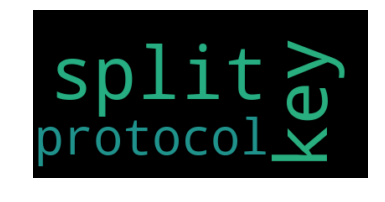

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(corpora['0chain'][10]) # We need to work on whole corpus and not sentences corpus
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
#wordcloud = WordCloud(width = 800, height = 800, 
#                background_color ='white', 
#                stopwords = stopwords, 
#                min_font_size = 10).generate(tokens) 
  
# plot the WordCloud image                        
#plt.figure(figsize = (8, 8), facecolor = None) 
#plt.imshow(wordcloud) 
#plt.axis("off") 
#plt.tight_layout(pad = 0)
#plt.show()

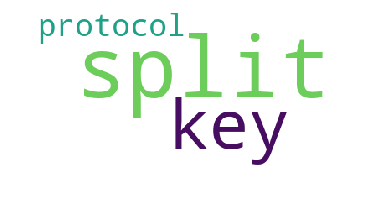

In [49]:
text_1 = corpora["0chain"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(text_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TFI-IDF

In [ ]:
def computeTF()

In [515]:
from sklearn.model_selection import train_test_split

In [516]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(corpora['0chain'])

In [517]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, corpora['0chain'], test_size=0.3, random_state=123)

In [518]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.0


In [10]:
makeSentences = False
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning: 0chain
Cleaning: 1World
Cleaning: 1x2Coin
Cleaning: AB-CHAIN
Cleaning: ABCC
Cleaning: ABLE
Cleaning: Absolute
Cleaning: ACE
Cleaning: Achain
Cleaning: AcreCoin
Cleaning: Actinium
Cleaning: AcuteAngle
Cleaning: Adamant
Cleaning: AdBank
Cleaning: AdChainRegistry
Cleaning: AdCoin
Cleaning: Adhive
Cleaning: Aditus
Cleaning: Adshares
Cleaning: Alluva
Cleaning: Ample!
Cleaning: ArkIO
Cleaning: BasicAttentionToken
Cleaning: Binance
Cleaning: bitcoin
Cleaning: BitcoinGold
Cleaning: BitStash
Cleaning: Budbo
Cleaning: Bytecoin
Cleaning: Cosmos
Cleaning: CryptoNote
Cleaning: DaiStableCoinSystem
Cleaning: dash
Cleaning: Decentraland
Cleaning: Digix
Cleaning: Enjin
Cleaning: EtherAce
Cleaning: ethereum
Cleaning: EthereumClassic
Cleaning: Giant
Cleaning: GiveCoin
Cleaning: Golem
Cleaning: GuaranteedEntranceToken
Cleaning: GXChain
Cleaning: ICON
Cleaning: IOTA
Cleaning: KwattCoin
Cleaning: Latoken
Cleaning: MoneroV
Cleaning: Neox
Cleaning: oxcert
Cleaning: RippleProtocol
Cleaning: SDUSD
Cle

In [14]:
corpora["1World"]

'legal disclaimer purpose white paper present world online wo token potential token holders connection proposed ico information set forth may exhaustive imply elements contractual relationship sole purpose provide relevant reasonable information potential token holders order determine whether undertake thorough analysis company intent acquiring wo tokens nothing white paper shall deemed constitute prospectus sort solicitation investment way pertain offering solicitation offer buy securities jurisdiction document composed accordance subject laws regulations jurisdiction designed protect investors product token digital currency security commodity kind financial instrument registered securities act securities laws state united states securities laws country including securities laws jurisdiction potential token holder resident wo token used purposes provided white paper including limited investment speculative financial purposes wo token confers rights form including limited ownership dis

In [75]:
list(corpora.keys())

['0chain',
 '1World',
 '1x2Coin',
 'AB-CHAIN',
 'ABCC',
 'ABLE',
 'Absolute',
 'ACE',
 'Achain',
 'AcreCoin',
 'Actinium',
 'AcuteAngle',
 'Adamant',
 'AdBank',
 'AdChainRegistry',
 'AdCoin',
 'Adhive',
 'Aditus',
 'Adshares',
 'Alluva',
 'Ample!',
 'ArkIO',
 'BasicAttentionToken',
 'Binance',
 'bitcoin',
 'BitcoinGold',
 'BitStash',
 'Budbo',
 'Bytecoin',
 'Cosmos',
 'CryptoNote',
 'DaiStableCoinSystem',
 'dash',
 'Decentraland',
 'Digix',
 'Enjin',
 'EtherAce',
 'ethereum',
 'EthereumClassic',
 'Giant',
 'GiveCoin',
 'Golem',
 'GuaranteedEntranceToken',
 'GXChain',
 'ICON',
 'IOTA',
 'KwattCoin',
 'Latoken',
 'MoneroV',
 'Neox',
 'oxcert',
 'RippleProtocol',
 'SDUSD',
 'SnipCoin',
 'Solve',
 'Steem',
 'StellarConcensusProtocol',
 'Tether',
 'Tezos',
 'Tron',
 'Vechain',
 'Zerocash']

In [84]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
for h, c in corpora.items():
    temp.append(Counter(tokenizer.tokenize(c)))

term_count = pd.DataFrame.from_dict(temp).transpose()
term_count.columns = [s for s in list(corpora.keys())]
#term_count.reset_index(inplace=True)
term_count['sum_words'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values(by=['sum_words'], ascending=False).head(20)

,0chain,1World,1x2Coin,AB-CHAIN,ABCC,ABLE,Absolute,ACE,Achain,AcreCoin,...,SnipCoin,Solve,Steem,StellarConcensusProtocol,Tether,Tezos,Tron,Vechain,Zerocash,sum_words
blockchain,35.0,49.0,6.0,14.0,28.0,21.0,1.0,21.0,79.0,4.0,...,1.0,7.0,36.0,0.0,21.0,14.0,22.0,149.0,1.0,1775.0
network,33.0,26.0,11.0,36.0,1.0,6.0,40.0,16.0,59.0,6.0,...,8.0,7.0,42.0,17.0,1.0,22.0,69.0,16.0,38.0,1367.0
transaction,25.0,11.0,4.0,1.0,0.0,3.0,2.0,6.0,9.0,3.0,...,0.0,0.0,20.0,9.0,2.0,20.0,42.0,4.0,191.0,1200.0
token,30.0,73.0,0.0,41.0,0.0,3.0,0.0,76.0,4.0,0.0,...,19.0,13.0,12.0,0.0,6.0,2.0,41.0,2.0,0.0,1185.0
tokens,31.0,103.0,0.0,33.0,0.0,3.0,0.0,169.0,1.0,0.0,...,28.0,9.0,11.0,0.0,7.0,3.0,24.0,10.0,0.0,1170.0
users,7.0,14.0,6.0,2.0,23.0,50.0,7.0,5.0,2.0,4.0,...,58.0,1.0,64.0,4.0,43.0,0.0,7.0,9.0,33.0,1113.0
data,35.0,22.0,0.0,3.0,5.0,13.0,0.0,5.0,27.0,0.0,...,11.0,4.0,3.0,0.0,2.0,5.0,22.0,119.0,20.0,1090.0
new,4.0,19.0,0.0,10.0,2.0,2.0,2.0,17.0,11.0,2.0,...,8.0,3.0,29.0,30.0,4.0,10.0,14.0,29.0,223.0,1023.0
protocol,49.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,11.0,2.0,...,0.0,1.0,2.0,96.0,4.0,64.0,24.0,5.0,22.0,940.0
platform,15.0,15.0,3.0,16.0,10.0,9.0,1.0,64.0,3.0,4.0,...,47.0,18.0,10.0,0.0,4.0,0.0,2.0,18.0,0.0,935.0


In [85]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [86]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [87]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [88]:
TFIDF.sort_values('sum_words', ascending=False).head(10)

KeyError: 'sum_words'

In [525]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
statistic.set_index(toPlot['0Chain'] + ' ' + toPlot['bitcoin'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

KeyError: '0Chain'

## Method Application